# <span style="color:blue"> Names and Student ID </span>

Student Name - Duarte Nunes <br>
Student id - 20240564 <br>
Contact e-mail - 20240564@novaims.unl.pt <br>


Student Name - Mariana Gomes <br>
Student id - 20211689 <br>
Contact e-mail - 20211689@novaims.unl.pt <br>


Student Name - Pedro Gaspar <br>
Student id - 20240112 <br>
Contact e-mail - 20240112@novaims.unl.pt <br>


Student Name - Rodrigo Nascimento <br>
Student id - 20240565 <br>
Contact e-mail - 20240565@novaims.unl.pt <br>

Student Name - Yasmine Boubezari <br>
Student id - 20230775 <br>
Contact e-mail - 20230775@novaims.unl.pt <br>

# 1. Import the dataset and explore the data

## 1.1. Importing libraries

In [6]:
import os
import pandas as pd
import numpy as np
from numpy import mean
import random
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from matplotlib import pyplot
import tkinter as tk
from tkinter import ttk, messagebox
import re

import sklearn
from scipy import stats
from scipy.stats import chi2_contingency
from collections import Counter
from statsmodels.tools.tools import add_constant
import time, datetime
import category_encoders as ce
from rapidfuzz import process, fuzz

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

## 1.2. Importing the datasets

In [7]:
data_train = pd.read_csv("train_data.csv", sep=",")
data_test = pd.read_csv("test_data.csv", sep=",")
pd.set_option("display.max_columns", None)

## 1.3. Information about the datasets

In [8]:
data_train

Accident Date  Age at Injury Alternative Dispute Resolution  \
0         2019-12-30           31.0                              N   
1         2019-08-30           46.0                              N   
2         2019-12-06           40.0                              N   
3                NaN            NaN                            NaN   
4         2019-12-30           61.0                              N   
...              ...            ...                            ...   
593466           NaN            NaN                            NaN   
593467    2022-12-13           72.0                              N   
593468           NaN            NaN                            NaN   
593469           NaN            NaN                            NaN   
593470           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
0         2020-01-01                       N                 0.00      1988.0   
1         2020-01-01                       Y              1745.93      1973.0   
2         2020-01-01                       N              1434.80      1979.0   
3         2020-01-01                     NaN                  NaN         NaN   
4         2020-01-01                       N                  NaN      1958.0   
...              ...                     ...                  ...         ...   
593466    2022-12-31                     NaN                  NaN         NaN   
593467    2022-12-31                       N                 0.00      1950.0   
593468    2022-12-31                     NaN                  NaN         NaN   
593469    2022-12-31                     NaN                  NaN         NaN   
593470    2022-12-31                     NaN                  NaN         NaN   

          C-2 Date    C-3 Date                   Carrier Name Carrier Type  \
0       2019-12-31         NaN     NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE   
1       2020-01-01  2020-01-14   ZURICH AMERICAN INSURANCE CO  1A. PRIVATE   
2       2020-01-01         NaN      INDEMNITY INSURANCE CO OF  1A. PRIVATE   
3              NaN         NaN                            NaN          NaN   
4       2019-12-31         NaN           STATE INSURANCE FUND      2A. SIF   
...            ...         ...                            ...          ...   
593466         NaN         NaN                            NaN          NaN   
593467  2022-12-31         NaN  TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE   
593468         NaN         NaN                            NaN          NaN   
593469         NaN         NaN                            NaN          NaN   
593470         NaN         NaN                            NaN          NaN   

        Claim Identifier Claim Injury Type County of Injury  \
0                5393875       2. NON-COMP     ST. LAWRENCE   
1                5393091      4. TEMPORARY          WYOMING   
2                5393889      4. TEMPORARY           ORANGE   
3              957648180               NaN              NaN   
4                5393887       2. NON-COMP         DUTCHESS   
...                  ...               ...              ...   
593466         327160035               NaN              NaN   
593467           6165075       2. NON-COMP         SULLIVAN   
593468         249875936               NaN              NaN   
593469         120584215               NaN              NaN   
593470         818961390               NaN              NaN   

       COVID-19 Indicator District Name First Hearing Date Gender  \
0                       N      SYRACUSE                NaN      M   
1                       N     ROCHESTER         2020-02-21      F   
2                       N        ALBANY                NaN      M   
3                     NaN           NaN                NaN    NaN   
4                       N        ALBANY                NaN      M   
...                   ...           ...                ...    ...   
593466          

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
data_train.shape

(593471, 33)

In [11]:
data_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [12]:
#Check for duplicates
duplicates = data_train.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [13]:
#Check if the index has duplicates
duplicate_indices = data_train.index[data_train.index.duplicated()]

#Display the duplicate indices
print(duplicate_indices)

Index([], dtype='int64')


In [14]:
#Check for duplicates in 'Claim Identifier '
duplicated_claims = data_train[data_train.duplicated(subset=['Claim Identifier'], keep=False)]
print(f"Number of duplicated Claim Identifier entries: {len(duplicated_claims)}")

#Display a sample of the duplicates
display(duplicated_claims.head())

Number of duplicated Claim Identifier entries: 2


Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
257901      NaN      NaN          NaN          NaN         292668076   
526445      NaN      NaN          NaN          NaN         292668076   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
257901               NaN              NaN                NaN           NaN   
526445               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
257901                NaN    NaN          NaN            NaN   
526445                NaN    NaN          NaN            NaN   

       Industry Code Description Medical Fee Region  \
257901                       NaN                NaN   
526445                       NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
257901                                 NaN                        NaN   
526445                                 NaN                        NaN   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
257901                              NaN                         NaN   
526445                              NaN                         NaN   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
257901                               NaN                     NaN   
526445                               NaN                     NaN   

       WCIO Part Of Body Description Zip Code  Agreement Reached WCB Decision  \
257901                           NaN      NaN                NaN          NaN   
526445                           NaN      NaN                NaN          NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN

It appears that the same claimer has two claims in two different dates with many NaN values. Since it is a duplication of no information, we will keep only one claim for now. 

In [15]:
#Handle duplicates
data_train = data_train.drop_duplicates(subset=['Claim Identifier'], keep='first')

#Verify if duplicates are resolved
print("Remaining duplicates in 'Claim Identifier':", data_train.duplicated(subset=['Claim Identifier']).sum())

Remaining duplicates in 'Claim Identifier': 0


In [16]:
data_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

To get more familiar with our variables, let's check the number and the unique values of each of our categorical and numerical columns:

In [17]:
categorical_columns = data_train.select_dtypes(include=['object']).columns

In [18]:
len(categorical_columns)

21

In [19]:
#Check for unique values in categorical columns
for col in categorical_columns:
    print(f"{col}: {data_train[col].unique()}")

Accident Date: ['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Alternative Dispute Resolution: ['N' nan 'Y' 'U']
Assembly Date: ['2020-01-01' '2020-01-02' '2020-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']
Attorney/Representative: ['N' 'Y' nan]
C-2 Date: ['2019-12-31' '2020-01-01' nan ... '2023-05-31' '2023-06-27' '2024-01-19']
C-3 Date: [nan '2020-01-14' '2020-03-04' ... '2023-08-19' '2023-05-06' '2023-02-04']
Carrier Name: ['NEW HAMPSHIRE INSURANCE CO' 'ZURICH AMERICAN INSURANCE CO'
 'INDEMNITY INSURANCE CO OF' ... 'MARATHON CENTRAL SCHOOL DIST'
 'CAMBRIDGE CENTRAL SCHOOL' 'HERMON-DEKALB CENTRAL']
Carrier Type: ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Claim Injury Type: ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']


In [20]:
numerical_columns = data_train.select_dtypes(include=['int64', 'float64']).columns

In [21]:
len(numerical_columns)

12

In [22]:
#Check for unique values in numerical columns
for col in numerical_columns:
    print(f"{col}: {data_train[col].unique()}")

Age at Injury: [ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Average Weekly Wage: [   0.   1745.93 1434.8  ...  371.02 2277.28 1008.86]
Birth Year: [1988. 1973. 1979.   nan 1958. 1952. 1971. 1986. 1964.    0. 1956. 1984.
 1965. 1987. 1985. 1981. 1983. 1980. 1975. 1963. 1990. 1968. 1959. 1970.
 1969. 2001. 1961. 1995. 1974. 1967. 1972. 1994. 1996. 1997. 1954. 1949.
 1978. 1957. 1950. 1998. 1992. 1977. 1999. 1955. 1942. 2000. 1989. 1960.
 1962. 1966. 1945. 1991. 1993. 1953. 1976. 1982. 195

The dataset contains 33 features, of which 12 are numerical and 21 are categorical, with a total of 593471 unique observations.

In [23]:
#Replace -9 with NaN in 'WCIO Part Of Body Code'
data_train['WCIO Part Of Body Code'] = data_train['WCIO Part Of Body Code'].replace(-9, np.nan)

#Confirm the replacement
print(data_train['WCIO Part Of Body Code'].unique())

[62. 38. 10. nan 36. 60. 14. 55. 53. 37. 42. 61. 54. 51. 52. 17. 34. 23.
 35. 18. 31. 25. 56. 32. 30. 90. 91. 20. 44. 39. 13. 50. 43. 33. 22. 41.
 11. 57. 19. 16. 66. 40. 99. 65. 46. 15. 58. 48. 49. 21. 63. 12. 45. 64.
 24. 47. 26.]


In [24]:
#Check the dtype of the column
print("Data type of 'WCIO Part Of Body Code':", data_train['WCIO Part Of Body Code'].dtype)

Data type of 'WCIO Part Of Body Code': float64


In [25]:
#Get unique carrier names
unique_names = data_train['Carrier Name'].dropna().unique()

#Create a mapping of similar names to canonical names
canonical_mapping = {}

for name in unique_names:
    #Handle the case where canonical_mapping.keys() is empty
    if not canonical_mapping:
        canonical_mapping[name] = name  #Treat the first name as canonical
        continue

    #Find the closest match in the current canonical_mapping
    result = process.extractOne(name, canonical_mapping.keys(), scorer=fuzz.ratio)

    if result:  #Ensure a match was found
        match, score = result[:2]  #Unpack match and score
        if score > 85:  #Threshold for similarity
            canonical_mapping[name] = canonical_mapping[match]
        else:
            canonical_mapping[name] = name  #Treat as canonical
    else:
        canonical_mapping[name] = name  #No match found, treat as canonical

#Apply the mapping

data_train['Carrier Name'] = data_train['Carrier Name'].map(canonical_mapping)

#Check value counts of the cleaned 'Carrier Name'
print(data_train['Carrier Name'].value_counts())

Carrier Name
STATE INSURANCE FUND             111144
POLICE, FIRE, SANITATION          21602
AMERICAN ZURICH INSURANCE CO      17540
CHARTER OAK FIRE INS CO           17176
INDEMNITY INS. OF N AMERICA       14366
                                  ...  
CORTLAND COUNTY SELF INS              1
LINCOLN GENERAL INSURANCE CO.         1
STILLWATER CSD                        1
COLTON-PIERREPONT CTL SCHOOL          1
L T V STEEL COMPANY,  INC.            1
Name: count, Length: 1504, dtype: int64


We here want to clean and normalize the names in the Carrier Name column of the data_train dataset. This code groups names that are similar (but slightly different) under a single "canonical" name to avoid inconsistencies in the data.

## 1.4. Descriptive Statistics

In [26]:
data_train.describe(include ='all').T

count unique  \
Accident Date                         570337   5539   
Age at Injury                       574026.0    NaN   
Alternative Dispute Resolution        574026      3   
Assembly Date                         593470   1096   
Attorney/Representative               574026      2   
Average Weekly Wage                 545375.0    NaN   
Birth Year                          544948.0    NaN   
C-2 Date                              559466   2475   
C-3 Date                              187245   1648   
Carrier Name                          574026   1504   
Carrier Type                          574026      8   
Claim Identifier                    593470.0    NaN   
Claim Injury Type                     574026      8   
County of Injury                      574026     63   
COVID-19 Indicator                    574026      2   
District Name                         574026      8   
First Hearing Date                    150798   1094   
Gender                                574026      4   
IME-4 Count                         132803.0    NaN   
Industry Code                       564068.0    NaN   
Industry Code Description             564068     20   
Medical Fee Region                    574026      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           558386.0    NaN   
WCIO Cause of Injury Description      558386     74   
WCIO Nature of Injury Code          558369.0    NaN   
WCIO Nature of Injury Description     558369     56   
WCIO Part Of Body Code              514933.0    NaN   
WCIO Part Of Body Description         556944     54   
Zip Code                              545389  10060   
Agreement Reached                   574026.0    NaN   
WCB Decision                          574026      1   
Number of Dependents                574026.0    NaN   

                                                                  top    freq  \
Accident Date                                              2020-03-01    1245   
Age at Injury                                                     NaN     NaN   
Alternative Dispute Resolution                                      N  571412   
Assembly Date                                              2020-03-06    1422   
Attorney/Representative                                             N  392291   
Average Weekly Wage                                               NaN     NaN   
Birth Year                                                        NaN     NaN   
C-2 Date                                                   2021-05-11    1847   
C-3 Date                                                   2021-04-21     350   
Carrier Name                                     STATE INSURANCE FUND  111144   
Carrier Type                                              1A. PRIVATE  285368   
Claim Identifier                                                  NaN     NaN   
Claim Injury Type                                         2. NON-COMP  291078   
County of Injury                                              SUFFOLK   60430   
COVID-19 Indicator                                                  N  546505   
District Name                                                     NYC  270779   
First Hearing Date                                         2022-04-15     440   
Gender                                                              M  335218   
IME-4 Count                                                       NaN     NaN   
Industry Code                                                     NaN     NaN   
Industry Code Description           HEALTH CARE AND SOCIAL ASSISTANCE  114339   
Medical Fee Region                                                 IV  265981   
OIICS Nature of Injury Description                                NaN     NaN   
WCIO Cause of Injury Code                                         NaN     NaN   
WCIO Cause of Injury Description                              LIFTING   46610   
WCIO Nature of Injury Code                                    

In [27]:
#Calculate the frequency of categories for each categorical column
for column in categorical_columns:
    print(f"Frequencies for {column}:")
    print(data_train[column].value_counts())
    print("\n")

Frequencies for Accident Date:
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2023-01-09       1
2017-06-20       1
2017-11-07       1
1993-09-30       1
2008-04-29       1
Name: count, Length: 5539, dtype: int64


Frequencies for Alternative Dispute Resolution:
Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64


Frequencies for Assembly Date:
Assembly Date
2020-03-06    1422
2021-05-11    1386
2022-04-01    1256
2022-02-04    1217
2022-08-15    1170
              ... 
2022-05-08      10
2021-12-19      10
2020-08-23      10
2020-07-04      10
2022-07-31      10
Name: count, Length: 1096, dtype: int64


Frequencies for Attorney/Representative:
Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64


Frequencies for C-2 Date:
C-2 Date
2021-05-11    1847
2020-03-05    1348
2021-05-27    1271
2022-08-15    1134
2021-06-22    1081
              ... 

The frequency of "Accident Date" shows that march 1st, 2020 had the highest number of accidents during the whole period. This might lead us to pertinent and interesting insights in the next steps.

In [28]:
numerical_columns = data_train.select_dtypes(include=['int64', 'float64']).columns

In [29]:
#Calculate the frequency of categories for each numerical column
for column in numerical_columns:
    print(f"Frequencies for {column}:")
    print(data_train[column].value_counts())
    print("\n")

Frequencies for Age at Injury:
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     13657
51.0     13486
         ...  
104.0        1
115.0        1
5.0          1
113.0        1
114.0        1
Name: count, Length: 108, dtype: int64


Frequencies for Average Weekly Wage:
Average Weekly Wage
0.00       335450
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1029.49         1
436.27          1
944.82          1
944.81          1
765.69          1
Name: count, Length: 120024, dtype: int64


Frequencies for Birth Year:
Birth Year
0.0       25081
1990.0    13180
1989.0    12867
1970.0    12527
1988.0    12463
          ...  
1907.0        1
1911.0        1
1921.0        1
2013.0        1
1909.0        1
Name: count, Length: 107, dtype: int64


Frequencies for Claim Identifier:
Claim Identifier
818961390    1
5393875      1
5393091      1
5393889      1
957648180    1
            ..
363651794    1
5393790      1
5393984      1
5393791 

In [30]:
data_train['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

50% of claimers are aged between 31 to 54, and the average age is 42. The lowest age appear to be 00 while the highest is 117, which may indicates incoherent values. 

In [31]:
#Check for inconsistencies in Age and Birth Year
if 'Age at Injury' in data_train.columns and 'Birth Year' in data_train.columns:
    invalid_age = data_train[(data_train['Age at Injury'] <= 0) & (data_train['Birth Year'] <= 0)]
    print(f"Records with invalid Age and Birth Year: {len(invalid_age)}")

    display(invalid_age.head())

    #Handle inconsistencies (replace with NaN)
    data_train.loc[(data_train['Age at Injury'] <= 0) & (data_train['Birth Year'] <= 0), 'Age at Injury'] = np.nan

    print("Invalid values in Age and Birth Year in the training set have been replaced with NaN!")

Records with invalid Age and Birth Year: 1926


Accident Date  Age at Injury Alternative Dispute Resolution  \
262     2019-06-26            0.0                              N   
358     2019-12-28            0.0                              N   
433     2019-12-20            0.0                              N   
486            NaN            0.0                              N   
1372    2019-12-20            0.0                              N   

     Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
262     2020-01-02                       N                  0.0         0.0   
358     2020-01-02                       N                  0.0         0.0   
433     2020-01-02                       N                  0.0         0.0   
486     2020-01-02                       Y                  0.0         0.0   
1372    2020-01-03                       N                  0.0         0.0   

        C-2 Date    C-3 Date                    Carrier Name     Carrier Type  \
262          NaN         NaN    AMERICAN ZURICH INSURANCE CO      1A. PRIVATE   
358   2019-12-30         NaN          TWIN CITY FIRE INS CO.      1A. PRIVATE   
433   2019-12-30         NaN  CARMEL CENTRAL SCHOOL DISTRICT  3A. SELF PUBLIC   
486   2021-03-26  2019-12-23    CNY OTHER THAN ED, HED WATER  3A. SELF PUBLIC   
1372  2019-12-30         NaN           BOCES DUTCHESS COUNTY  3A. SELF PUBLIC   

      Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator  \
262            5393971       2. NON-COMP           NASSAU                  N   
358            5394093       2. NON-COMP         NEW YORK                  N   
433            5393876       2. NON-COMP           PUTNAM                  N   
486            5394023       2. NON-COMP         NEW YORK                  N   
1372           5394724       2. NON-COMP         DUTCHESS                  N   

     District Name First Hearing Date Gender  IME-4 Count  Industry Code  \
262            NYC                NaN      M          NaN           62.0   
358            NYC                NaN      M          NaN           71.0   
433         ALBANY                NaN      F          NaN            NaN   
486            NYC         2020-10-26      M          NaN           92.0   
1372        ALBANY                NaN      F          NaN            NaN   

                Industry Code Description Medical Fee Region  \
262     HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
358   ARTS, ENTERTAINMENT, AND RECREATION                 IV   
433                                   NaN                III   
486                 PUBLIC ADMINISTRATION                 UK   
1372                                  NaN                 II   

      OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
262                                  NaN                        NaN   
358                                  NaN                       55.0   
433                                  NaN                       74.0   
486                                  NaN                       90.0   
1372                                 NaN                       74.0   

            WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
262                                      NaN                         NaN   
358                      HOLDING OR CARRYING                        52.0   
433   FELLOW WORKER, PATIENT OR OTHER PERSON                        40.0   
486      OTHER THAN PHYSICAL CAUSE OF INJURY                        31.0   
1372  FELLOW WORKER, PATIENT OR OTHER PERSON                        52.0   

     WCIO Nature of Injury Description  WCIO Part Of Body Code  \
262                                NaN                     NaN   
358                     STRAIN OR TEAR                    61.0   
433                         LACERATION                    35.0   
486         HEARING LOSS OR IMPAIRMENT                    13.0   
1372                    STRAIN OR TEAR                    53.0   

     WCIO Part Of Body Descrip

Invalid values in Age and Birth Year in the training set have been replaced with NaN!


In [32]:
#Check for inconsistencies in Age and Birth Year in the test set
if 'Age at Injury' in data_test.columns and 'Birth Year' in data_test.columns:
    invalid_age_test = data_test[(data_test['Age at Injury'] <= 0) & (data_test['Birth Year'] <= 0)]
    print(f"Records with invalid Age or Birth Year: {len(invalid_age)}")

    display(invalid_age_test.head())

    #Handle inconsistencies (replace with NaN)
    data_test.loc[(data_test['Age at Injury'] <= 0) & (data_test['Birth Year'] <= 0), 'Age at Injury'] = np.nan

    print("Invalid values in Age and Birth Year in the test set have been replaced with NaN!")

Records with invalid Age or Birth Year: 1926


Accident Date  Age at Injury Alternative Dispute Resolution  \
1056           NaN              0                              N   
3179    2022-12-15              0                              N   
3316    2022-11-16              0                              N   
3409    2022-12-27              0                              N   
3795           NaN              0                              N   

     Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
1056    2023-01-03                       Y                  0.0         0.0   
3179    2023-01-06                       Y                  0.0         0.0   
3316    2023-01-06                       N                800.0         0.0   
3409    2023-01-06                       N                  0.0         0.0   
3795    2023-01-06                       Y                  0.0         0.0   

        C-2 Date    C-3 Date                  Carrier Name     Carrier Type  \
1056  2023-01-10  2022-12-28         NYC TRANSIT AUTHORITY  3A. SELF PUBLIC   
3179  2023-05-02  2023-01-02  *** CARRIER UNDETERMINED ***          UNKNOWN   
3316  2023-01-06         NaN   STARSTONE NATIONAL INS. CO.      1A. PRIVATE   
3409  2023-01-06  2023-01-18  ZURICH AMERICAN INSURANCE CO      1A. PRIVATE   
3795         NaN  2023-01-04                BRENTWOOD UFSD  3A. SELF PUBLIC   

      Claim Identifier County of Injury COVID-19 Indicator District Name  \
1056           6165708          SUFFOLK                  N     HAUPPAUGE   
3179           6168264            KINGS                  N     STATEWIDE   
3316           6168395           QUEENS                  N           NYC   
3409           6168837         CHENANGO                  N    BINGHAMTON   
3795           6168985          SUFFOLK                  N     HAUPPAUGE   

     First Hearing Date Gender  IME-4 Count  Industry Code  \
1056                NaN      M          NaN           48.0   
3179         2023-07-20      F          NaN            NaN   
3316                NaN      M          NaN           49.0   
3409                NaN      U          NaN           56.0   
3795                NaN      M          NaN            NaN   

                              Industry Code Description Medical Fee Region  \
1056                     TRANSPORTATION AND WAREHOUSING                 UK   
3179                                                NaN                 IV   
3316                     TRANSPORTATION AND WAREHOUSING                 IV   
3409  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                  I   
3795                                                NaN                 IV   

      OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
1056                                 NaN                       99.0   
3179                                 NaN                        NaN   
3316                                 NaN                       75.0   
3409                                 NaN                       56.0   
3795                                 NaN                        NaN   

     WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
1056       OTHER - MISCELLANEOUS, NOC                        31.0   
3179                              NaN                         NaN   
3316         FALLING OR FLYING OBJECT                        10.0   
3409                          LIFTING                        52.0   
3795                              NaN                         NaN   

     WCIO Nature of Injury Description  WCIO Part Of Body Code  \
1056        HEARING LOSS OR IMPAIRMENT                    13.0   
3179                               NaN                    35.0   
3316                         CONTUSION                     NaN   
3409                    STRAIN OR TEAR                     NaN   
3795                               NaN                     NaN   

     WCIO Part Of Body Description Zip Code  Number of Dependents  
1056                        EAR(S)    22

Invalid values in Age and Birth Year in the test set have been replaced with NaN!


We can observe that there are claims that have a "Birth Year" and "Age at Injury" of zero, meaning that these values are missing and given that are NaN values. However, if we change both columns two NaN values in these specific observation once we get to missing values imputation "Age at Injury" can be imputed with 20 and then "Birth Year" imputed with 1990. Given this we only substituted "Age at Injury" NaN values that will be later imputed.

In [33]:
data_train['Accident Date'].describe()

count         570337
unique          5539
top       2020-03-01
freq            1245
Name: Accident Date, dtype: object

In [34]:
#Filter to find where "accident date" is "01-03-2020"
filtered_data_train = data_train[data_train['Accident Date'] == '2020-03-01']

print(filtered_data_train.head())

      Accident Date  Age at Injury Alternative Dispute Resolution  \
582      2020-03-01           62.0                              N   
36754    2020-03-01           33.0                              N   
36770    2020-03-01           18.0                              N   
36832    2020-03-01           34.0                              N   
36853    2020-03-01           43.0                              N   

      Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
582      2020-01-02                       Y              1467.47      1957.0   
36754    2020-03-02                       N                 0.00      1987.0   
36770    2020-03-02                       N                 0.00      2001.0   
36832    2020-03-02                       N                 0.00         0.0   
36853    2020-03-02                       N                 0.00      1976.0   

         C-2 Date    C-3 Date               Carrier Name      Carrier Type  \
582    2020-01-17  2019-12

In [35]:
#Filter data where "Accident Date" is "01-03-2020" and compare it with the "COVID-19 Indicator" values  
Y_count = data_train[(data_train['Accident Date'] == '2020-03-01') & (data_train['COVID-19 Indicator'] == 'Y')].shape[0]
N_count = data_train[(data_train['Accident Date'] == '2020-03-01') & (data_train['COVID-19 Indicator'] == 'N')].shape[0]

#Calculate the percentages
total_count = Y_count + N_count
Y_percentage = (Y_count / total_count) * 100 if total_count != 0 else 0
N_percentage = (N_count / total_count) * 100 if total_count != 0 else 0

#Show result
print(f"The date '2020-03-01' appears {Y_count} times ({Y_percentage:.2f}%) when the covid indicator is positive, and {N_count} times ({N_percentage:.2f}%) when the covid indicator is negative.")

The date '2020-03-01' appears 912 times (73.25%) when the covid indicator is positive, and 333 times (26.75%) when the covid indicator is negative.


Since the 1st of march 2020 is the highest frequent date regading claims, we supposed it was due to covid. To confirm this hypothesis, we calculated the percentage of positive covid tests on that day and turned out that 73.25% of claimers on that day were having Covid. 

In [36]:
data_train['Medical Fee Region'].describe()

count     574026
unique         5
top           IV
freq      265981
Name: Medical Fee Region, dtype: object

In [37]:
data_train['Medical Fee Region'].unique()

array(['I', 'II', nan, 'IV', 'UK', 'III'], dtype=object)

In [38]:
data_train['Gender'].describe()

count     574026
unique         4
top            M
freq      335218
Name: Gender, dtype: object

In [39]:
data_train['Gender'].unique()

array(['M', 'F', nan, 'U', 'X'], dtype=object)

We notice the presence of nan values in 'Medical Fee Region' and 'Gender'

In [40]:
#Calculate percentiles 10%, 50%, 75%, and 90% for numerical variables
numerical_columns = data_train.select_dtypes(include=['int64', 'float64']).columns

#Loop over numerical columns
for column in numerical_columns:
    print(f"Percentiles for {column}:")
    print(data_train[column].describe(percentiles=[.1, .25, .5, .75, .9]))  # Percentiles 10%, 25%, 50%, 75%, 90%
    print("\n")

Percentiles for Age at Injury:
count    572100.000000
mean         42.256050
std          14.069081
min           0.000000
10%          24.000000
25%          31.000000
50%          42.000000
75%          54.000000
90%          61.000000
max         117.000000
Name: Age at Injury, dtype: float64


Percentiles for Average Weekly Wage:
count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
90%      1.550080e+03
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64


Percentiles for Birth Year:
count    544948.000000
mean       1886.767604
std         414.644423
min           0.000000
10%        1957.000000
25%        1965.000000
50%        1977.000000
75%        1989.000000
90%        1996.000000
max        2018.000000
Name: Birth Year, dtype: float64


Percentiles for Claim Identifier:
count    5.934700e+05
mean     2.366715e+07
std      1.079267e+08
min    

The first point that we notice is the uninterpretability of percentiles on numerical values representing codes like "Industry Code" for example, which requires to be considered as an object and not a number.

## 1.5. Exploring data visually

After a first exploration using statistics and other basic methods that allowed us to have a global view of our data, let's dive now deeper with plots in order to visualize this data in a clearer and an easily interpretable way:

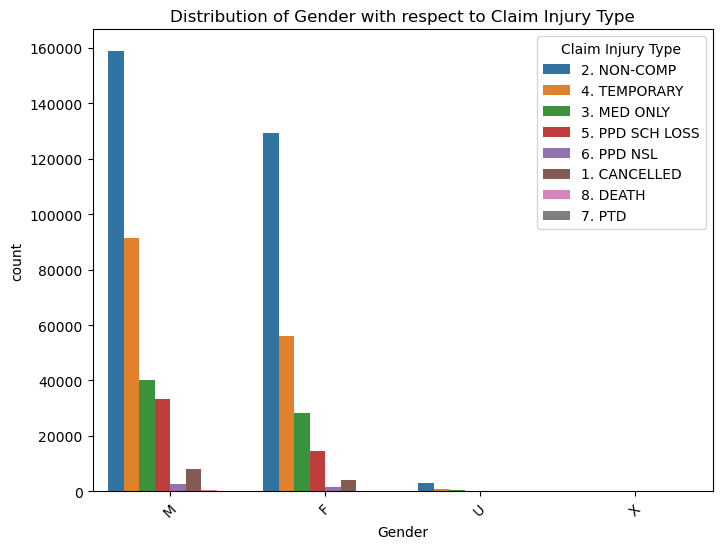

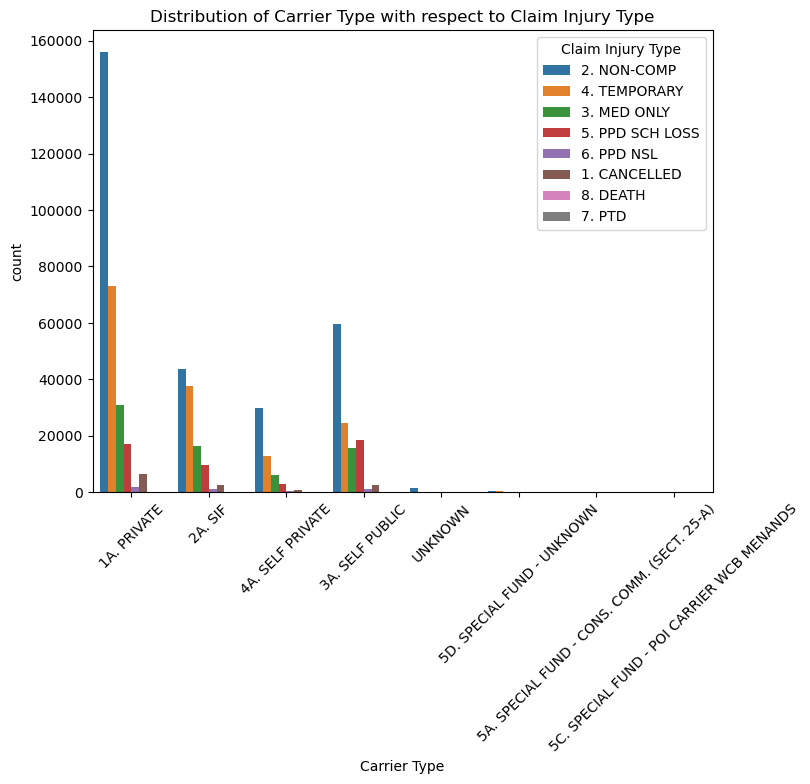

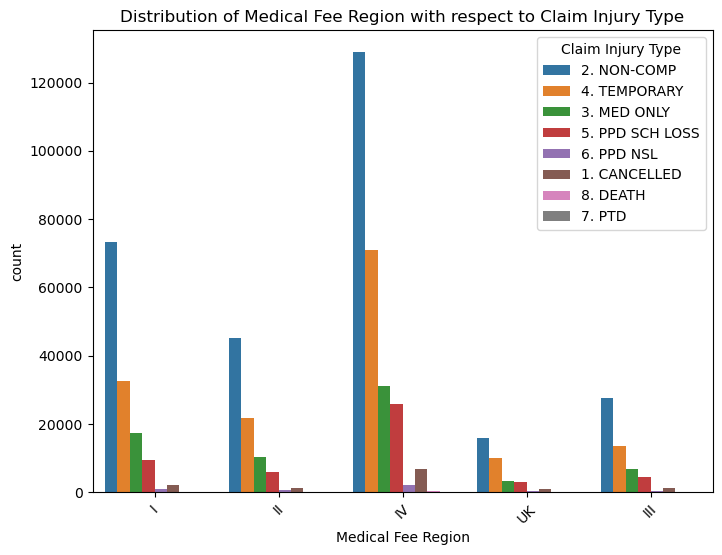

In [41]:
#Categorical variables
categorical_columns = ['Gender', 'Carrier Type', 'Medical Fee Region']  # Example categorical variables

#Bivariate analysis - Bar plots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_train, x=column, hue='Claim Injury Type')  # Bar plot with hue by the target variable
    plt.title(f'Distribution of {column} with respect to Claim Injury Type')
    plt.xticks(rotation=45)
    plt.show()

NON-COMP seems to be the highest claim injury type for all genders, all carrier types and all medical fees regions.

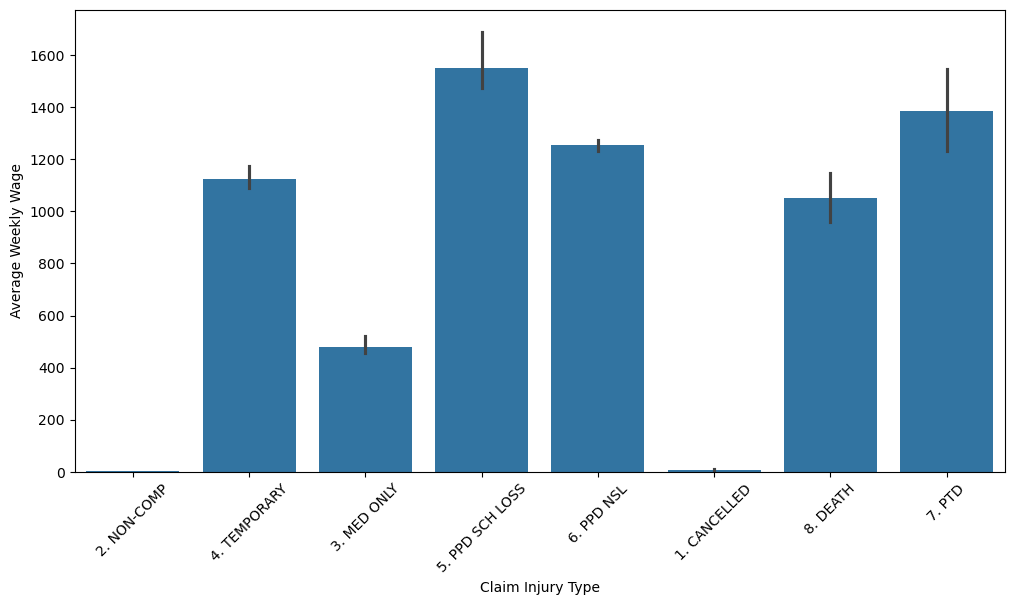

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Claim Injury Type", y="Average Weekly Wage", data=data_train)
plt.xticks(rotation=45)
plt.show() #To understand the average of another numerical variable, like wage, for each type of injury

The most frequent claim injury type per week is the 5th PDD NSL, while the lowest ones are NON-COMP and CANCELLED. This might suggest that the first one takes longer procedure while the two others are considered as solved in the early claim process steps.

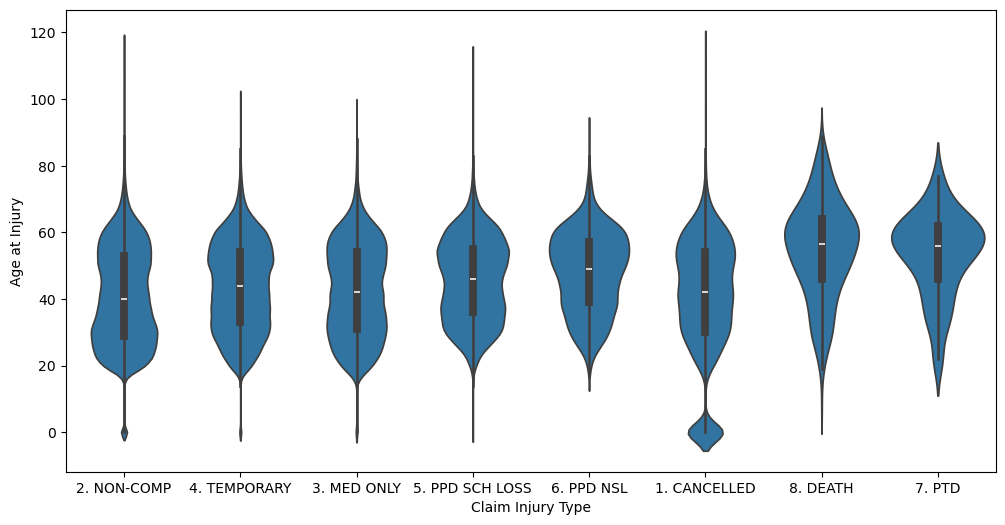

In [43]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Claim Injury Type", y="Age at Injury", data=data_train)
plt.show()

This plot shows the distribution of age on the claim injury type and where we notice some claim injury types with higher number of outliers, like NON-COMP, MED ONLY and CANCELLED.

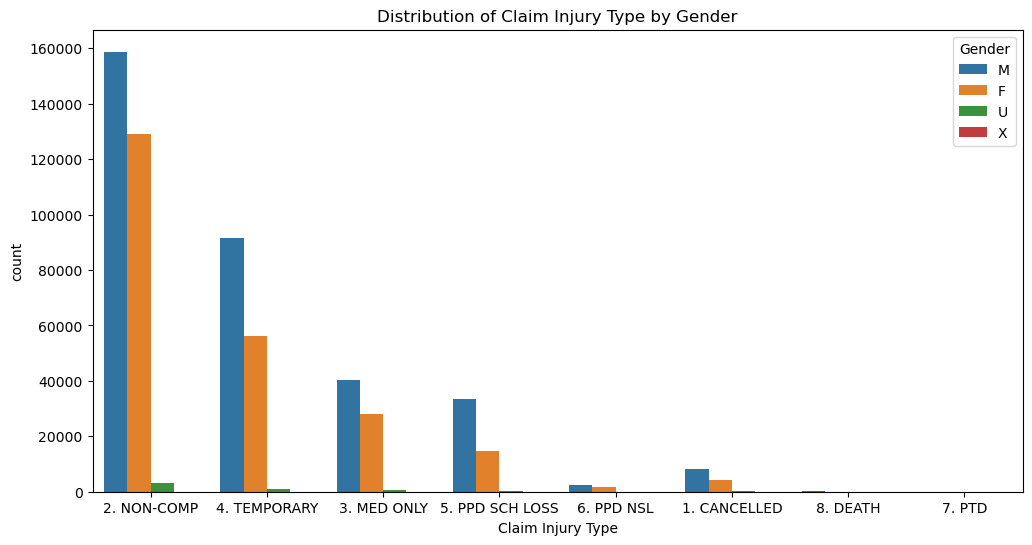

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Claim Injury Type", hue="Gender", data=data_train)
plt.title("Distribution of Claim Injury Type by Gender")
plt.legend(title="Gender", loc="upper right")
plt.show()

Men are more concerned by the Claim Injuries than other genders in all the different claim injury types.

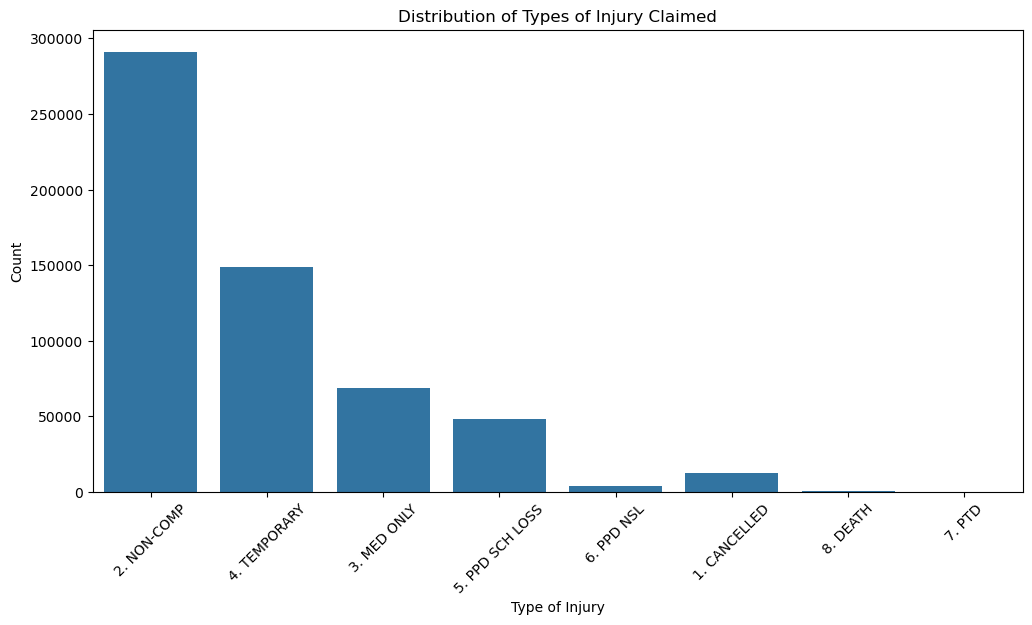

In [45]:
#Countplot chart to visualize the distribution of "Claim Injury Type"
plt.figure(figsize=(12, 6))
sns.countplot(x="Claim Injury Type", data=data_train)
plt.title("Distribution of Types of Injury Claimed")
plt.xlabel("Type of Injury")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

To visualize the frequency of the types of claim injury type, we used this bar charts plot which shows that the more frequents types are NON-COMP and TEMPORARY, while the less frequents are PTD, DEATH and PDD NSL.

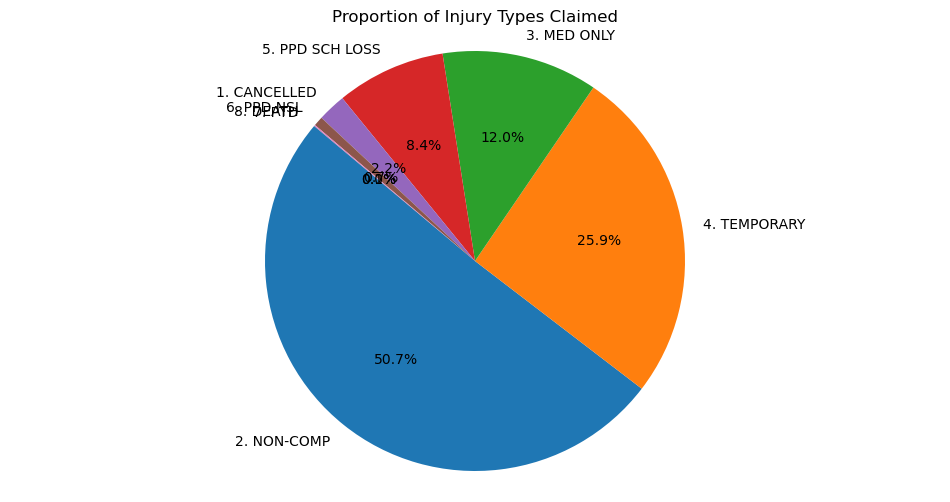

In [46]:
#Calculating the frequency of each category
claim_counts = data_train["Claim Injury Type"].value_counts()

#Pie Chart
plt.figure(figsize=(12, 6))
plt.pie(claim_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Injury Types Claimed")
plt.axis('equal')  #To ensure the pie chart is circular
plt.show()

Visualizatin of the same distribution but in pie chart and with percentages. We notice that the most frequent claim injury type represents slightly more than the half of all types.

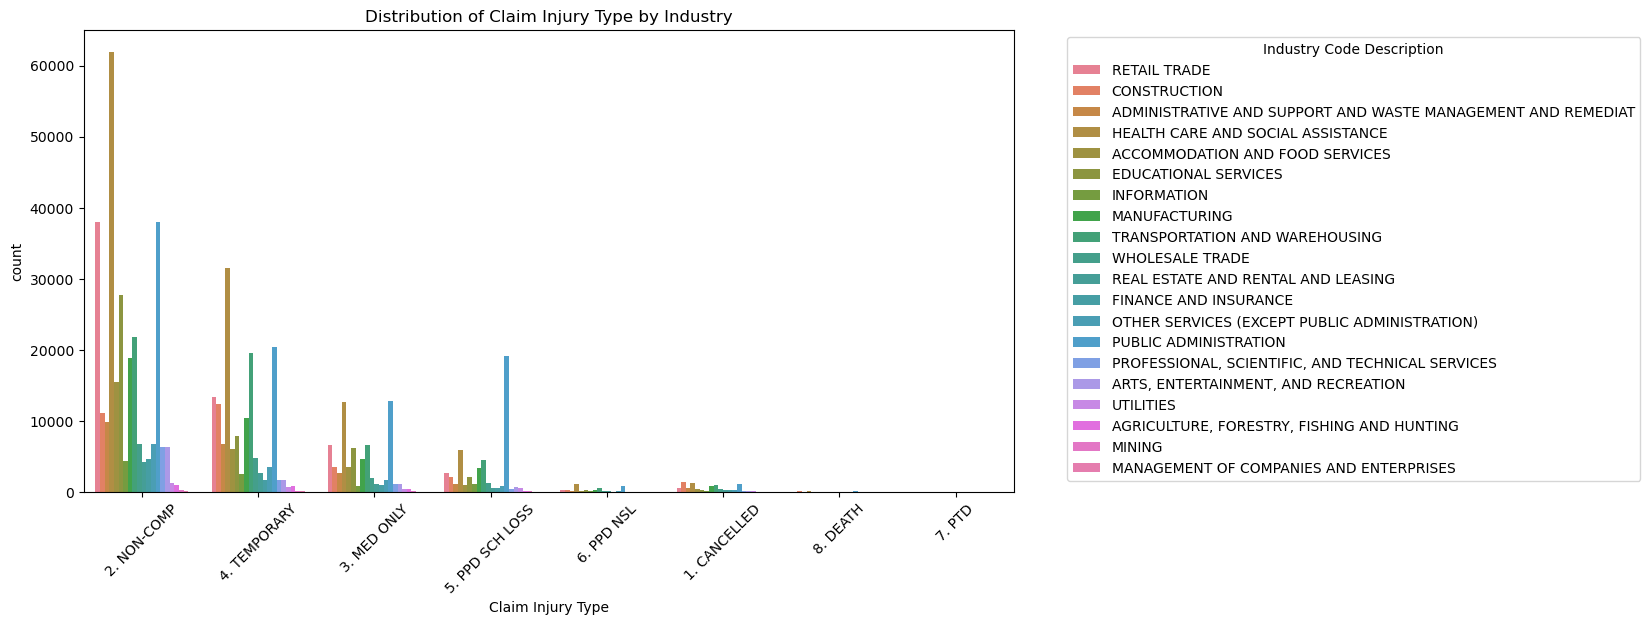

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Claim Injury Type", hue="Industry Code Description", data=data_train)
plt.xticks(rotation=45)
plt.title("Distribution of Claim Injury Type by Industry")
plt.legend(title="Industry Code Description", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

We notice that HEALTH CARE AND SOCIAL ASSISTANCE and PUBLIC ADMINISTRATION are most present industries in the claims.

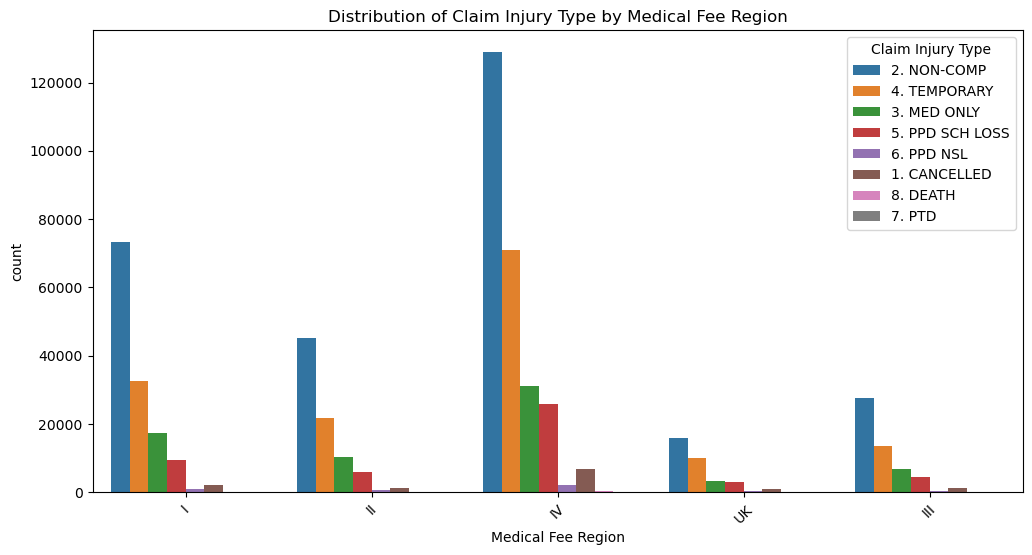

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Medical Fee Region", hue="Claim Injury Type", data=data_train)
plt.xticks(rotation=45)
plt.title("Distribution of Claim Injury Type by Medical Fee Region")
plt.show()

Region IV seems to have highest medical fees, in the opposite of UK.

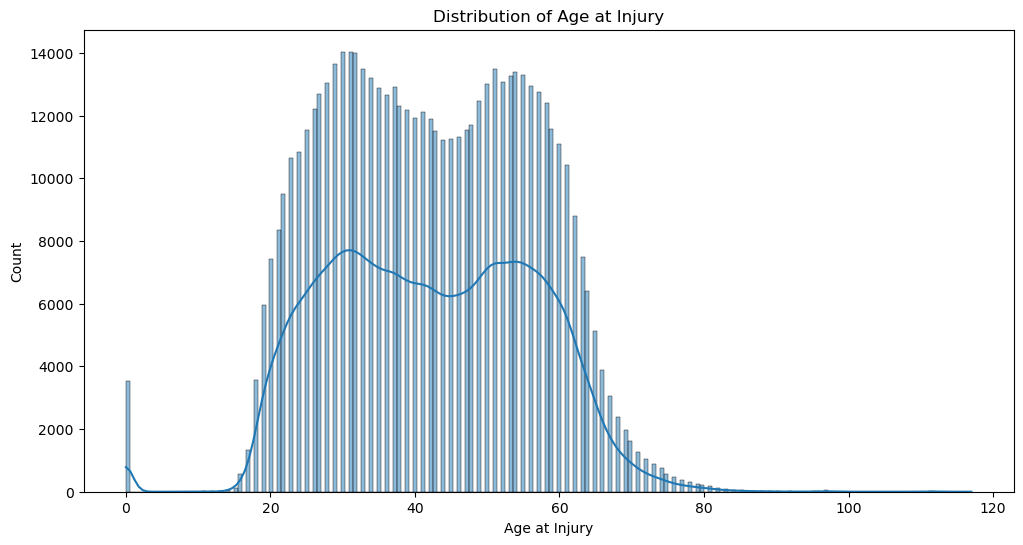

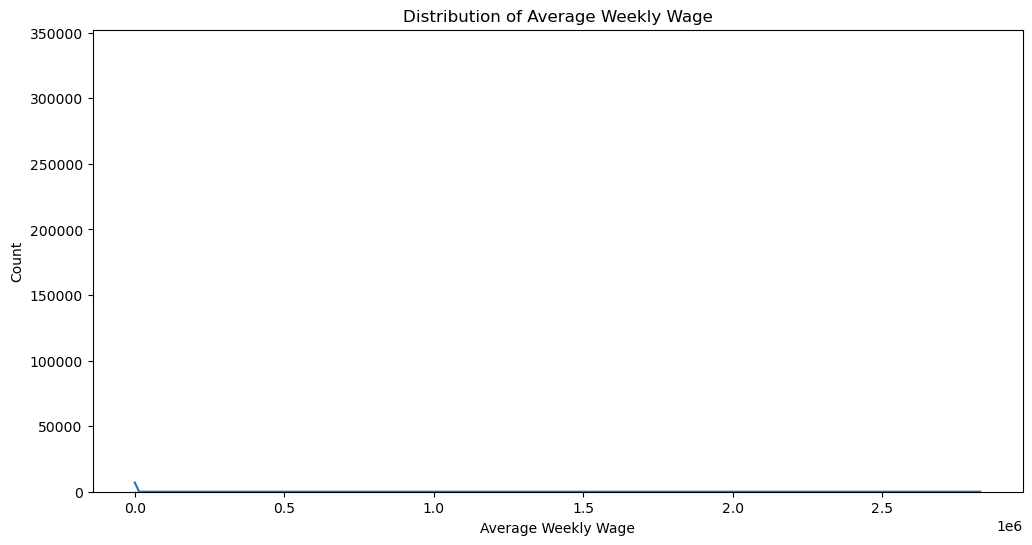

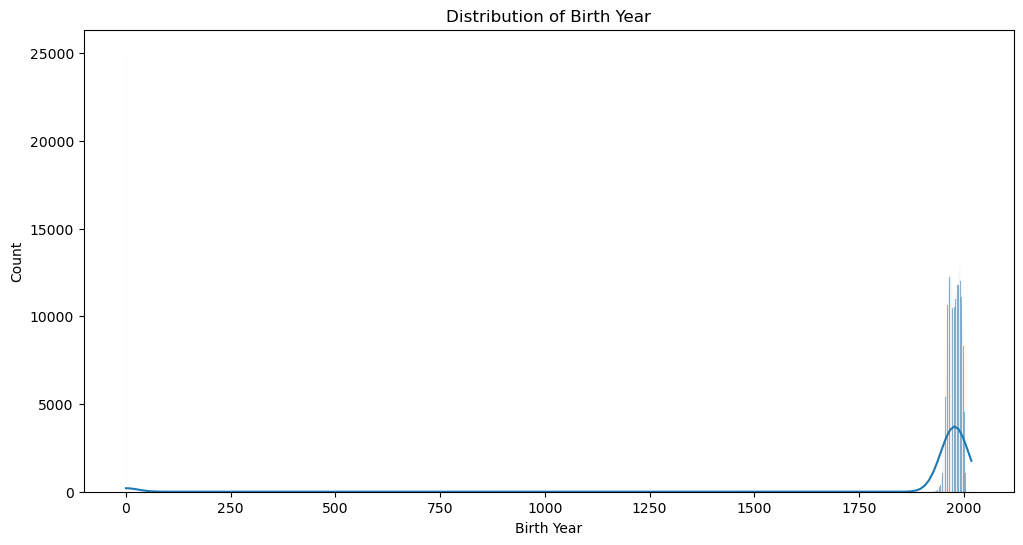

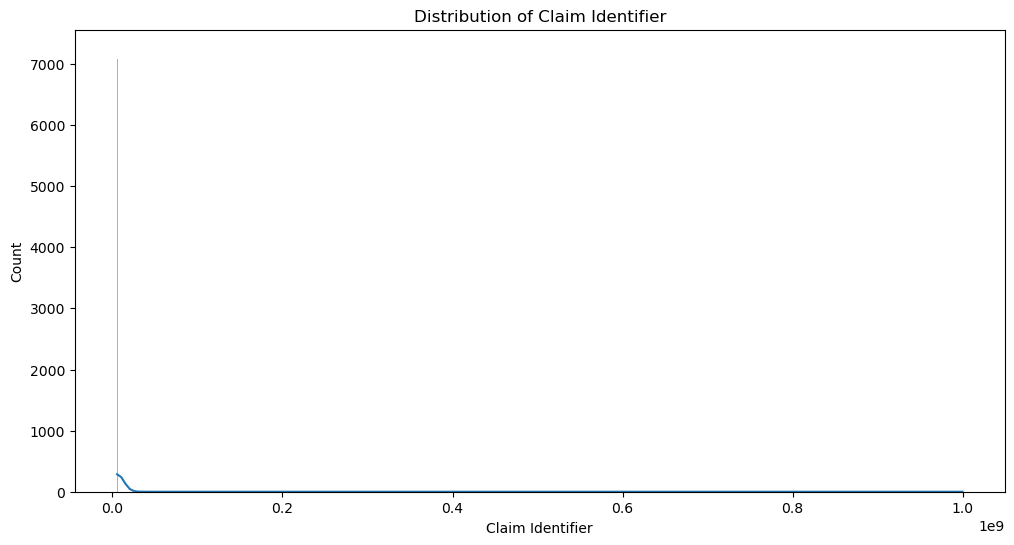

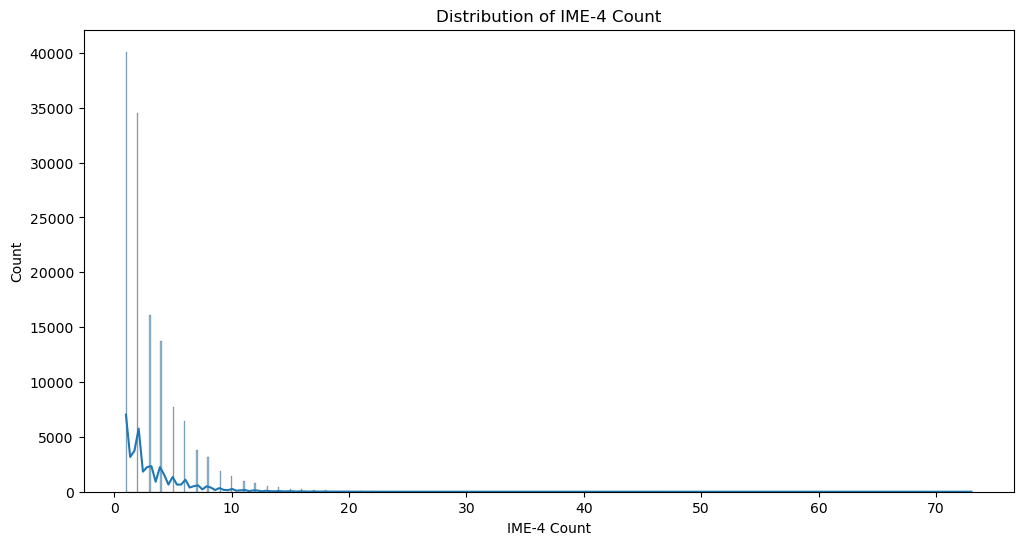

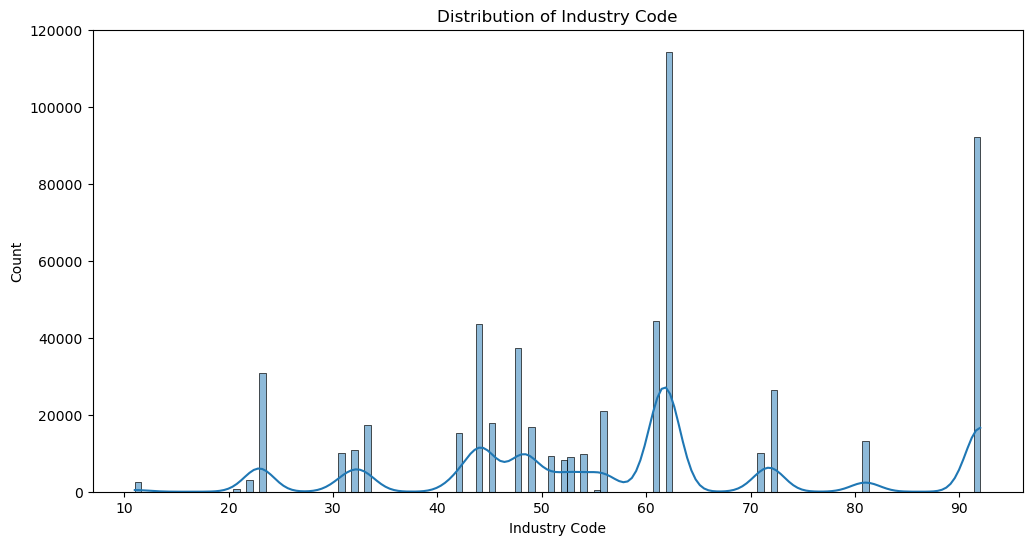

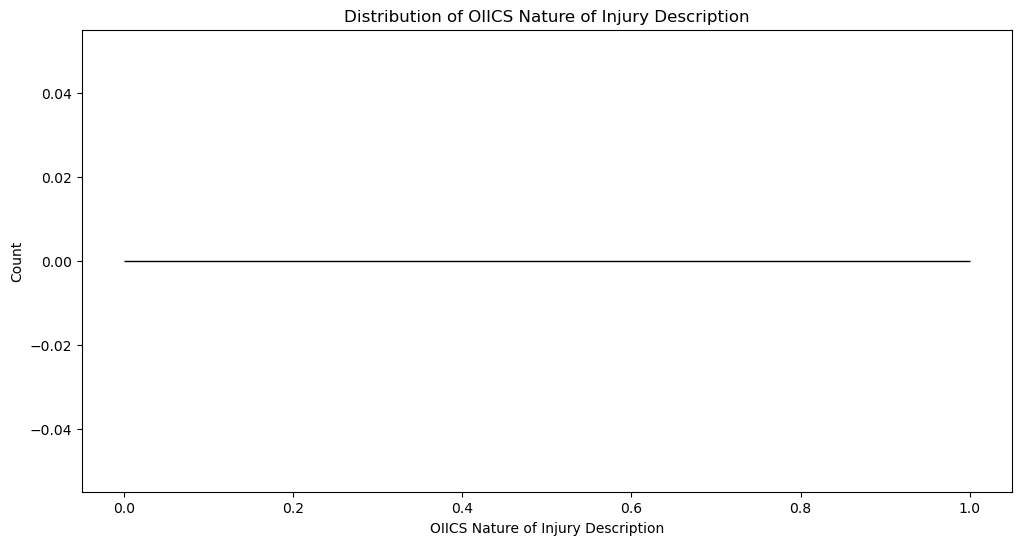

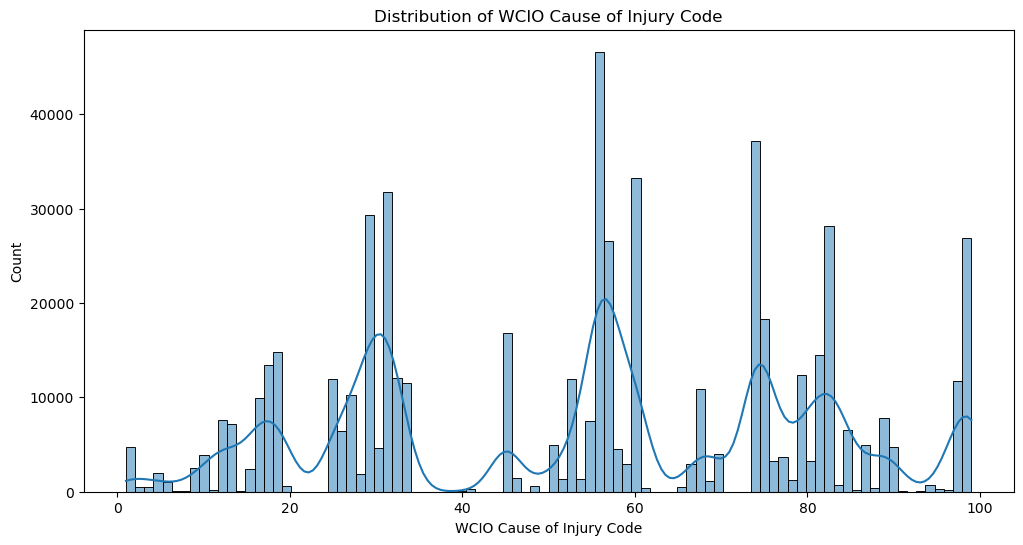

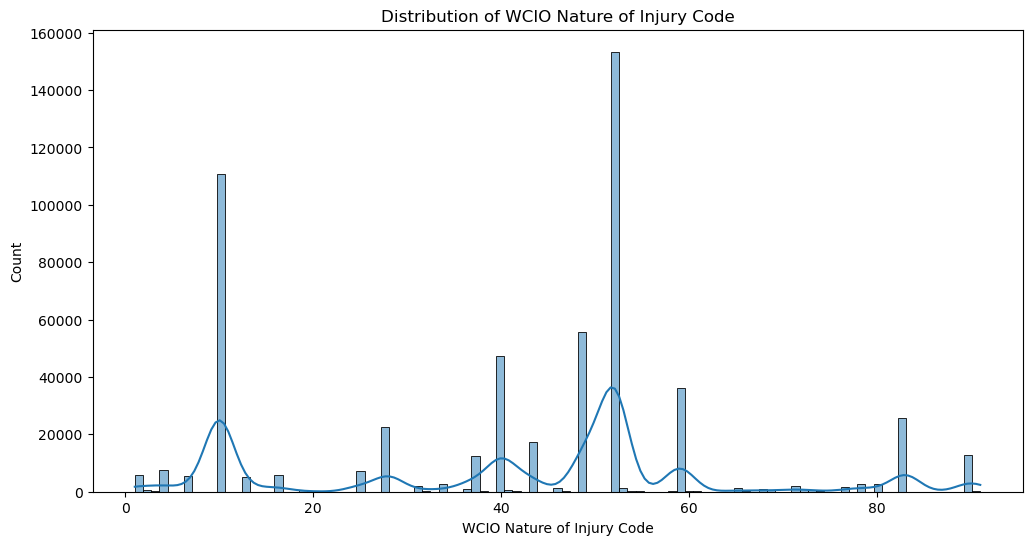

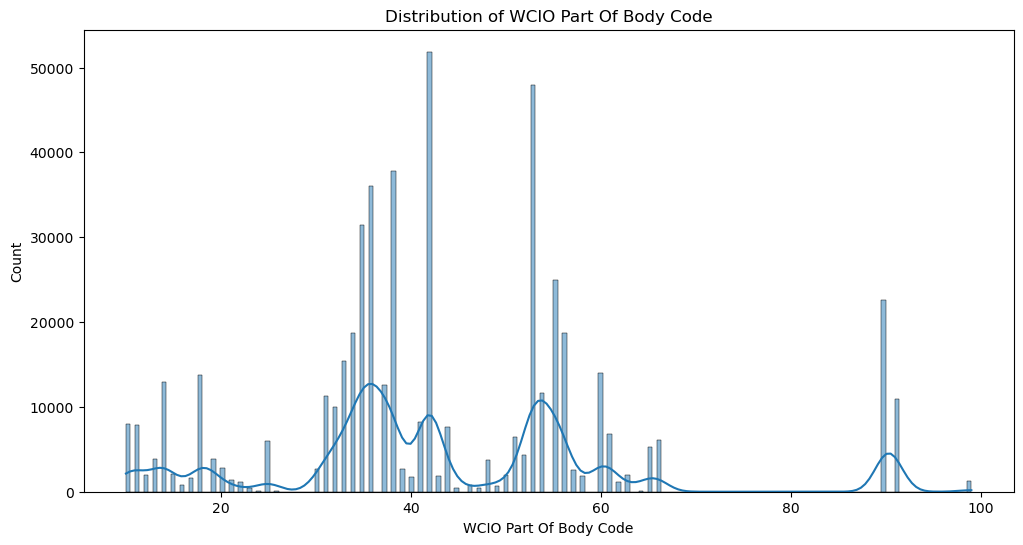

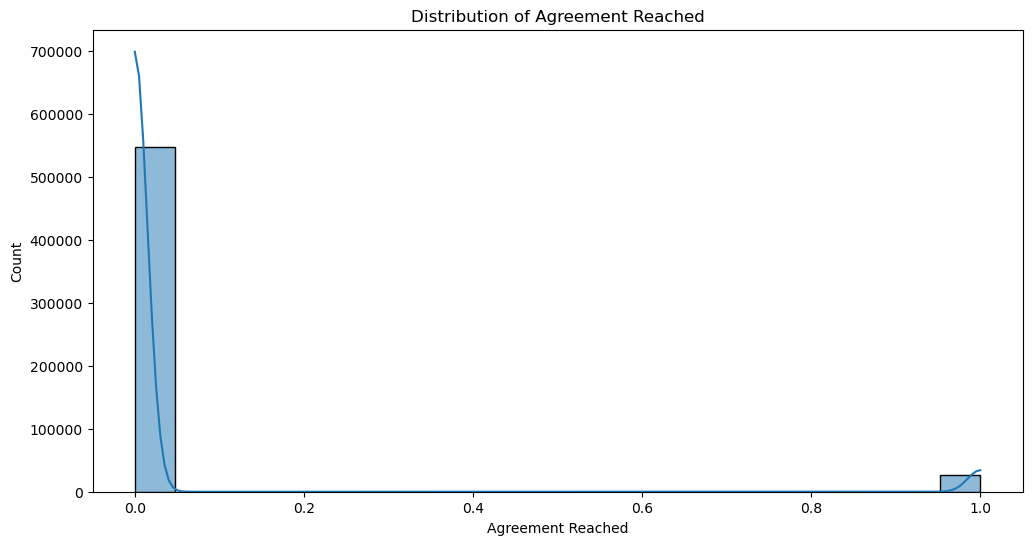

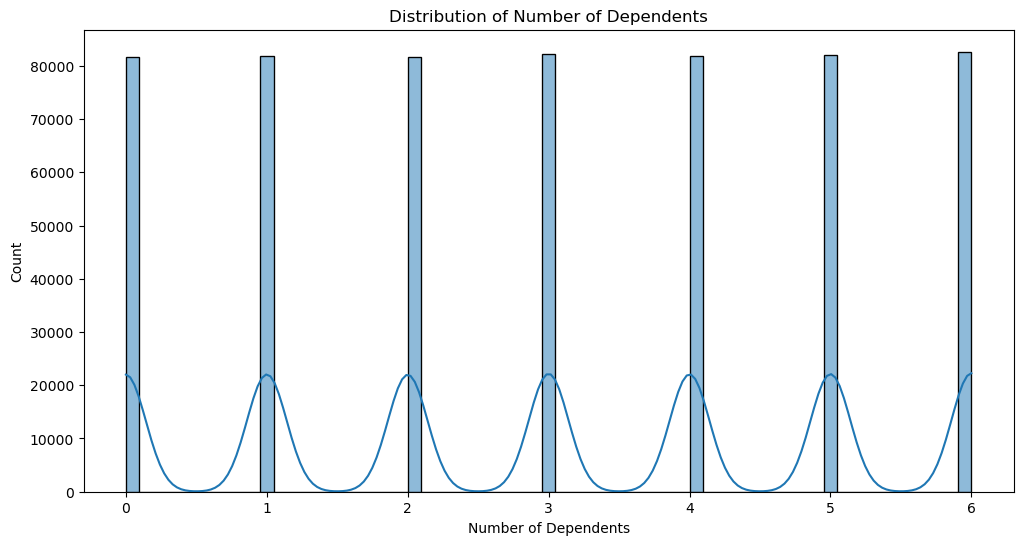

In [49]:
#Distribution of numerical variables
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data_train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

On these graphs we notice again the outliers in the two variables relates to age, and that many of our numerical variables do not make sense in integer/float form.

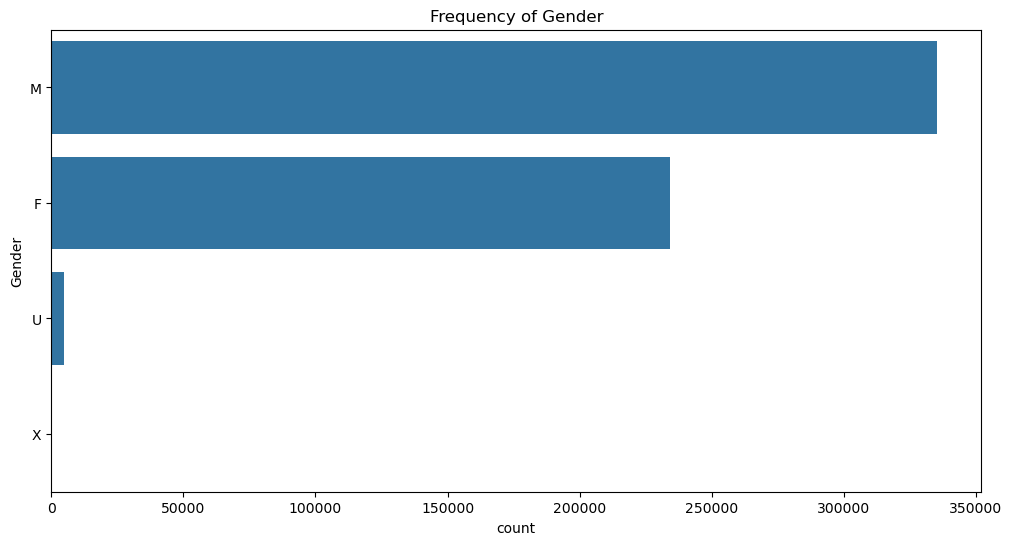

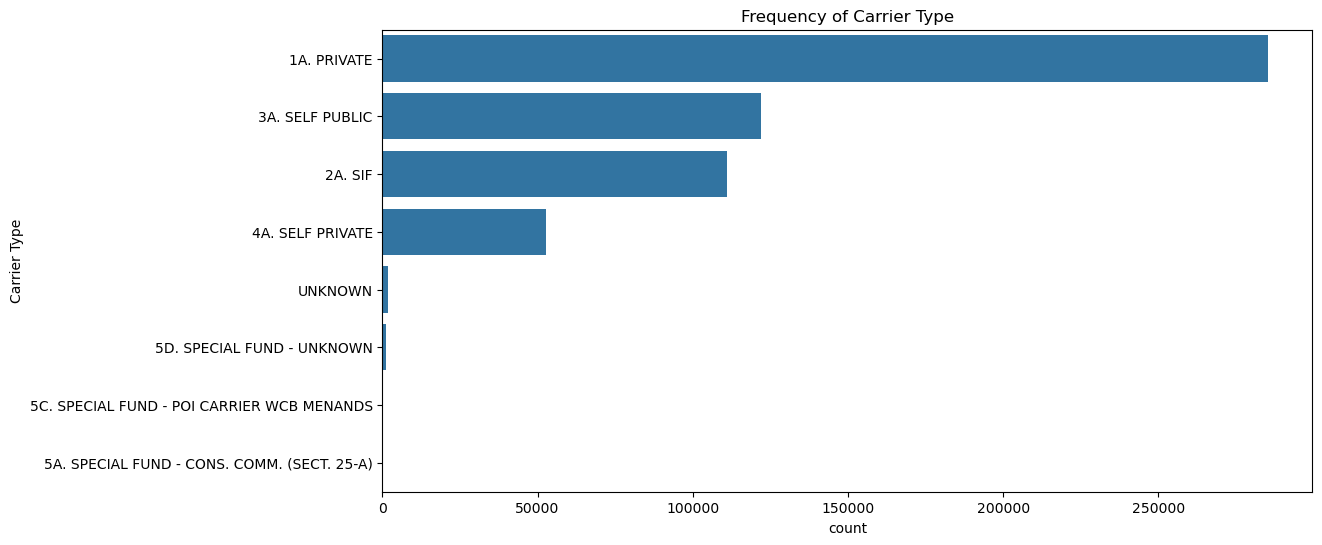

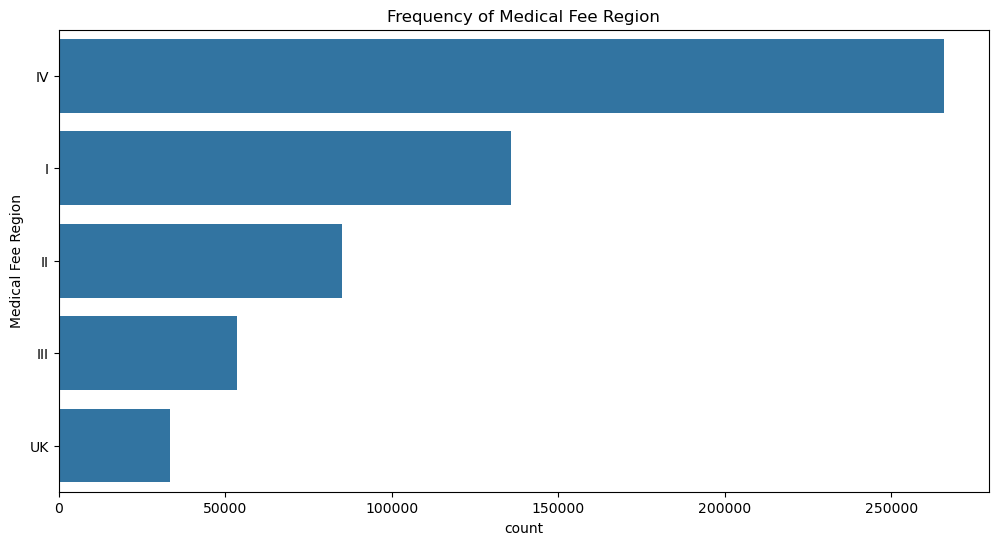

In [50]:
#Bar chart for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=data_train, order=data_train[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.show()

On the first plot regarding Gender, we notice the high presence of M and F compared to U and X, and where males are the most claimers. Regarding carrier type frequency, The PRIVATE sector seems to bring the highest number of claims, followed by SELF PUBLIC and SIF. 

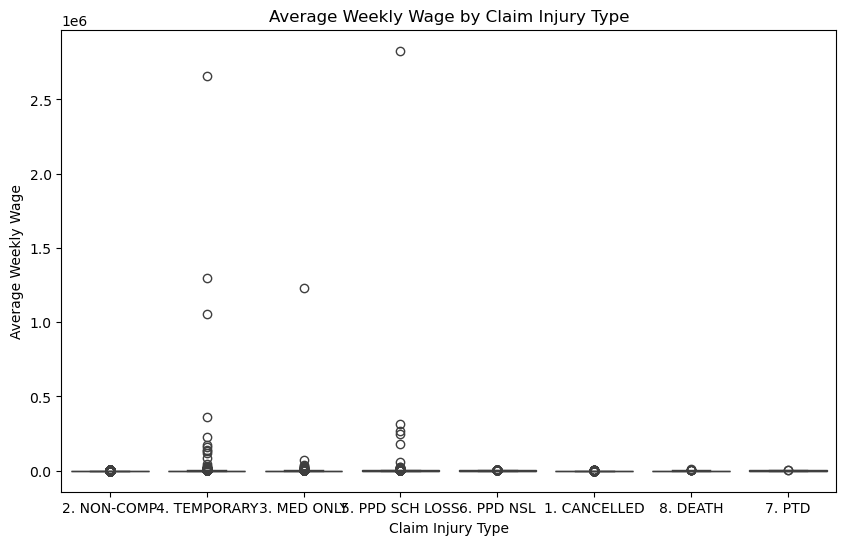

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Claim Injury Type", y="Average Weekly Wage", data=data_train)
plt.title("Average Weekly Wage by Claim Injury Type")
plt.show()

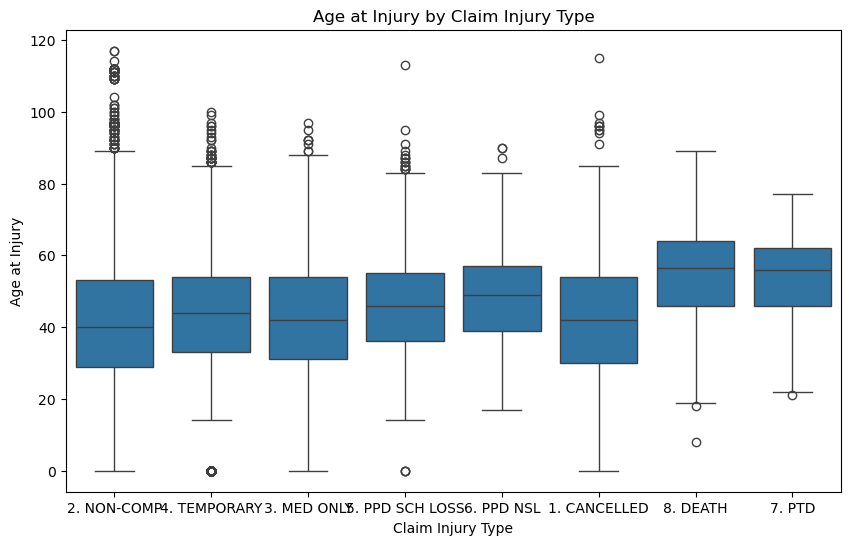

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Claim Injury Type", y="Age at Injury", data=data_train)
plt.title("Age at Injury by Claim Injury Type")
plt.show()

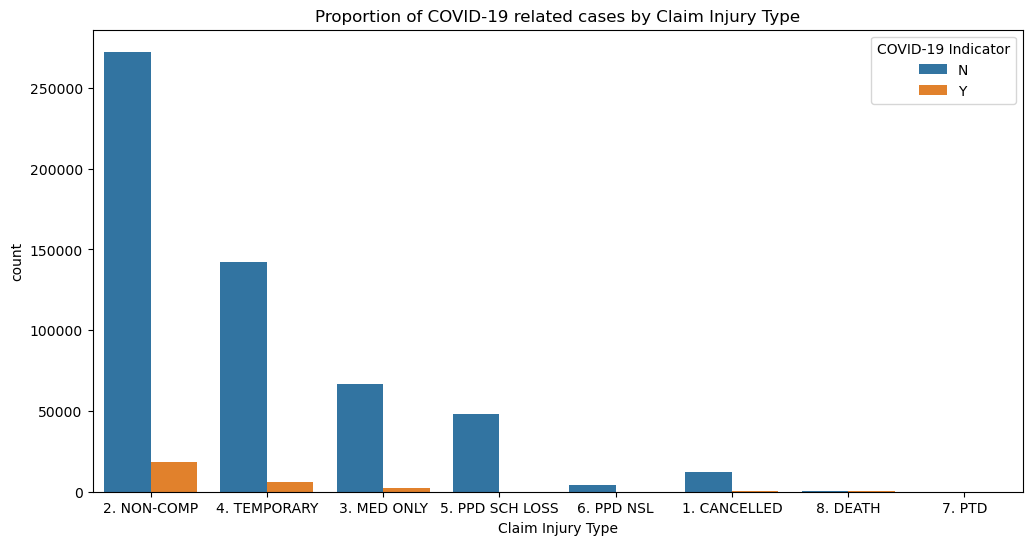

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Claim Injury Type", hue="COVID-19 Indicator", data=data_train)
plt.title("Proportion of COVID-19 related cases by Claim Injury Type")
plt.show()

All claim injury types have high number of negative covid tests.

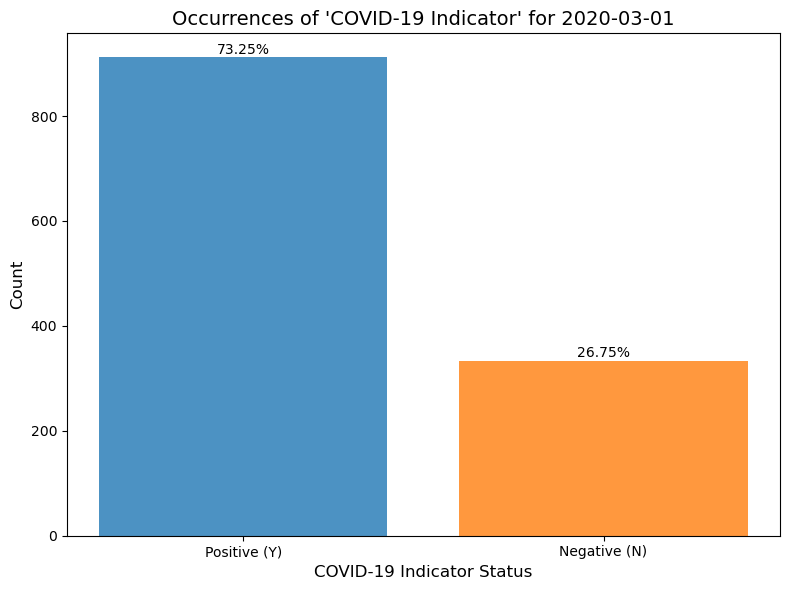

In [54]:
categories = ['Positive (Y)', 'Negative (N)']
counts = [Y_count, N_count]
percentages = [Y_percentage, N_percentage]

#Creating the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['tab:blue', 'tab:orange'], alpha=0.8)

#Add annotations
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.title("Occurrences of 'COVID-19 Indicator' for 2020-03-01", fontsize=14)
plt.xlabel("COVID-19 Indicator Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Show the plot
plt.tight_layout()
plt.show()

Even tho the number of negative covid tests is higher on the average and for all claim injury types, but on the first march 2020 we had more positive than negative results.

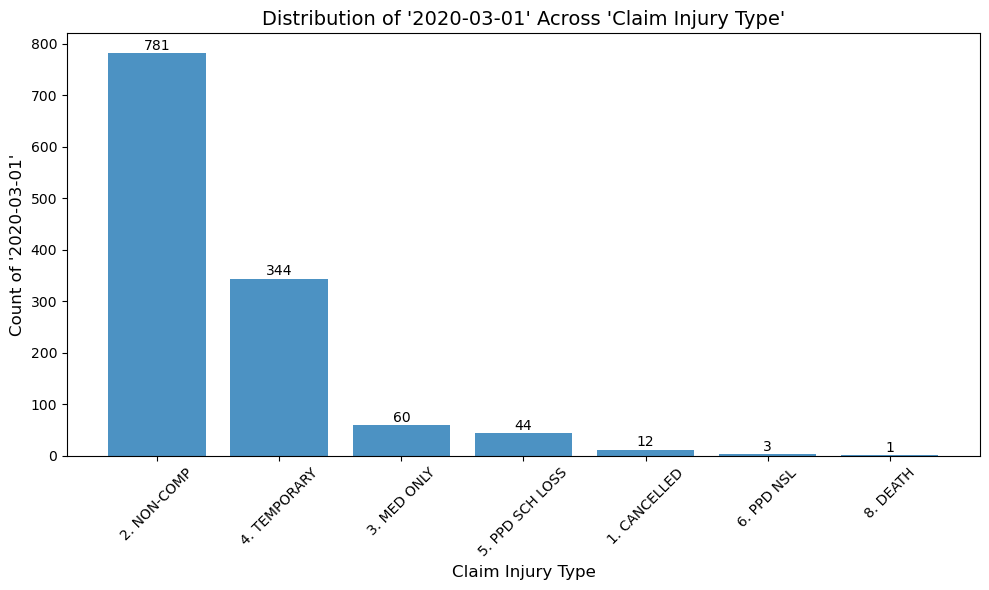

In [55]:
#Filtrer data for when "Accident Date" is equal to "2020-03-01"
filtered_data = data_train[data_train['Accident Date'] == '2020-03-01']

#Count the occurency of the date in "Claim Injury Type"
claim_injury_counts = filtered_data['Claim Injury Type'].value_counts()

#Creating the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, alpha=0.8)

#Adding anotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Distribution of '2020-03-01' Across 'Claim Injury Type'", fontsize=14)
plt.xlabel("Claim Injury Type", fontsize=12)
plt.ylabel("Count of '2020-03-01'", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

#Show the plot
plt.tight_layout()
plt.show()

We can see that the concerned claim injury types of the claims on that same day are distributed in the same order, with NON-COMP as the most frequent with 781 covid claim.

## 1.6. Analysing multivariate relationships

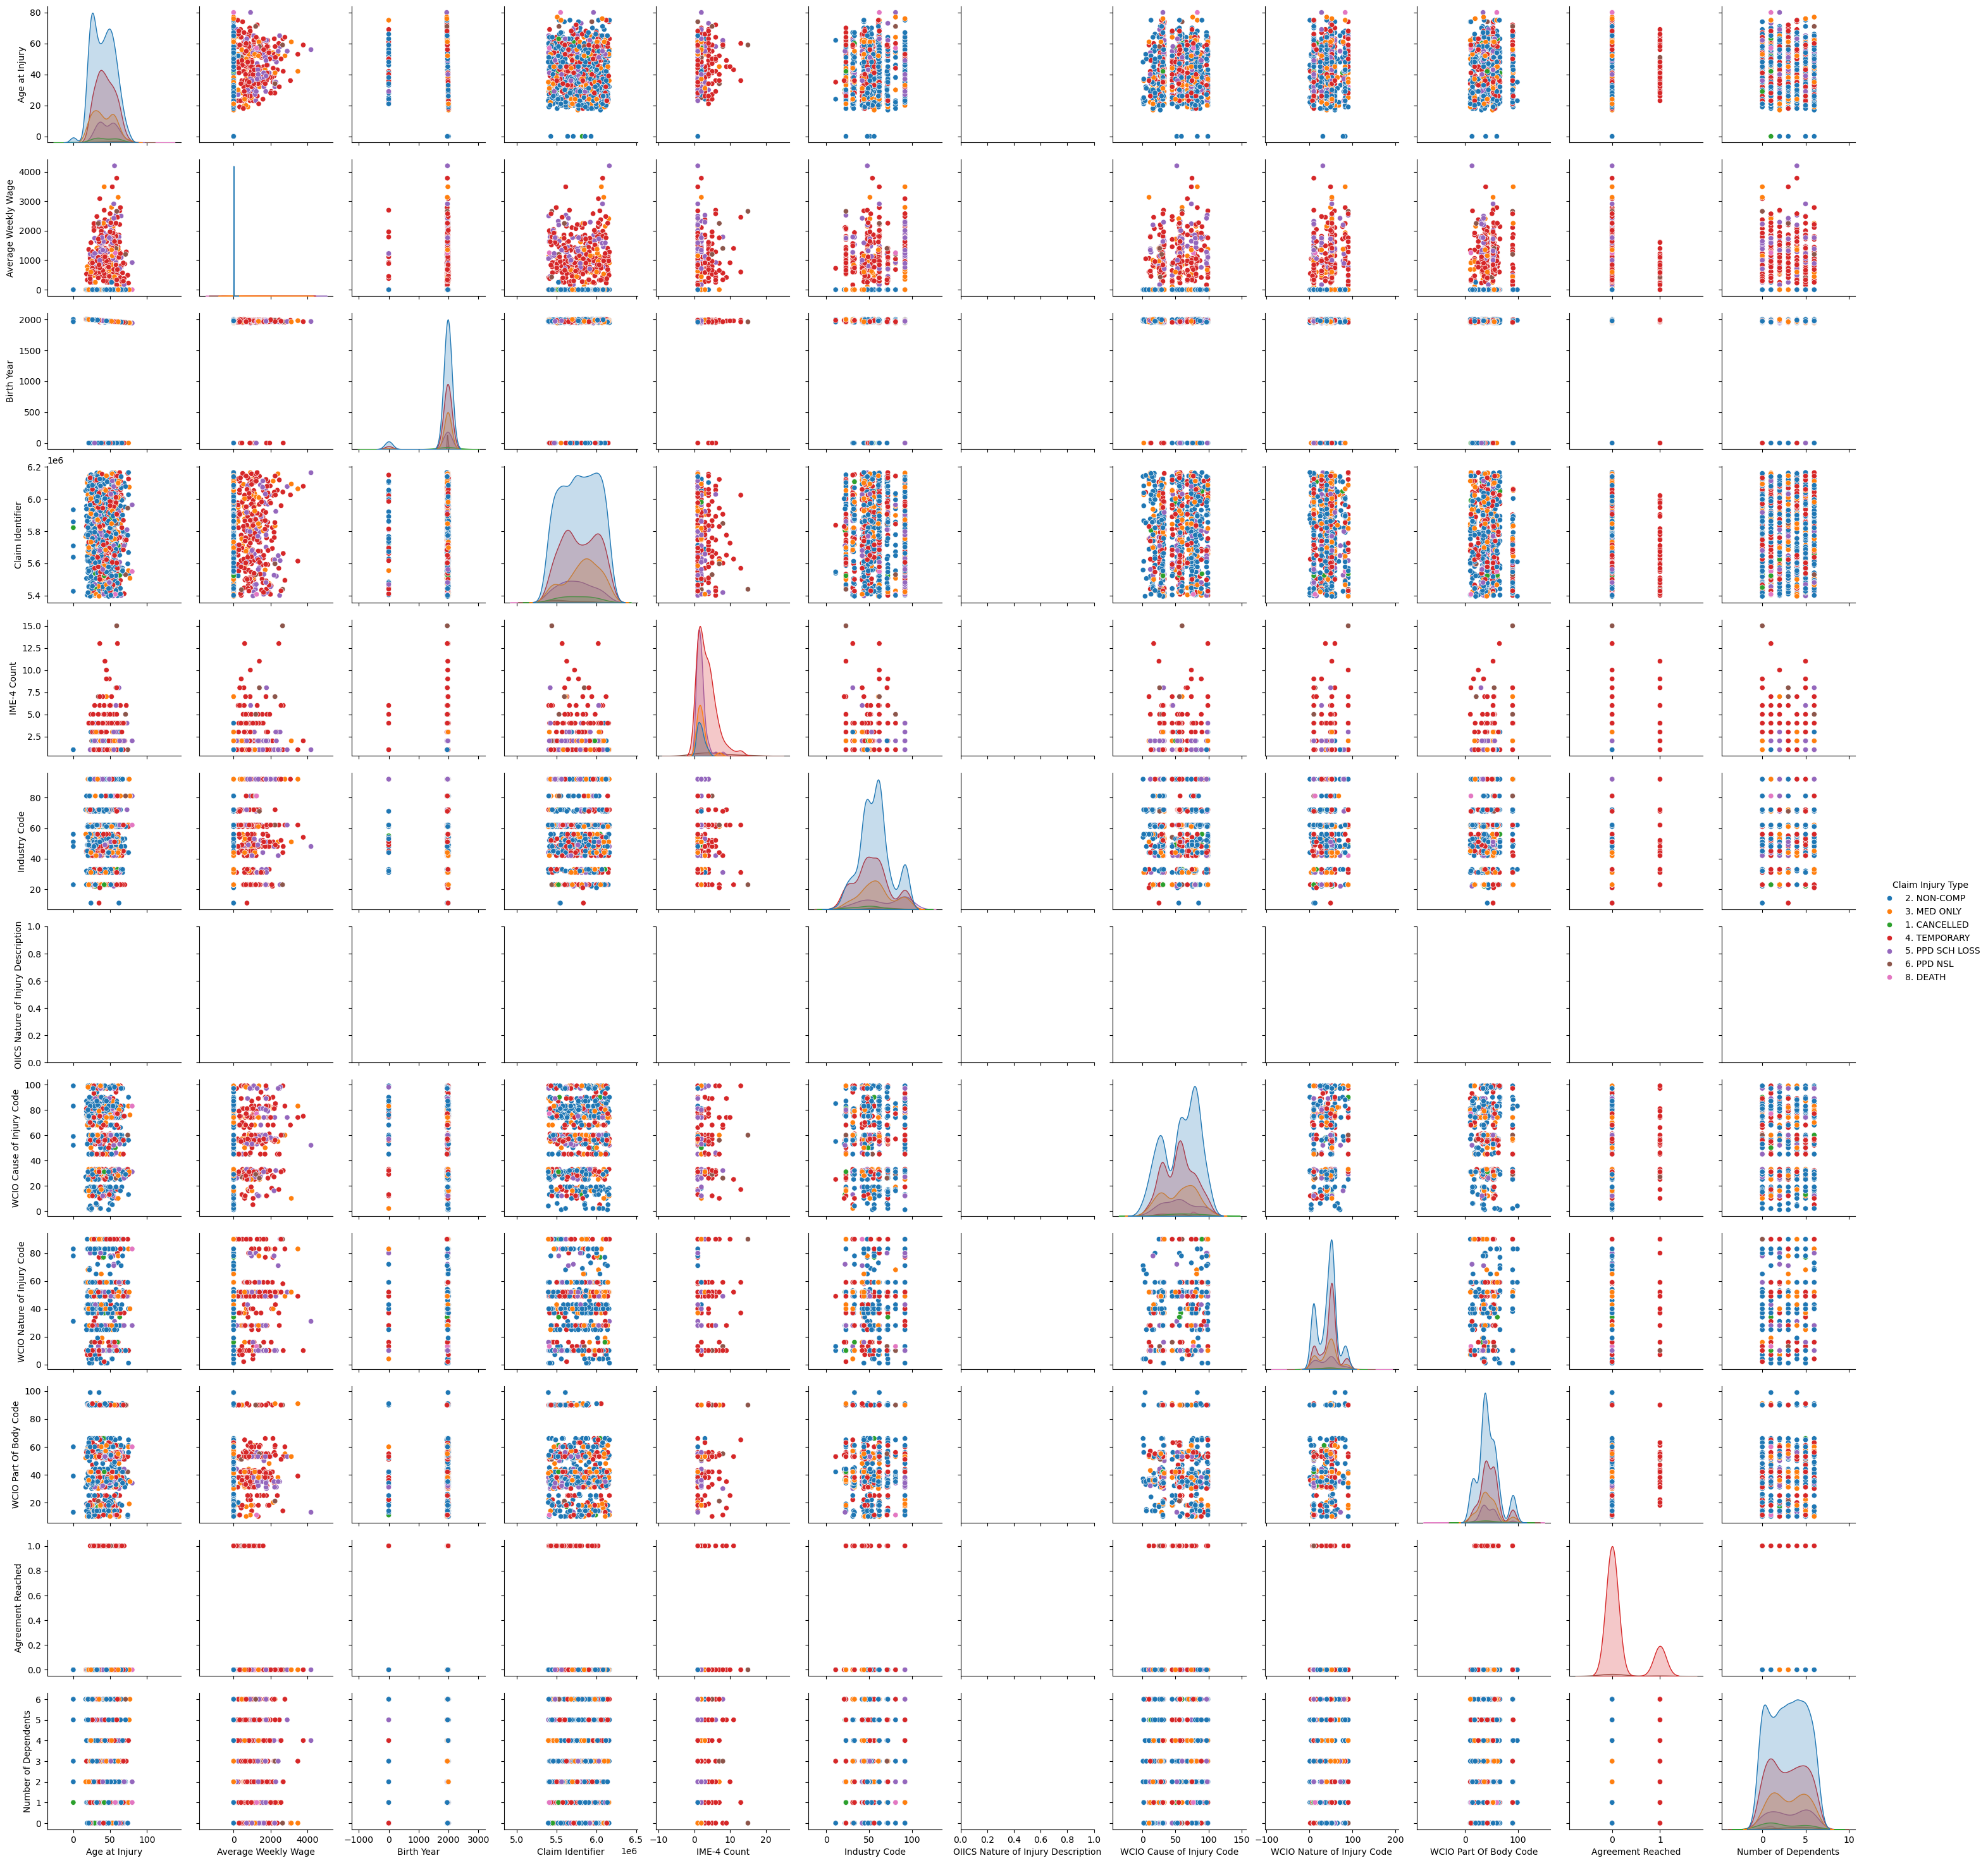

In [56]:
#Sampling 1000 random rows from DataFrame
data_train_sample = data_train.sample(1000, random_state=42)

#Creating the pairplot on the sample
sns.pairplot(data_train_sample, hue="Claim Injury Type")
plt.show()

- Variables distributions: 'Age at injury' appears to follow a normal distribution with peaks at certain age ranges, while 'Average weekly wage' seems skewed which means some workers are earning above the average wage'. Categorical variables like 'COVID-19 indicator' shows a good color separation which means that 'Injury Type' are strongly correlated with the other variables. Also, there is a pattern where certain Injury Types are more common in specific age groups; young workers might have unjuries related to accidents, while older ones might have occupational disease. 
- Relation between variables: From the plots of 'COVID-19 Indicator' and 'Injury Type' we can observe a high concentration of injuries which might be linked to the pandemic period. 
- Correlation: 'Age at Injury' and 'Year of Birth' show a logical inverse correlation, while the weak correlation of'Average Weekly Wage'with temporal variables might indicate a stable economic data relatively to time.
- outliers and anomalies: 'Average Weekly Wage' present isolated points in the scatterplots, which might indicates noise and exceptional cases. In other words, it indicates outliers that needs to be treated.



In conclusion: 'Age at Injury', 'Average Weekly Wage' and 'COVID-19 Indicator' show a strong relationship with 'Injury Type', which might suggest to prioritize them as predictors for the model. Plus, the clearly defined groups might lead us to use Random forest and other decision trees or ensemble methods.

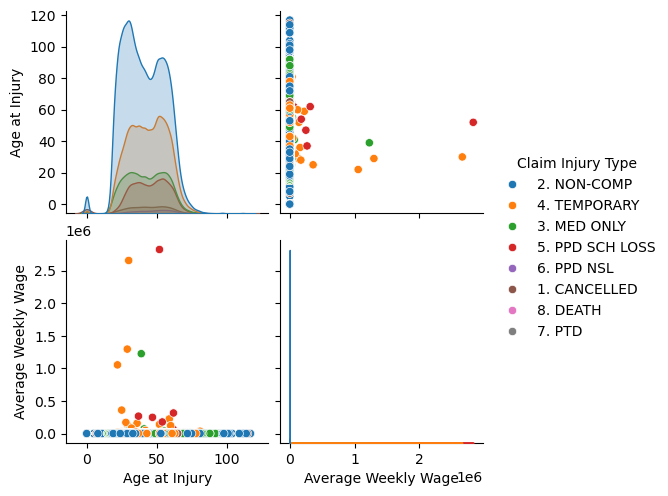

In [57]:
#Selecting most relevant columns for analysis
selected_columns = ["Age at Injury", "Average Weekly Wage", "Claim Injury Type"]
data_train_small = data_train[selected_columns]

#Creating the pairplot with the reduced DataFrame
sns.pairplot(data_train_small, hue="Claim Injury Type")
plt.show()

- Categories like NON-COMP and TEMPORARY dominate the working age range 20–60 years
- Once again we noice the extreme values in age
- Almost all Claim Injury types have 00 average weekly wage, and no clear relation between the weekly rage and the age is observable.

In [58]:
#Identify categorical columns
categorical_columns = data_train.select_dtypes(include=['object', 'category']).columns

#Perform Chi-Square Test for all pairs of categorical variables
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        contingency_table = pd.crosstab(data_train[col1], data_train[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"Chi-Square Test between {col1} and {col2}")
        print(f"Chi2: {chi2:.2f}, P-Value: {p:.4f}, Degrees of Freedom: {dof}")
        if p < 0.05:
            print("Significant association found!")
        else:
            print("No significant association.")
        print("-" * 40)

Chi-Square Test between Accident Date and Alternative Dispute Resolution
Chi2: 62040.45, P-Value: 0.0000, Degrees of Freedom: 11076
Significant association found!
----------------------------------------
Chi-Square Test between Accident Date and Assembly Date
Chi2: 27737670.71, P-Value: 0.0000, Degrees of Freedom: 4962048
Significant association found!
----------------------------------------
Chi-Square Test between Accident Date and Attorney/Representative
Chi2: 10370.74, P-Value: 0.0000, Degrees of Freedom: 5538
Significant association found!
----------------------------------------
Chi-Square Test between Accident Date and C-2 Date
Chi2: 466009234.68, P-Value: 0.0000, Degrees of Freedom: 12812248
Significant association found!
----------------------------------------
Chi-Square Test between Accident Date and C-3 Date
Chi2: 13106204.60, P-Value: 0.0000, Degrees of Freedom: 4086984
Significant association found!
----------------------------------------
Chi-Square Test between Accident

Chi-Square Test between C-2 Date and WCIO Cause of Injury Description
Chi2: 324786.94, P-Value: 0.0000, Degrees of Freedom: 174835
Significant association found!
----------------------------------------
Chi-Square Test between C-2 Date and WCIO Nature of Injury Description
Chi2: 226130.00, P-Value: 0.0000, Degrees of Freedom: 131560
Significant association found!
----------------------------------------
Chi-Square Test between C-2 Date and WCIO Part Of Body Description
Chi2: 283511.91, P-Value: 0.0000, Degrees of Freedom: 127889
Significant association found!
----------------------------------------
Chi-Square Test between C-2 Date and Zip Code
Chi2: 28798869.18, P-Value: 0.0000, Degrees of Freedom: 24026468
Significant association found!
----------------------------------------
Chi-Square Test between C-2 Date and WCB Decision
Chi2: 0.00, P-Value: 1.0000, Degrees of Freedom: 0
No significant association.
----------------------------------------
Chi-Square Test between C-3 Date and Car

Chi-Square Test between Carrier Type and WCIO Part Of Body Description
Chi2: 58335.85, P-Value: 0.0000, Degrees of Freedom: 371
Significant association found!
----------------------------------------
Chi-Square Test between Carrier Type and Zip Code
Chi2: 144647.69, P-Value: 0.0000, Degrees of Freedom: 70413
Significant association found!
----------------------------------------
Chi-Square Test between Carrier Type and WCB Decision
Chi2: 0.00, P-Value: 1.0000, Degrees of Freedom: 0
No significant association.
----------------------------------------
Chi-Square Test between Claim Injury Type and County of Injury
Chi2: 10922.18, P-Value: 0.0000, Degrees of Freedom: 434
Significant association found!
----------------------------------------
Chi-Square Test between Claim Injury Type and COVID-19 Indicator
Chi2: 5768.75, P-Value: 0.0000, Degrees of Freedom: 7
Significant association found!
----------------------------------------
Chi-Square Test between Claim Injury Type and District Name
C

Chi-Square Test between District Name and Zip Code
Chi2: 3118659.39, P-Value: 0.0000, Degrees of Freedom: 70413
Significant association found!
----------------------------------------
Chi-Square Test between District Name and WCB Decision
Chi2: 0.00, P-Value: 1.0000, Degrees of Freedom: 0
No significant association.
----------------------------------------
Chi-Square Test between First Hearing Date and Gender
Chi2: 4150.75, P-Value: 0.0000, Degrees of Freedom: 3279
Significant association found!
----------------------------------------
Chi-Square Test between First Hearing Date and Industry Code Description
Chi2: 26453.24, P-Value: 0.0000, Degrees of Freedom: 20767
Significant association found!
----------------------------------------
Chi-Square Test between First Hearing Date and Medical Fee Region
Chi2: 9470.19, P-Value: 0.0000, Degrees of Freedom: 4372
Significant association found!
----------------------------------------
Chi-Square Test between First Hearing Date and WCIO Cause o

In [59]:
#Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

#Calculate Cramér's V for all pairs of categorical variables
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        confusion_matrix = pd.crosstab(data_train[col1], data_train[col2])
        cramers_v_value = cramers_v(confusion_matrix.to_numpy())
        print(f"Cramér's V between {col1} and {col2}: {cramers_v_value:.2f}")
        if cramers_v_value > 0.5:
            print("Strong association!")
        elif cramers_v_value > 0.3:
            print("Moderate association!")
        else:
            print("Weak or no association.")
        print("-" * 40)

Cramér's V between Accident Date and Alternative Dispute Resolution: 0.21
Weak or no association.
----------------------------------------
Cramér's V between Accident Date and Assembly Date: 0.21
Weak or no association.
----------------------------------------
Cramér's V between Accident Date and Attorney/Representative: 0.09
Weak or no association.
----------------------------------------
Cramér's V between Accident Date and C-2 Date: 0.58
Strong association!
----------------------------------------
Cramér's V between Accident Date and C-3 Date: 0.17
Weak or no association.
----------------------------------------
Cramér's V between Accident Date and Carrier Name: 0.19
Weak or no association.
----------------------------------------
Cramér's V between Accident Date and Carrier Type: 0.34
Moderate association!
----------------------------------------
Cramér's V between Accident Date and Claim Injury Type: 0.10
Weak or no association.
----------------------------------------
Cramér's V 

Cramér's V between Carrier Type and WCIO Part Of Body Description: 0.12
Weak or no association.
----------------------------------------
Cramér's V between Carrier Type and Zip Code: 0.14
Weak or no association.
----------------------------------------
Cramér's V between Carrier Type and WCB Decision: nan
Weak or no association.
----------------------------------------
Cramér's V between Claim Injury Type and County of Injury: 0.05
Weak or no association.
----------------------------------------
Cramér's V between Claim Injury Type and COVID-19 Indicator: 0.10
Weak or no association.
----------------------------------------
Cramér's V between Claim Injury Type and District Name: 0.04
Weak or no association.
----------------------------------------
Cramér's V between Claim Injury Type and First Hearing Date: 0.08
Weak or no association.
----------------------------------------
Cramér's V between Claim Injury Type and Gender: 0.06
Weak or no association.
---------------------------------

Cramér's V between Industry Code Description and Zip Code: 0.17
Weak or no association.
----------------------------------------
Cramér's V between Industry Code Description and WCB Decision: nan
Weak or no association.
----------------------------------------
Cramér's V between Medical Fee Region and WCIO Cause of Injury Description: 0.10
Weak or no association.
----------------------------------------
Cramér's V between Medical Fee Region and WCIO Nature of Injury Description: 0.08
Weak or no association.
----------------------------------------
Cramér's V between Medical Fee Region and WCIO Part Of Body Description: 0.07
Weak or no association.
----------------------------------------
Cramér's V between Medical Fee Region and Zip Code: 0.99
Strong association!
----------------------------------------
Cramér's V between Medical Fee Region and WCB Decision: nan
Weak or no association.
----------------------------------------
Cramér's V between WCIO Cause of Injury Description and WCIO

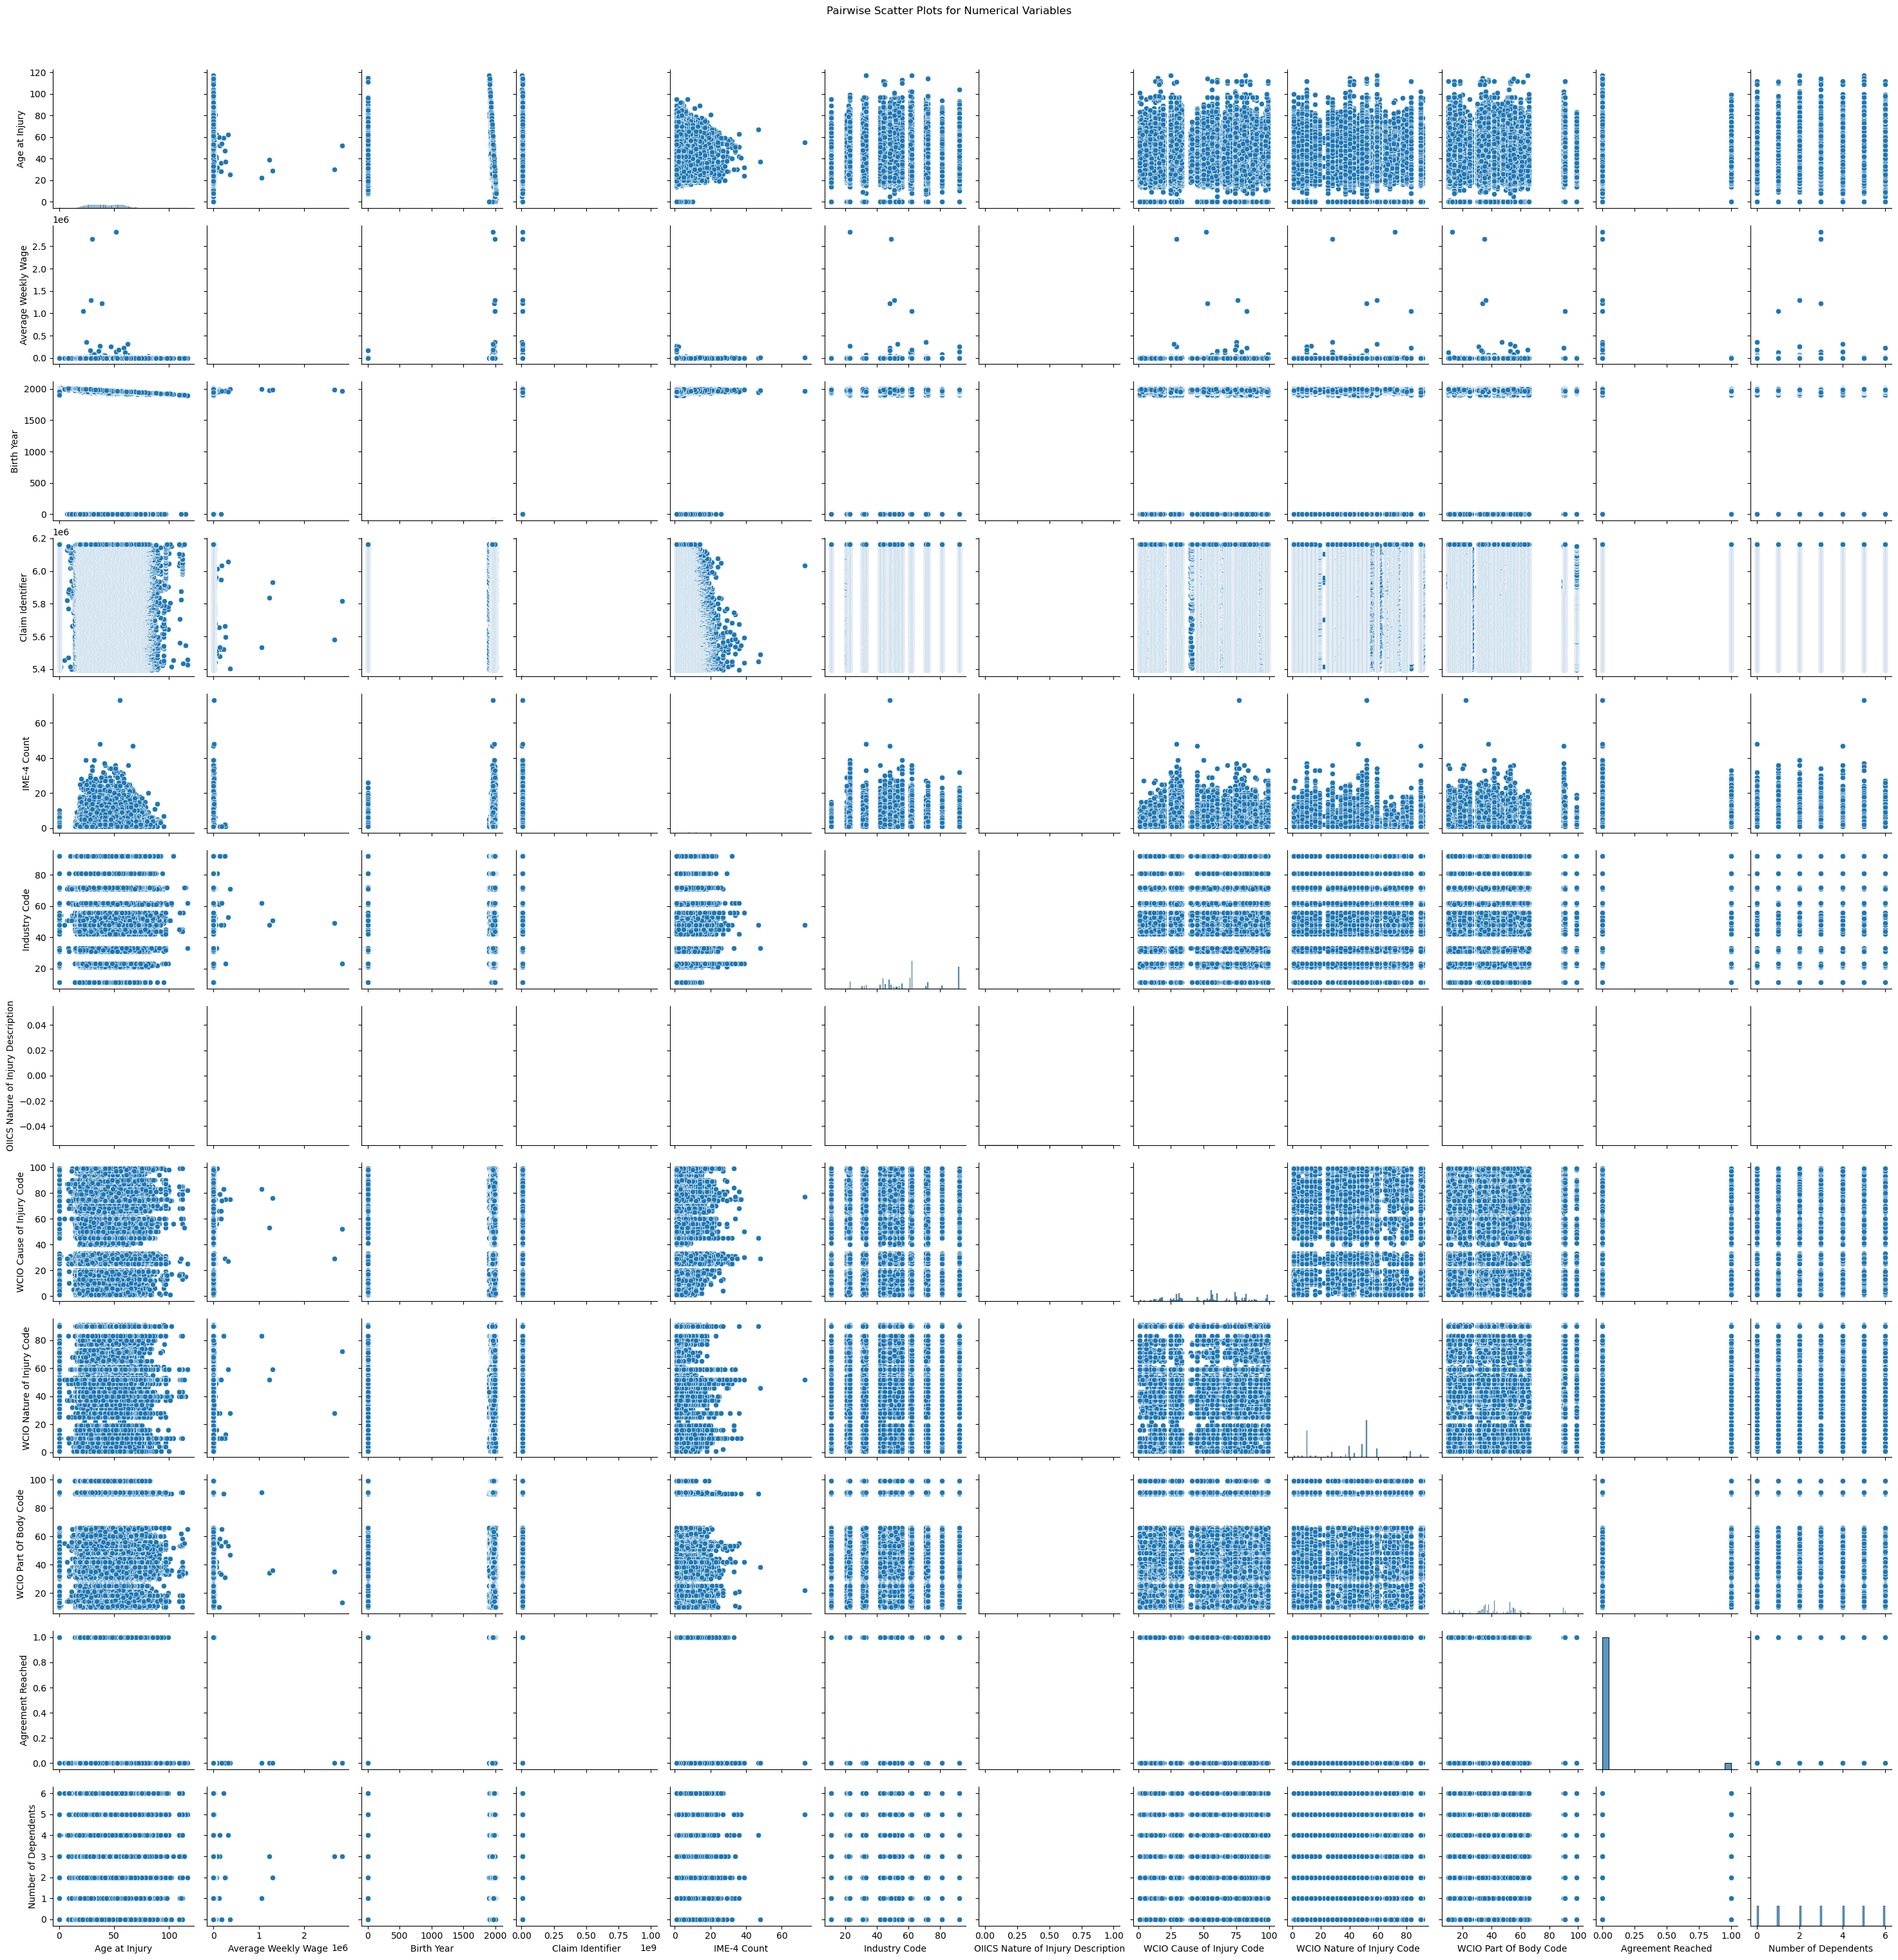

In [60]:
#Identify numerical columns
numerical_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

#Generate pairwise scatter plots
sns.pairplot(data_train[numerical_columns])
plt.suptitle("Pairwise Scatter Plots for Numerical Variables", y=1.02)
plt.show()

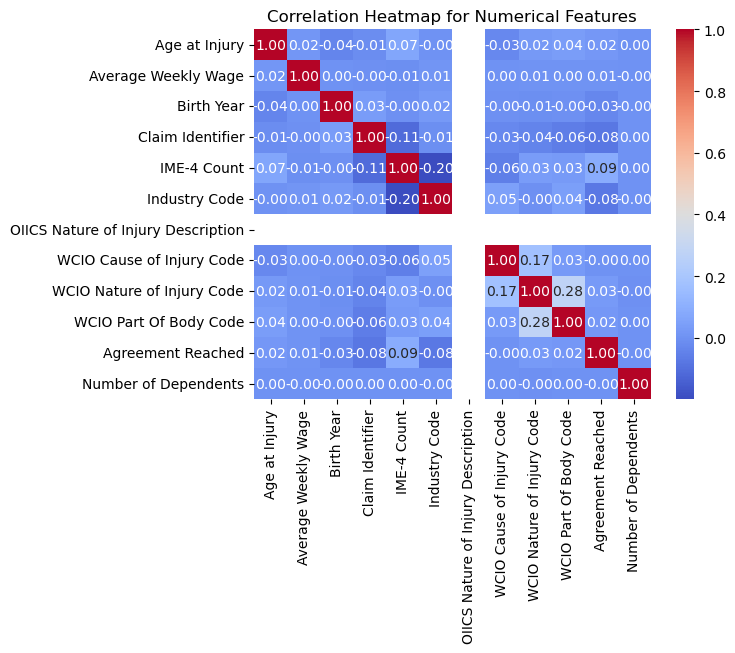

In [61]:
#Calculate and visualize correlation matrix for numerical features
correlation_matrix = data_train[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

From this numerical features' heatmap we noticed different pertinent patterns:

- Most features show near-zero correlations, which means there is no linear relation between them.
- Strong negative correlation (-0.99) between 'Age at Injury' and 'Birth Year' which appears logic because age is derived from the birth year (younger individuals have later birth years)
- 'WCIO Nature of Injury Code' and 'WCIO Part of Body Code' have a moderate correlation (0.23), which might indicate that certain injuries are linked to specific body parts
- Number of Dependents does not have significant correlation with any variable, which means dependents do not directly affect the other numerical features.
- IME-4 Count, Claim Identifier, and Industry Code show almost no significant relationships with other variables which means that they won't be significant for the model.

To conclude:
- Linear relationships are minimal among most variables except those directly related (like 'Age at Injury' and 'Birth Year').
- Coded variables like WCIO codes show mild correlations, which might need adjustments on their variable type.
- Outliers or external influences may affect uncorrelated variables like wages.

# 2. Clean and pre-process the dataset

## 2.1 Splitting data in train and validation

In [62]:
#Separate the independent variables (X) and the dependent variable (y)
X_train = data_train.drop(columns=['Claim Injury Type'])
y_train = data_train['Claim Injury Type']
X_test = data_test.copy()

#Split the training set into 'train' and 'validation' (80% for training and 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [63]:
print(f"Number of columns of training data: {len(X_train.columns)}","\n")
print(f"Number of columns of test data: {len(X_test.columns)}")

Number of columns of training data: 32 

Number of columns of test data: 30


In [64]:
print(X_train.columns,"\n",X_test.columns)

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object') 
 Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Ca

**As we can observe above there is two columns in the training model that are not present in the test data, given this situation we are going to remove them since we will not be able to use them in the model to predict the target "Claim Injury Type"**

These variables are not present, because as it is described these variables are unknown at the start of the claim. `Agreement Reached` is a binary variable to show if there was an agreement without the 
involvement of the WCBand this is  unknown at the start of a claim `WCB Decision` is the decision of the WCB relative to the claim and since it requires WCB deliberation it is unknown at start of claim.

Before starting to perform the pre-processing of our data we are going to remove these features from X_train and X_val.

In [65]:
X_train.drop(columns=["Agreement Reached", "WCB Decision"], inplace=True)
X_val.drop(columns=["Agreement Reached", "WCB Decision"], inplace=True)
display(X_train, X_val)

Accident Date  Age at Injury Alternative Dispute Resolution  \
549647    2022-10-02           42.0                              N   
416922           NaN            NaN                            NaN   
511292    2022-08-02           19.0                              N   
320321    2021-09-07           24.0                              N   
330477    2021-09-27           50.0                              N   
...              ...            ...                            ...   
110268    2020-08-11           51.0                              N   
259178    2021-05-11           45.0                              N   
365838    2021-11-08           66.0                              N   
131932    2018-09-29           55.0                              N   
121958    2020-08-24           34.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
549647    2022-10-13                       Y              1289.22      1980.0   
416922    2022-03-02                     NaN                  NaN         NaN   
511292    2022-08-09                       Y               380.00      2002.0   
320321    2021-09-10                       N                 0.00      1997.0   
330477    2021-09-28                       N                 0.00      1971.0   
...              ...                     ...                  ...         ...   
110268    2020-08-13                       N                  NaN         NaN   
259178    2021-05-24                       N               358.08      1976.0   
365838    2021-11-30                       Y                 0.00      1955.0   
131932    2020-09-23                       Y                  NaN      1963.0   
121958    2020-09-03                       N              1578.59      1986.0   

          C-2 Date    C-3 Date                    Carrier Name Carrier Type  \
549647  2022-10-13         NaN  UTICA SPECIALTY RISK INSURANCE  1A. PRIVATE   
416922         NaN         NaN                             NaN          NaN   
511292  2022-08-08  2022-08-31    AMERICAN ZURICH INSURANCE CO  1A. PRIVATE   
320321  2021-09-10         NaN      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE   
330477  2021-09-28         NaN            STATE INSURANCE FUND      2A. SIF   
...            ...         ...                             ...          ...   
110268  2020-08-13         NaN    TRAVELERS CASUALTY INS CO OF  1A. PRIVATE   
259178  2021-05-22         NaN       REDWOOD FIRE AND CASUALTY  1A. PRIVATE   
365838  2021-11-30  2022-06-22     INDEMNITY INS. OF N AMERICA  1A. PRIVATE   
131932  2020-09-25  2020-09-16         EMPLOYERS ASSURANCE CO.  1A. PRIVATE   
121958  2020-09-02         NaN      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE   

        Claim Identifier County of Injury COVID-19 Indicator District Name  \
549647           6107456           MONROE                  N     ROCHESTER   
416922         207443276              NaN                NaN           NaN   
511292           6057247         NEW YORK                  N           NYC   
320321           5808258      WESTCHESTER                  N           NYC   
330477           5821968            BRONX                  N           NYC   
...                  ...              ...                ...           ...   
110268           5536601          GENESEE                  N     ROCHESTER   
259178           5729342          SUFFOLK                  N     HAUPPAUGE   
365838           5867607           FULTON                  N        ALBANY   
131932           5563633           NASSAU                  N           NYC   
121958           5552082          SUFFOLK                  N     HAUPPAUGE   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
549647         2023-07-25      M          5.0           44.0   
416922                NaN    NaN          NaN            NaN   
511292         2023-02-01      F          2.0           44.0   
320321                NaN      F          NaN      

Accident Date  Age at Injury Alternative Dispute Resolution  \
183430    2020-12-09           55.0                              N   
48345     2020-02-06           26.0                              N   
74286     2020-05-19           55.0                              N   
78564     2020-03-06           43.0                              N   
189231           NaN            0.0                              N   
...              ...            ...                            ...   
358157    2021-10-29           51.0                              N   
112493    2020-04-07           56.0                              N   
514775    2022-08-10           19.0                              N   
266379    2021-05-19           24.0                              N   
441888    2022-02-23           59.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
183430    2021-01-07                       N                 0.00      1965.0   
48345     2020-03-23                       N                 0.00      1993.0   
74286     2020-06-01                       N               820.66      1964.0   
78564     2020-06-09                       N                 0.00      1976.0   
189231    2021-01-19                       Y                 0.00      1964.0   
...              ...                     ...                  ...         ...   
358157    2021-11-15                       N              1507.76      1970.0   
112493    2020-08-17                       N                 0.00      1963.0   
514775    2022-08-15                       N               332.17      2002.0   
266379    2021-06-07                       N                  NaN      1997.0   
441888    2022-04-13                       Y               604.45      1962.0   

          C-2 Date    C-3 Date                   Carrier Name  \
183430  2021-01-07         NaN   ARCH INDEMNITY INSURANCE CO.   
48345   2020-03-22         NaN        A I U INSURANCE COMPANY   
74286   2020-06-01         NaN           STATE INSURANCE FUND   
78564   2020-06-09         NaN              STRATHMORE INS CO   
189231  2021-01-22  2021-01-07           STATE INSURANCE FUND   
...            ...         ...                            ...   
358157  2021-11-15         NaN           STATE INSURANCE FUND   
112493  2020-08-17         NaN       MEMORIAL SLOAN KETTERING   
514775  2022-08-15         NaN  SAFETY NATIONAL CASUALTY CORP   
266379  2021-06-05         NaN     OLD REPUBLIC INSURANCE CO.   
441888  2022-04-13  2022-05-10               NEW YORK COLLEGE   

            Carrier Type  Claim Identifier County of Injury  \
183430       1A. PRIVATE           5632495         RICHMOND   
48345        1A. PRIVATE           5457503         ONONDAGA   
74286            2A. SIF           5490795           QUEENS   
78564        1A. PRIVATE           5494718      WESTCHESTER   
189231           2A. SIF           5638314          SUFFOLK   
...                  ...               ...              ...   
358157           2A. SIF           5857279             ERIE   
112493  4A. SELF PRIVATE           5539489         ROCKLAND   
514775       1A. PRIVATE           6062128      WESTCHESTER   
266379       1A. PRIVATE           5738466         HERKIMER   
441888  4A. SELF PRIVATE           5967557         DUTCHESS   

       COVID-19 Indicator District Name First Hearing Date Gender  \
183430                  Y           NYC                NaN      F   
48345                   N      SYRACUSE                NaN      M   
74286                   N           NYC                NaN      F   
78564                   N           NYC                NaN      F   
189231                  N     HAUPPAUGE                NaN      M   
...                   ...           ...                ...    ...   
358157                  N       BUFFALO         2022-05-27      M   
112493                  Y           NYC                NaN      M   
514775                  N         

## 2.2 Modification of the data

In [66]:
#Convert numerical variables of code to an object (object) type
X_train['Claim Identifier'] = X_train['Claim Identifier'].astype(object)
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].astype(object)
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].astype(object)
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].astype(object)
X_train['Industry Code'] = X_train['Industry Code'].astype(object)

X_val['Claim Identifier'] = X_val['Claim Identifier'].astype(object)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].astype(object)
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].astype(object)
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].astype(object)
X_val['Industry Code'] = X_val['Industry Code'].astype(object)

X_test['Claim Identifier'] = X_test['Claim Identifier'].astype(object)
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].astype(object)
X_test['WCIO Nature of Injury Code'] = X_test['WCIO Nature of Injury Code'].astype(object)
X_test['WCIO Cause of Injury Code'] = X_test['WCIO Cause of Injury Code'].astype(object)
X_test['Industry Code'] = X_test['Industry Code'].astype(object)

The numerical variables representing codes were turned into categorical ones on the train, validation and test datasets.

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474776 entries, 549647 to 121958
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456282 non-null  object 
 1   Age at Injury                       457698 non-null  float64
 2   Alternative Dispute Resolution      459255 non-null  object 
 3   Assembly Date                       474776 non-null  object 
 4   Attorney/Representative             459255 non-null  object 
 5   Average Weekly Wage                 436308 non-null  float64
 6   Birth Year                          435977 non-null  float64
 7   C-2 Date                            447549 non-null  object 
 8   C-3 Date                            149994 non-null  object 
 9   Carrier Name                        459255 non-null  object 
 10  Carrier Type                        459255 non-null  object 
 11  Claim Identifier          

In [68]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118694 entries, 183430 to 441888
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       114055 non-null  object 
 1   Age at Injury                       114402 non-null  float64
 2   Alternative Dispute Resolution      114771 non-null  object 
 3   Assembly Date                       118694 non-null  object 
 4   Attorney/Representative             114771 non-null  object 
 5   Average Weekly Wage                 109067 non-null  float64
 6   Birth Year                          108971 non-null  float64
 7   C-2 Date                            111917 non-null  object 
 8   C-3 Date                            37251 non-null   object 
 9   Carrier Name                        114771 non-null  object 
 10  Carrier Type                        114771 non-null  object 
 11  Claim Identifier          

In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387158 non-null  float64
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [70]:
categorical_columns_train = X_train.select_dtypes(exclude=np.number).columns

#Check for unique values in categorical columns for train
for col in categorical_columns_train:
    print(f"{col}: {X_train[col].unique()}")
    
categorical_columns_val = X_val.select_dtypes(exclude=np.number).columns

#Check for unique values in categorical columns for validation
for col in categorical_columns_val:
    print(f"{col}: {X_val[col].unique()}")
    
categorical_columns_test = X_test.select_dtypes(exclude=np.number).columns

#Check for unique values in categorical columns for test
for col in categorical_columns_test:
    print(f"{col}: {X_test[col].unique()}")

Accident Date: ['2022-10-02' nan '2022-08-02' ... '2010-03-10' '2000-08-20' '2000-01-11']
Alternative Dispute Resolution: ['N' nan 'Y' 'U']
Assembly Date: ['2022-10-13' '2022-03-02' '2022-08-09' ... '2022-07-16' '2021-05-01'
 '2022-11-20']
Attorney/Representative: ['Y' nan 'N']
C-2 Date: ['2022-10-13' nan '2022-08-08' ... '2000-09-13' '2023-09-30' '2009-10-22']
C-3 Date: [nan '2022-08-31' '2020-09-10' ... '2019-12-06' '2017-09-01' '2017-02-09']
Carrier Name: ['UTICA SPECIALTY RISK INSURANCE' nan 'AMERICAN ZURICH INSURANCE CO' ...
 'ALLIANZ GLOBAL RISKS US' 'FIRST CENTRAL INS CO'
 'R C DIOCESE OF BROOKLYN']
Carrier Type: ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)']
Claim Identifier: [6107456 207443276 6057247 ... 5867607 5563633 5552082]
County of Injury: ['MONROE' nan 'NEW YORK' 'WESTCHESTER' 'BRONX' 'KINGS' 'SUFFOLK' 'NASSAU'
 'ORAN

COVID-19 Indicator: ['N' 'Y']
District Name: ['NYC' 'ALBANY' 'BUFFALO' 'SYRACUSE' 'BINGHAMTON' 'HAUPPAUGE' 'ROCHESTER'
 'STATEWIDE']
First Hearing Date: [nan '2023-07-10' '2023-02-15' '2023-08-14' '2023-08-11' '2023-03-27'
 '2023-05-01' '2023-09-14' '2023-04-03' '2023-06-29' '2023-08-31'
 '2023-07-31' '2023-04-17' '2023-09-15' '2023-05-11' '2023-07-14'
 '2023-06-02' '2023-06-09' '2023-06-05' '2023-05-10' '2023-03-03'
 '2023-08-02' '2023-08-07' '2023-11-08' '2024-03-14' '2023-06-14'
 '2023-09-21' '2023-05-08' '2024-04-30' '2023-08-22' '2023-05-30'
 '2023-02-10' '2023-11-09' '2023-09-05' '2023-09-27' '2023-06-16'
 '2023-09-19' '2023-10-10' '2024-06-07' '2023-07-12' '2023-02-16'
 '2023-10-23' '2023-03-15' '2023-04-25' '2024-04-22' '2023-11-13'
 '2024-01-17' '2023-12-19' '2023-06-22' '2023-10-06' '2023-04-11'
 '2023-03-07' '2023-06-26' '2023-03-10' '2023-08-29' '2023-04-05'
 '2023-07-27' '2023-02-21' '2023-02-06' '2023-12-22' '2023-07-03'
 '2023-10-30' '2024-05-28' '2024-06-03' '2023-11-30

In [71]:
numerical_columns_train = X_train.select_dtypes(include=np.number).columns

#Check for unique values in numerical columns for train
for col in numerical_columns_train:
    print(f"{col}: {X_train[col].unique()}")
    
numerical_columns_val = X_val.select_dtypes(include=np.number).columns

#Check for unique values in numerical columns for val
for col in numerical_columns_val:
    print(f"{col}: {X_val[col].unique()}")
    
numerical_columns_test = X_test.select_dtypes(include=np.number).columns

#Check for unique values in numerical columns for test
for col in numerical_columns_test:
    print(f"{col}: {X_test[col].unique()}")

Age at Injury: [ 42.  nan  19.  24.  50.  38.  27.  68.  53.  57.  35.  30.  56.  25.
  62.  23.  31.  52.  34.  37.  26.  46.  40.   0.  45.  48.  33.  59.
  51.  60.  39.  18.  64.  55.  20.  66.  43.  69.  32.  28.  44.  49.
  72.  29.  41.  63.  47.  36.  54.  65.  61.  22.  15.  58.  67.  17.
  21.  76.  70.   7.  86.  16.  73.  80.  74.  13.  71.  75.  77.  79.
  88. 112.  78.  83.  81.  97.  82.  87.  14.  85.  84.  99.  89.  92.
 111.  12.  11.  10.  96. 100. 104. 110. 109.  91.   8. 115.   1.  98.
  95. 101. 113.  90.  94.   5. 114.   9. 102.  93. 117.]
Average Weekly Wage: [1289.22     nan  380.   ... 2694.26 1531.06  358.08]
Birth Year: [1980.   nan 2002. 1997. 1971. 1981. 1995. 1953. 1963. 1987. 1991. 1964.
 1994. 1959. 1990. 1969. 1970. 1982. 1999. 1975.    0. 1989. 1978. 1960.
 1958. 1976. 1972. 1988. 1962. 1996. 1993. 2003. 1983. 1966. 1954. 1984.
 1950. 1968. 1961. 1998. 1965. 1948. 1979. 1956. 1977. 2004. 1985. 1986.
 1973. 2000. 1992. 1974. 1955. 2001. 1952. 1967. 195

## 2.3. Checking missing values

In [72]:
#Check for missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())  #Count missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum())  #Count missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum())  #Count missing values per column in the test set

Missing values in X_train:
Accident Date                          18494
Age at Injury                          17078
Alternative Dispute Resolution         15521
Assembly Date                              0
Attorney/Representative                15521
Average Weekly Wage                    38468
Birth Year                             38799
C-2 Date                               27227
C-3 Date                              324782
Carrier Name                           15521
Carrier Type                           15521
Claim Identifier                           0
County of Injury                       15521
COVID-19 Indicator                     15521
District Name                          15521
First Hearing Date                    354013
Gender                                 15521
IME-4 Count                           368657
Industry Code                          23509
Industry Code Description              23509
Medical Fee Region                     15521
OIICS Nature of Injury Descr

In [73]:
#Check for missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum() / X_train.shape[0] * 100)  #Impact of missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum() / X_val.shape[0] * 100)  #Impact of missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum() / X_test.shape[0] * 100)  #Impact of missing values per column in the test set

Missing values in X_train:
Accident Date                           3.895311
Age at Injury                           3.597065
Alternative Dispute Resolution          3.269121
Assembly Date                           0.000000
Attorney/Representative                 3.269121
Average Weekly Wage                     8.102347
Birth Year                              8.172064
C-2 Date                                5.734704
C-3 Date                               68.407417
Carrier Name                            3.269121
Carrier Type                            3.269121
Claim Identifier                        0.000000
County of Injury                        3.269121
COVID-19 Indicator                      3.269121
District Name                           3.269121
First Hearing Date                     74.564216
Gender                                  3.269121
IME-4 Count                            77.648617
Industry Code                           4.951598
Industry Code Description               4.

Some variables like 'C-3 Date', 'First Hearing Date' and 'OIICS Nature of Injury Description' have more than 50% missing values which might affect the model afterward.

In [74]:
#Show columns with more than 50% missing values
missing_percent_train = X_train.isnull().sum() / X_train.shape[0] * 100
missing_percent_val = X_val.isnull().sum() / X_val.shape[0] * 100
missing_percent_test = X_test.isnull().sum() / X_test.shape[0] * 100

print("Missing values in X_train:")
print(missing_percent_train[missing_percent_train > 50])

print("\nMissing values in X_val:")
print(missing_percent_val[missing_percent_val > 50])

print("\nMissing values in X_test:")
print(missing_percent_test[missing_percent_val > 50])

Missing values in X_train:
C-3 Date                               68.407417
First Hearing Date                     74.564216
IME-4 Count                            77.648617
OIICS Nature of Injury Description    100.000000
dtype: float64

Missing values in X_val:
C-3 Date                               68.615937
First Hearing Date                     74.695435
IME-4 Count                            77.518661
OIICS Nature of Injury Description    100.000000
dtype: float64

Missing values in X_test:
C-3 Date                               78.035698
First Hearing Date                     88.909595
IME-4 Count                            90.914621
OIICS Nature of Injury Description    100.000000
dtype: float64


In [75]:
unique_values_C3 = X_train['C-3 Date'].unique()

print(unique_values_C3)

[nan '2022-08-31' '2020-09-10' ... '2019-12-06' '2017-09-01' '2017-02-09']


In [76]:
unique_values_FHD = X_train['First Hearing Date'].unique()

print(unique_values_FHD)

['2023-07-25' nan '2023-02-01' ... '2020-09-17' '2020-05-20' '2020-04-15']


In [77]:
unique_values_IME4 = X_train['IME-4 Count'].unique()

print(unique_values_IME4)

[ 5. nan  2.  1.  8.  6.  3.  7. 10.  4. 13. 16. 11. 12.  9. 14. 23. 15.
 18. 22. 17. 19. 29. 21. 26. 39. 27. 37. 20. 24. 30. 32. 25. 34. 48. 28.
 47. 33. 73. 31. 35. 36.]


In [78]:
unique_values_OIICS = X_train['OIICS Nature of Injury Description'].unique()

print(unique_values_OIICS)

[nan]


In [79]:
cols_to_drop = ['IME-4 Count', 'OIICS Nature of Injury Description']  #Identify columns to be removed
X_train.drop(columns=cols_to_drop, inplace=True)  #Remove columns
X_val.drop(columns=cols_to_drop, inplace=True)  #Remove columns
X_test.drop(columns=cols_to_drop, inplace=True)  #Remove columns

We decided to drop 'IME-4 Count' and 'OIICS Nature of Injury Description' because they are not very pertinents, compared to the other columns with more than 50% missing values that we can not drop because of their importance.

In [80]:
X_train.shape

(474776, 28)

In [81]:
X_val.shape

(118694, 28)

In [82]:
X_test.shape

(387975, 28)

In [83]:
X_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
549647    2022-10-02           42.0                              N   
416922           NaN            NaN                            NaN   
511292    2022-08-02           19.0                              N   
320321    2021-09-07           24.0                              N   
330477    2021-09-27           50.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
549647    2022-10-13                       Y              1289.22      1980.0   
416922    2022-03-02                     NaN                  NaN         NaN   
511292    2022-08-09                       Y               380.00      2002.0   
320321    2021-09-10                       N                 0.00      1997.0   
330477    2021-09-28                       N                 0.00      1971.0   

          C-2 Date    C-3 Date                    Carrier Name Carrier Type  \
549647  2022-10-13         NaN  UTICA SPECIALTY RISK INSURANCE  1A. PRIVATE   
416922         NaN         NaN                             NaN          NaN   
511292  2022-08-08  2022-08-31    AMERICAN ZURICH INSURANCE CO  1A. PRIVATE   
320321  2021-09-10         NaN      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE   
330477  2021-09-28         NaN            STATE INSURANCE FUND      2A. SIF   

       Claim Identifier County of Injury COVID-19 Indicator District Name  \
549647          6107456           MONROE                  N     ROCHESTER   
416922        207443276              NaN                NaN           NaN   
511292          6057247         NEW YORK                  N           NYC   
320321          5808258      WESTCHESTER                  N           NYC   
330477          5821968            BRONX                  N           NYC   

       First Hearing Date Gender Industry Code  \
549647         2023-07-25      M          44.0   
416922                NaN    NaN           NaN   
511292         2023-02-01      F          44.0   
320321                NaN      F          31.0   
330477                NaN      M          62.0   

                Industry Code Description Medical Fee Region  \
549647                       RETAIL TRADE                 II   
416922                                NaN                NaN   
511292                       RETAIL TRADE                 IV   
320321                      MANUFACTURING                 IV   
330477  HEALTH CARE AND SOCIAL ASSISTANCE                 UK   

       WCIO Cause of Injury Code        WCIO Cause of Injury Description  \
549647                      70.0    STRIKING AGAINST OR STEPPING ON, NOC   
416922                       NaN                                     NaN   
511292                      60.0                STRAIN OR INJURY BY, NOC   
320321                      53.0                                TWISTING   
330477                      74.0  FELLOW WORKER, PATIENT OR OTHER PERSON   

       WCIO Nature of Injury Code WCIO Nature of Injury Description  \
549647                       49.0                    SPRAIN OR TEAR   
416922                        NaN                               NaN   
511292                       52.0                    STRAIN OR TEAR   
320321                       52.0                    STRAIN OR TEAR   
330477                       10.0                         CONTUSION   

       WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
549647                    NaN                      MULTIPLE    14609   
416922                    NaN                           NaN      NaN   
511292                   56.0                          FOOT    10009   
320321                   55.0                         ANKLE    10461   
330477                   30.0    MULTIPLE UPPER EXTREMITIES    07666   

        Number of Dependents  
549647                   4.0  
416922                   NaN  
511292                   2.0  
320321                   3.0  
330

In [84]:
X_val.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
183430    2020-12-09           55.0                              N   
48345     2020-02-06           26.0                              N   
74286     2020-05-19           55.0                              N   
78564     2020-03-06           43.0                              N   
189231           NaN            0.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
183430    2021-01-07                       N                 0.00      1965.0   
48345     2020-03-23                       N                 0.00      1993.0   
74286     2020-06-01                       N               820.66      1964.0   
78564     2020-06-09                       N                 0.00      1976.0   
189231    2021-01-19                       Y                 0.00      1964.0   

          C-2 Date    C-3 Date                  Carrier Name Carrier Type  \
183430  2021-01-07         NaN  ARCH INDEMNITY INSURANCE CO.  1A. PRIVATE   
48345   2020-03-22         NaN       A I U INSURANCE COMPANY  1A. PRIVATE   
74286   2020-06-01         NaN          STATE INSURANCE FUND      2A. SIF   
78564   2020-06-09         NaN             STRATHMORE INS CO  1A. PRIVATE   
189231  2021-01-22  2021-01-07          STATE INSURANCE FUND      2A. SIF   

       Claim Identifier County of Injury COVID-19 Indicator District Name  \
183430          5632495         RICHMOND                  Y           NYC   
48345           5457503         ONONDAGA                  N      SYRACUSE   
74286           5490795           QUEENS                  N           NYC   
78564           5494718      WESTCHESTER                  N           NYC   
189231          5638314          SUFFOLK                  N     HAUPPAUGE   

       First Hearing Date Gender Industry Code  \
183430                NaN      F          62.0   
48345                 NaN      M          48.0   
74286                 NaN      F          62.0   
78564                 NaN      F          44.0   
189231                NaN      M          51.0   

                Industry Code Description Medical Fee Region  \
183430  HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
48345      TRANSPORTATION AND WAREHOUSING                  I   
74286   HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
78564                        RETAIL TRADE                III   
189231                        INFORMATION                 IV   

       WCIO Cause of Injury Code        WCIO Cause of Injury Description  \
183430                      83.0                                PANDEMIC   
48345                       31.0                 FALL, SLIP OR TRIP, NOC   
74286                       74.0  FELLOW WORKER, PATIENT OR OTHER PERSON   
78564                       17.0          OBJECT BEING LIFTED OR HANDLED   
189231                      52.0                         CONTINUAL NOISE   

       WCIO Nature of Injury Code WCIO Nature of Injury Description  \
183430                       83.0                          COVID-19   
48345                        52.0                    STRAIN OR TEAR   
74286                        10.0                         CONTUSION   
78564                        40.0                        LACERATION   
189231                       31.0        HEARING LOSS OR IMPAIRMENT   

       WCIO Part Of Body Code        WCIO Part Of Body Description Zip Code  \
183430                   60.0                                LUNGS    10314   
48345                    90.0  MULTIPLE BODY PARTS (INCLUDING BODY    13027   
74286                    44.0                                CHEST    11434   
78564                    37.0                                THUMB    10566   
189231                   13.0                               EAR(S)    11757   

        Number of Dependents  
183430                   2.0  
48345                    3.0  
74286                    2.0  
7856

In [85]:
X_test.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24           19.0                              N    2023-01-02   
1    2022-11-20           19.0                              N    2023-01-02   
2    2022-12-26           59.0                              N    2023-01-02   
3    2022-12-28           55.0                              N    2023-01-02   
4    2022-12-20           25.0                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  NaN      2003.0  2023-01-02   
1                       N                  NaN      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0         0.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

  C-3 Date                 Carrier Name Carrier Type Claim Identifier  \
0      NaN    INDEMNITY INSURANCE CO OF  1A. PRIVATE          6165911   
1      NaN      A I U INSURANCE COMPANY  1A. PRIVATE          6166141   
2      NaN    AMGUARD INSURANCE COMPANY  1A. PRIVATE          6165907   
3      NaN  INDEMNITY INS. OF N AMERICA  1A. PRIVATE          6166047   
4      NaN   NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE          6166102   

  County of Injury COVID-19 Indicator District Name First Hearing Date Gender  \
0            BRONX                  N           NYC                NaN      M   
1           QUEENS                  N           NYC                NaN      F   
2      WESTCHESTER                  N           NYC                NaN      F   
3           QUEENS                  N           NYC                NaN      F   
4            KINGS                  N           NYC                NaN      M   

  Industry Code                          Industry Code Description  \
0          48.0                     TRANSPORTATION AND WAREHOUSING   
1          45.0                                       RETAIL TRADE   
2          56.0  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...   
3          48.0                     TRANSPORTATION AND WAREHOUSING   
4          55.0            MANAGEMENT OF COMPANIES AND ENTERPRISES   

  Medical Fee Region WCIO Cause of Injury Code  \
0                 IV                      31.0   
1                 IV                      75.0   
2                III                      68.0   
3                 IV                      25.0   
4                 IV                      79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0           FALL, SLIP OR TRIP, NOC                       10.0   
1          FALLING OR FLYING OBJECT                       10.0   
2                 STATIONARY OBJECT                       49.0   
3  FROM DIFFERENT LEVEL (ELEVATION)                       10.0   
4    OBJECT BEING LIFTED OR HANDLED                       40.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   54.0   
1                         CONTUSION                   10.0   
2                    SPRAIN OR TEAR                   62.0   
3                         CONTUSION                   53.0   
4                        LACERATION                   37.0   

  WCIO Part Of Body Description Zip Code  Number of Dependents  
0                     LOWER LEG    10466                     1  
1          MULTIPLE HEAD INJURY    11691                     1  
2                      BUTTOCKS    10604                     0  
3                          KNEE    11411                     6  
4                         THUMB    11212                     5

### 2.3.1. Treatment for Categorical values

For categorical data, we replace missing values withe the mode for the 3 sets:

In [86]:
#Convert Accident Date and Assembly Date to datetime
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')  #Convert strings to datetime
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')

X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')

X_test['Accident Date'] = pd.to_datetime(X_test['Accident Date'], errors='coerce')
X_test['Assembly Date'] = pd.to_datetime(X_test['Assembly Date'], errors='coerce')

#Identify rows with missing Accident Date
missing_accident_date = X_train['Accident Date'].isnull()

#Impute missing values
#Strategy: Replace with a random date within a reasonable range before 'Assembly Date'
def impute_accident_date(row):
    if pd.isnull(row['Accident Date']) and pd.notnull(row['Assembly Date']):
        #Generate a random date between 30 and 365 days before the Assembly Date
        days_before = np.random.randint(30, 365)
        return row['Assembly Date'] - pd.to_timedelta(days_before, unit='days')
    return row['Accident Date']

#Apply the function to impute missing values
X_train['Accident Date'] = X_train.apply(impute_accident_date, axis=1)
X_val['Accident Date'] = X_val.apply(impute_accident_date, axis=1)
X_test['Accident Date'] = X_test.apply(impute_accident_date, axis=1)

#Check if there are still missing values
print("Missing Accident Dates after imputation:", X_train['Accident Date'].isnull().sum())
print("Missing Accident Dates in X_val:", X_val['Accident Date'].isnull().sum())

Missing Accident Dates after imputation: 0
Missing Accident Dates in X_val: 0


In [87]:
def validate_and_filter_dates(df):
    """
    Function to check if 'Accident Date' occurs before 'Assembly Date'.
    If not, those rows are removed.

    Args:
        df (pd.DataFrame): DataFrame containing 'Accident Date' and 'Assembly Date'.

    Returns:
        pd.DataFrame: Filtered DataFrame with valid rows only.
    """
    # Ensure 'Accident Date' and 'Assembly Date' are in datetime format
    df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
    df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')
    
    # Filter rows where Accident Date occurs before Assembly Date
    valid_rows = df[df['Accident Date'] < df['Assembly Date']]

    # Print number of rows removed
    removed_rows = len(df) - len(valid_rows)
    print(f"Number of invalid rows removed: {removed_rows}")

    return valid_rows

# Apply the function to X_train and X_val
X_train_filtered = validate_and_filter_dates(X_train)
X_val_filtered = validate_and_filter_dates(X_val)
X_test_filtered = validate_and_filter_dates(X_test)

# Verify the results
print(f"X_train shape after filtering: {X_train_filtered.shape}")
print(f"X_val shape after filtering: {X_val_filtered.shape}")
print(f"X_test shape after filtering: {X_test_filtered.shape}")

Number of invalid rows removed: 3938
Number of invalid rows removed: 1019
Number of invalid rows removed: 2938
X_train shape after filtering: (470838, 28)
X_val shape after filtering: (117675, 28)
X_test shape after filtering: (385037, 28)


In [88]:
#Replacing missing values in 'First Hearing Date' with "No hearing has taken place yet"
X_train['First Hearing Date'].fillna("No hearing has taken place yet", inplace=True)
X_val['First Hearing Date'].fillna("No hearing has taken place yet", inplace=True)
X_test['First Hearing Date'].fillna("No hearing has taken place yet", inplace=True)

#Replacing missing values in 'C-3 Date' with "Compensation form not received"
X_train['C-3 Date'].fillna("Compensation form not received", inplace=True)
X_val['C-3 Date'].fillna("Compensation form not received", inplace=True)
X_test['C-3 Date'].fillna("Compensation form not received", inplace=True)

#Replacing missing values in 'C-2 Date' with "Accident/illness report not submitted"
X_train['C-2 Date'].fillna("Accident/illness report not submitted", inplace=True)
X_val['C-2 Date'].fillna("Accident/illness report not submitted", inplace=True)
X_test['C-2 Date'].fillna("Accident/illness report not submitted", inplace=True)

In [89]:
#Selecting categorical columns in train data:
categorical_columns = X_train.select_dtypes(exclude=np.number).columns

#Handling missing values in categorical variables for train data
for col in categorical_columns:
    if X_train[col].isnull().sum() > 0:
        mode = X_train[col].mode()[0]  #Calculating the mode for imputation
        print(f"{col}: Mode = {mode}")
        X_train[col].fillna(mode, inplace=True)  #Filling missing values with mode
        print(f"Filling missing values in '{col}' with mode: {mode}")

Alternative Dispute Resolution: Mode = N
Filling missing values in 'Alternative Dispute Resolution' with mode: N
Attorney/Representative: Mode = N
Filling missing values in 'Attorney/Representative' with mode: N
Carrier Name: Mode = STATE INSURANCE FUND
Filling missing values in 'Carrier Name' with mode: STATE INSURANCE FUND
Carrier Type: Mode = 1A. PRIVATE
Filling missing values in 'Carrier Type' with mode: 1A. PRIVATE
County of Injury: Mode = SUFFOLK
Filling missing values in 'County of Injury' with mode: SUFFOLK
COVID-19 Indicator: Mode = N
Filling missing values in 'COVID-19 Indicator' with mode: N
District Name: Mode = NYC
Filling missing values in 'District Name' with mode: NYC
Gender: Mode = M
Filling missing values in 'Gender' with mode: M
Industry Code: Mode = 62.0
Filling missing values in 'Industry Code' with mode: 62.0
Industry Code Description: Mode = HEALTH CARE AND SOCIAL ASSISTANCE
Filling missing values in 'Industry Code Description' with mode: HEALTH CARE AND SOCIAL A

In [90]:
#Selecting categorical columns in val data:
categorical_columns = X_val.select_dtypes(exclude=np.number).columns

#Handling missing values in categorical variables for val data
for col in categorical_columns:
    if X_val[col].isnull().sum() > 0:
        mode = X_train[col].mode()[0]  #Use the mode calculated from X_train
        X_val[col].fillna(mode, inplace=True)
        print(f"Filling missing values in '{col}' of validation set with mode: {mode}")

Filling missing values in 'Alternative Dispute Resolution' of validation set with mode: N
Filling missing values in 'Attorney/Representative' of validation set with mode: N
Filling missing values in 'Carrier Name' of validation set with mode: STATE INSURANCE FUND
Filling missing values in 'Carrier Type' of validation set with mode: 1A. PRIVATE
Filling missing values in 'County of Injury' of validation set with mode: SUFFOLK
Filling missing values in 'COVID-19 Indicator' of validation set with mode: N
Filling missing values in 'District Name' of validation set with mode: NYC
Filling missing values in 'Gender' of validation set with mode: M
Filling missing values in 'Industry Code' of validation set with mode: 62.0
Filling missing values in 'Industry Code Description' of validation set with mode: HEALTH CARE AND SOCIAL ASSISTANCE
Filling missing values in 'Medical Fee Region' of validation set with mode: IV
Filling missing values in 'WCIO Cause of Injury Code' of validation set with mode

In [91]:
#Apply imputations for categorical columns that exist in both X_train and X_test
for col in categorical_columns:
    if col in X_train.columns and col in X_test.columns:  #Ensure the column exists in both sets
        if X_test[col].isnull().sum() > 0:
            # Use the mode from X_train to fill missing values in X_test
            mode = X_train[col].mode()[0]
            X_test[col].fillna(mode, inplace=True)
            print(f"Filling missing values in '{col}' of test set with mode: {mode}")

Filling missing values in 'Industry Code' of test set with mode: 62.0
Filling missing values in 'Industry Code Description' of test set with mode: HEALTH CARE AND SOCIAL ASSISTANCE
Filling missing values in 'WCIO Cause of Injury Code' of test set with mode: 56.0
Filling missing values in 'WCIO Cause of Injury Description' of test set with mode: LIFTING
Filling missing values in 'WCIO Nature of Injury Code' of test set with mode: 52.0
Filling missing values in 'WCIO Nature of Injury Description' of test set with mode: STRAIN OR TEAR
Filling missing values in 'WCIO Part Of Body Code' of test set with mode: 42.0
Filling missing values in 'WCIO Part Of Body Description' of test set with mode: LOWER BACK AREA
Filling missing values in 'Zip Code' of test set with mode: 11236


In [92]:
#Check for numerical missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())  #Count missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum())  #Count missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum())  #Count missing values per column in the test set

Missing values in X_train:
Accident Date                            0
Age at Injury                        17078
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                  38468
Birth Year                           38799
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
Claim Identifier                         0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
Industry Code                            0
Industry Code Description                0
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description         0
WCIO Nature of Injury Code 

### 2.3.2. Treatment for Numerical values

For numerical missing values, we will compare the difference of the mean and the median with the threshold 1e-5 in order to select if we replace them with the mean or the median:

In [93]:
def dynamic_impute_age_birthyear(df):
#Dynamically imputes 'Age at Injury' and 'Birth Year' based on 'Accident Date' whenever missing values are being processed.
    
    #Convert Accident Date to year if not already in the correct format
    df['Accident Year'] = pd.to_datetime(df['Accident Date']).dt.year

    condition_1 = df['Age at Injury'].isna() & df['Birth Year'].isna()
    if condition_1.sum() > 0:
        df.loc[condition_1, 'Age at Injury'] = X_train['Age at Injury'].median()
        
    condition_2 = ((df['Age at Injury'].isna()) | (df['Age at Injury'] == 0)) & ((df['Birth Year'].isna()) | (df['Birth Year'] == 0))
    if condition_2.sum() > 0:
        df.loc[condition_2, 'Age at Injury'] = X_train['Age at Injury'].median()
        
    condition_3 = ((df['Age at Injury'].isna()) | (df['Age at Injury'] == 0)) & df['Birth Year'].notna()
    if condition_3.sum() > 0:
        df.loc[condition_3, 'Age at Injury'] = df['Accident Year'] - df['Birth Year']
        
    condition_4 = (df['Birth Year'].isna() | (df['Birth Year'] == 0)) & df['Age at Injury'].notna()
    if condition_4.sum() > 0:
        df.loc[condition_4, 'Birth Year'] = df['Accident Year'] - df['Age at Injury']

    df.drop(columns=['Accident Year'], inplace=True)
    return df

dynamic_impute_age_birthyear(X_train)
dynamic_impute_age_birthyear(X_val)
dynamic_impute_age_birthyear(X_test)

Accident Date  Age at Injury Alternative Dispute Resolution  \
0         2022-12-24           19.0                              N   
1         2022-11-20           19.0                              N   
2         2022-12-26           59.0                              N   
3         2022-12-28           55.0                              N   
4         2022-12-20           25.0                              N   
...              ...            ...                            ...   
387970    2012-09-12           52.0                              N   
387971    2024-05-22           59.0                              N   
387972    2024-05-06           45.0                              N   
387973    2024-02-24           42.0                              N   
387974    2023-10-02           42.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
0         2023-01-02                       N                  NaN      2003.0   
1         2023-01-02                       N                  NaN      2003.0   
2         2023-01-02                       N                  0.0      1963.0   
3         2023-01-02                       N                  0.0      1967.0   
4         2023-01-02                       N                  0.0      1997.0   
...              ...                     ...                  ...         ...   
387970    2024-06-05                       N                  NaN      1960.0   
387971    2024-06-05                       Y                  0.0      1965.0   
387972    2024-06-05                       Y                  0.0      1979.0   
387973    2024-06-05                       Y                  0.0      1981.0   
387974    2024-06-05                       Y                  0.0      1981.0   

                                     C-2 Date                        C-3 Date  \
0                                  2023-01-02  Compensation form not received   
1                                  2023-01-02  Compensation form not received   
2                                  2022-12-31  Compensation form not received   
3                                  2023-01-02  Compensation form not received   
4                                  2022-12-31  Compensation form not received   
...                                       ...                             ...   
387970                             2012-10-23  Compensation form not received   
387971  Accident/illness report not submitted                      2024-05-28   
387972  Accident/illness report not submitted  Compensation form not received   
387973  Accident/illness report not submitted                      2024-05-21   
387974  Accident/illness report not submitted                      2024-05-28   

                         Carrier Name      Carrier Type Claim Identifier  \
0           INDEMNITY INSURANCE CO OF       1A. PRIVATE          6165911   
1             A I U INSURANCE COMPANY       1A. PRIVATE          6166141   
2           AMGUARD INSURANCE COMPANY       1A. PRIVATE          6165907   
3         INDEMNITY INS. OF N AMERICA       1A. PRIVATE          6166047   
4          NEW HAMPSHIRE INSURANCE CO       1A. PRIVATE          6166102   
...                               ...               ...              ...   
387970           STATE INSURANCE FUND           2A. SIF          6553137   
387971          NYC TRANSIT AUTHORITY   3A. SELF PUBLIC          6553119   
387972           STATE INSURANCE FUND           2A. SIF          6553542   
387973  NEW YORK BLACK CAR OPERATORS'  4A. SELF PRIVATE          6553455   
387974   CNY OTHER THAN ED, HED WATER   3A. SELF PUBLIC          6553594   

       County of Injury COVID-19 Indicator District Name  \
0                 BRONX                  N           NYC   
1                QUEENS                  N           NYC   
2           WESTCHESTER                  N           NYC   
3                QUEENS                  N           NYC   
4      

In [94]:
#For the treatment numerical values in train data:
numerical_columns = X_train.select_dtypes(include=np.number).columns

for col in numerical_columns:
    if X_train[col].isnull().sum() > 0:
        mean = X_train[col].mean()
        median = X_train[col].median()

        print(f"{col}: Mean = {mean}, Median = {median}")

        #Comparing mean and median
        if abs(mean - median) < 1e-5:  #Using a small threshold to compare
            print(f"Filling missing values in '{col}' with the mean: {mean}")
            X_train[col].fillna(mean, inplace=True)
        else:
            print(f"Filling missing values in '{col}' with the median: {median}")
            X_train[col].fillna(median, inplace=True)

Average Weekly Wage: Mean = 494.71091286430686, Median = 0.0
Filling missing values in 'Average Weekly Wage' with the median: 0.0
Number of Dependents: Mean = 3.0059161032541835, Median = 3.0
Filling missing values in 'Number of Dependents' with the median: 3.0


In [95]:
#Treating missing values in numerical variables in validation data:
numerical_columns = X_val.select_dtypes(include=np.number).columns

#Aplicar o mesmo processo para o conjunto de validação e teste
for col in numerical_columns:
    if X_val[col].isnull().sum() > 0:
        mean = X_train[col].mean()
        median = X_train[col].median()

        if abs(mean - median) < 1e-5:  #Using a small threshold to compare
            print(f"Filling missing values in '{col}' of validation set with the mean: {mean}")
            X_val[col].fillna(mean, inplace=True)
        else:
            print(f"Filling missing values in '{col}' of validation set with the median: {median}")
            X_val[col].fillna(median, inplace=True)

Filling missing values in 'Average Weekly Wage' of validation set with the median: 0.0
Filling missing values in 'Number of Dependents' of validation set with the median: 3.0


In [96]:
#Treating missing values in numerical variables in test data:
numerical_columns_t = X_train.select_dtypes(include=np.number).columns

#Aplicar o mesmo processo para o conjunto de validação e teste
for col in numerical_columns_t:
    if X_test[col].isnull().sum() > 0:
        mean = X_train[col].mean()
        median = X_train[col].median()

        if abs(mean - median) < 1e-5:  #Using a small threshold to compare
            print(f"Filling missing values in '{col}' of test set with the mean: {mean}")
            X_test[col].fillna(mean, inplace=True)
        else:
            print(f"Filling missing values in '{col}' of test set with the median: {median}")
            X_test[col].fillna(median, inplace=True)

Filling missing values in 'Average Weekly Wage' of test set with the median: 0.0


In [97]:
#Check for numerical missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())  #Count missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum())  #Count missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum())  #Count missing values per column in the test set

Missing values in X_train:
Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               

In [98]:
#Convert 'Accident Date' and 'Assembly Date' back to object (string) type
X_train_filtered['Accident Date'] = X_train_filtered['Accident Date'].astype(str)
X_train_filtered['Assembly Date'] = X_train_filtered['Assembly Date'].astype(str)

X_val_filtered['Accident Date'] = X_val_filtered['Accident Date'].astype(str)
X_val_filtered['Assembly Date'] = X_val_filtered['Assembly Date'].astype(str)

X_test_filtered['Accident Date'] = X_test_filtered['Accident Date'].astype(str)
X_test_filtered['Assembly Date'] = X_test_filtered['Assembly Date'].astype(str)

In [99]:
#Checking the cleaned dataset
X_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
549647    2022-10-02           42.0                              N   
416922    2021-11-17           42.0                              N   
511292    2022-08-02           19.0                              N   
320321    2021-09-07           24.0                              N   
330477    2021-09-27           50.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
549647    2022-10-13                       Y              1289.22      1980.0   
416922    2022-03-02                       N                 0.00      1979.0   
511292    2022-08-09                       Y               380.00      2002.0   
320321    2021-09-10                       N                 0.00      1997.0   
330477    2021-09-28                       N                 0.00      1971.0   

                                     C-2 Date                        C-3 Date  \
549647                             2022-10-13  Compensation form not received   
416922  Accident/illness report not submitted  Compensation form not received   
511292                             2022-08-08                      2022-08-31   
320321                             2021-09-10  Compensation form not received   
330477                             2021-09-28  Compensation form not received   

                          Carrier Name Carrier Type Claim Identifier  \
549647  UTICA SPECIALTY RISK INSURANCE  1A. PRIVATE          6107456   
416922            STATE INSURANCE FUND  1A. PRIVATE        207443276   
511292    AMERICAN ZURICH INSURANCE CO  1A. PRIVATE          6057247   
320321      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE          5808258   
330477            STATE INSURANCE FUND      2A. SIF          5821968   

       County of Injury COVID-19 Indicator District Name  \
549647           MONROE                  N     ROCHESTER   
416922          SUFFOLK                  N           NYC   
511292         NEW YORK                  N           NYC   
320321      WESTCHESTER                  N           NYC   
330477            BRONX                  N           NYC   

                    First Hearing Date Gender  Industry Code  \
549647                      2023-07-25      M           44.0   
416922  No hearing has taken place yet      M           62.0   
511292                      2023-02-01      F           44.0   
320321  No hearing has taken place yet      F           31.0   
330477  No hearing has taken place yet      M           62.0   

                Industry Code Description Medical Fee Region  \
549647                       RETAIL TRADE                 II   
416922  HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
511292                       RETAIL TRADE                 IV   
320321                      MANUFACTURING                 IV   
330477  HEALTH CARE AND SOCIAL ASSISTANCE                 UK   

        WCIO Cause of Injury Code        WCIO Cause of Injury Description  \
549647                       70.0    STRIKING AGAINST OR STEPPING ON, NOC   
416922                       56.0                                 LIFTING   
511292                       60.0                STRAIN OR INJURY BY, NOC   
320321                       53.0                                TWISTING   
330477                       74.0  FELLOW WORKER, PATIENT OR OTHER PERSON   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
549647                        49.0                    SPRAIN OR TEAR   
416922                        52.0                    STRAIN OR TEAR   
511292                        52.0                    STRAIN OR TEAR   
320321                        52.0                    STRAIN OR TEAR   
330477                        10.0                         CONTUSION   

        WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
549647                    42.0                      MULTIPLE    14609   
416922

In [100]:
X_val.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
183430    2020-12-09           55.0                              N   
48345     2020-02-06           26.0                              N   
74286     2020-05-19           55.0                              N   
78564     2020-03-06           43.0                              N   
189231    2020-09-15           56.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
183430    2021-01-07                       N                 0.00      1965.0   
48345     2020-03-23                       N                 0.00      1993.0   
74286     2020-06-01                       N               820.66      1964.0   
78564     2020-06-09                       N                 0.00      1976.0   
189231    2021-01-19                       Y                 0.00      1964.0   

          C-2 Date                        C-3 Date  \
183430  2021-01-07  Compensation form not received   
48345   2020-03-22  Compensation form not received   
74286   2020-06-01  Compensation form not received   
78564   2020-06-09  Compensation form not received   
189231  2021-01-22                      2021-01-07   

                        Carrier Name Carrier Type Claim Identifier  \
183430  ARCH INDEMNITY INSURANCE CO.  1A. PRIVATE          5632495   
48345        A I U INSURANCE COMPANY  1A. PRIVATE          5457503   
74286           STATE INSURANCE FUND      2A. SIF          5490795   
78564              STRATHMORE INS CO  1A. PRIVATE          5494718   
189231          STATE INSURANCE FUND      2A. SIF          5638314   

       County of Injury COVID-19 Indicator District Name  \
183430         RICHMOND                  Y           NYC   
48345          ONONDAGA                  N      SYRACUSE   
74286            QUEENS                  N           NYC   
78564       WESTCHESTER                  N           NYC   
189231          SUFFOLK                  N     HAUPPAUGE   

                    First Hearing Date Gender  Industry Code  \
183430  No hearing has taken place yet      F           62.0   
48345   No hearing has taken place yet      M           48.0   
74286   No hearing has taken place yet      F           62.0   
78564   No hearing has taken place yet      F           44.0   
189231  No hearing has taken place yet      M           51.0   

                Industry Code Description Medical Fee Region  \
183430  HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
48345      TRANSPORTATION AND WAREHOUSING                  I   
74286   HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
78564                        RETAIL TRADE                III   
189231                        INFORMATION                 IV   

        WCIO Cause of Injury Code        WCIO Cause of Injury Description  \
183430                       83.0                                PANDEMIC   
48345                        31.0                 FALL, SLIP OR TRIP, NOC   
74286                        74.0  FELLOW WORKER, PATIENT OR OTHER PERSON   
78564                        17.0          OBJECT BEING LIFTED OR HANDLED   
189231                       52.0                         CONTINUAL NOISE   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
183430                        83.0                          COVID-19   
48345                         52.0                    STRAIN OR TEAR   
74286                         10.0                         CONTUSION   
78564                         40.0                        LACERATION   
189231                        31.0        HEARING LOSS OR IMPAIRMENT   

        WCIO Part Of Body Code        WCIO Part Of Body Description Zip Code  \
183430                    60.0                                LUNGS    10314   
48345                     90.0  MULTIPLE BODY PARTS (INCLUDING BODY    13027   
74286                     44.0                                CHEST    11434   
78564 

In [101]:
X_test.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24           19.0                              N    2023-01-02   
1    2022-11-20           19.0                              N    2023-01-02   
2    2022-12-26           59.0                              N    2023-01-02   
3    2022-12-28           55.0                              N    2023-01-02   
4    2022-12-20           25.0                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  0.0      2003.0  2023-01-02   
1                       N                  0.0      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0      1967.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

                         C-3 Date                 Carrier Name Carrier Type  \
0  Compensation form not received    INDEMNITY INSURANCE CO OF  1A. PRIVATE   
1  Compensation form not received      A I U INSURANCE COMPANY  1A. PRIVATE   
2  Compensation form not received    AMGUARD INSURANCE COMPANY  1A. PRIVATE   
3  Compensation form not received  INDEMNITY INS. OF N AMERICA  1A. PRIVATE   
4  Compensation form not received   NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE   

  Claim Identifier County of Injury COVID-19 Indicator District Name  \
0          6165911            BRONX                  N           NYC   
1          6166141           QUEENS                  N           NYC   
2          6165907      WESTCHESTER                  N           NYC   
3          6166047           QUEENS                  N           NYC   
4          6166102            KINGS                  N           NYC   

               First Hearing Date Gender  Industry Code  \
0  No hearing has taken place yet      M           48.0   
1  No hearing has taken place yet      F           45.0   
2  No hearing has taken place yet      F           56.0   
3  No hearing has taken place yet      F           48.0   
4  No hearing has taken place yet      M           55.0   

                           Industry Code Description Medical Fee Region  \
0                     TRANSPORTATION AND WAREHOUSING                 IV   
1                                       RETAIL TRADE                 IV   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                III   
3                     TRANSPORTATION AND WAREHOUSING                 IV   
4            MANAGEMENT OF COMPANIES AND ENTERPRISES                 IV   

   WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
0                       31.0           FALL, SLIP OR TRIP, NOC   
1                       75.0          FALLING OR FLYING OBJECT   
2                       68.0                 STATIONARY OBJECT   
3                       25.0  FROM DIFFERENT LEVEL (ELEVATION)   
4                       79.0    OBJECT BEING LIFTED OR HANDLED   

   WCIO Nature of Injury Code WCIO Nature of Injury Description  \
0                        10.0                         CONTUSION   
1                        10.0                         CONTUSION   
2                        49.0                    SPRAIN OR TEAR   
3                        10.0                         CONTUSION   
4                        40.0                        LACERATION   

   WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
0                    54.0                     LOWER LEG    10466   
1                    10.0          MULTIPLE HEAD INJURY    11691   
2                    62.0                      BUTTOCKS    10604   
3                    53.0                          KNEE    11411   
4                    37.0                         THUMB    11212   

   Number of Dependents  
0                     1  
1                     1  
2                     0  
3                     6  
4                     5

In [102]:
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474776 entries, 549647 to 121958
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      474776 non-null  datetime64[ns]
 1   Age at Injury                      474776 non-null  float64       
 2   Alternative Dispute Resolution     474776 non-null  object        
 3   Assembly Date                      474776 non-null  datetime64[ns]
 4   Attorney/Representative            474776 non-null  object        
 5   Average Weekly Wage                474776 non-null  float64       
 6   Birth Year                         474776 non-null  float64       
 7   C-2 Date                           474776 non-null  object        
 8   C-3 Date                           474776 non-null  object        
 9   Carrier Name                       474776 non-null  object        
 10  Carrier Type        

To summerize, missing values were treated using the mean and the median for the numerical variables, and the mode for the categorical ones. We also dropped variables with less importance and high percentages of missin values. Now we can pass to the outliers.

## 2.4 Checking outliers

In [103]:
#Convert numerical variables of code to an object (object) type
X_train['Claim Identifier'] = X_train['Claim Identifier'].astype(object)
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].astype(object)
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].astype(object)
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].astype(object)
X_train['Industry Code'] = X_train['Industry Code'].astype(object)

X_val['Claim Identifier'] = X_val['Claim Identifier'].astype(object)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].astype(object)
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].astype(object)
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].astype(object)
X_val['Industry Code'] = X_val['Industry Code'].astype(object)

X_test['Claim Identifier'] = X_test['Claim Identifier'].astype(object)
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].astype(object)
X_test['WCIO Nature of Injury Code'] = X_test['WCIO Nature of Injury Code'].astype(object)
X_test['WCIO Cause of Injury Code'] = X_test['WCIO Cause of Injury Code'].astype(object)
X_test['Industry Code'] = X_test['Industry Code'].astype(object)

In [104]:
#Function to identify outliers using IQR in train set
def detect_outliers_IQR(X):
    #Calculate Q1 (first quartile) and Q3 (third quartile)
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    
    #Calculate the IQR
    IQR = Q3 - Q1
    
    #Set the lower and upper limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Identify outliers
    outliers = X[(X < lower_bound) | (X > upper_bound)]
    
    return outliers, lower_bound, upper_bound

#Identify outliers in X_train for each numeric column
outliers = {}
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    outliers[col], lower, upper = detect_outliers_IQR(X_train[col])
    print(f"Outliers in column {col}:")
    print(outliers[col])
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print("-" * 50)

Outliers in column Age at Injury:
13326      88.0
545199    112.0
496105     97.0
427540     87.0
443205    119.0
          ...  
570570     98.0
541029    119.0
577835     92.0
99977      95.0
239017    119.0
Name: Age at Injury, Length: 272, dtype: float64
Lower Bound: -2.0, Upper Bound: 86.0
--------------------------------------------------
Outliers in column Average Weekly Wage:
349403    2100.65
207354    3203.58
540937    2102.83
80898     2489.20
436426    2424.00
           ...   
136330    2056.88
236584    1998.35
535823    2216.74
341097    2297.48
258795    2694.26
Name: Average Weekly Wage, Length: 24418, dtype: float64
Lower Bound: -1143.90375, Upper Bound: 1906.50625
--------------------------------------------------
Outliers in column Birth Year:
12703     1933.0
13326     1931.0
545199    1910.0
496105    1925.0
75266     1916.0
           ...  
558047    1933.0
577835    1930.0
99977     1925.0
239017    1902.0
208786    1924.0
Name: Birth Year, Length: 313, dtype: f

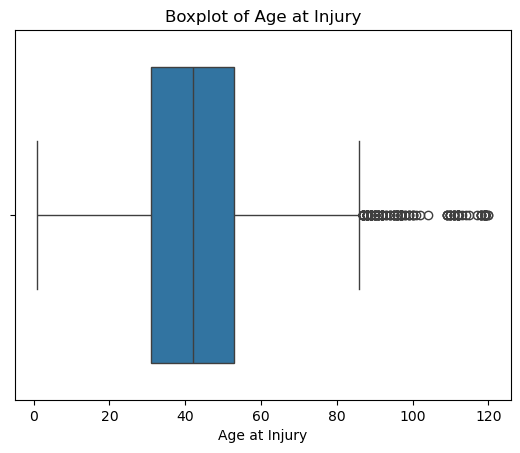

In [105]:
sns.boxplot(x=X_train["Age at Injury"])
plt.title("Boxplot of Age at Injury")
plt.show()

We notice that Age at injury has outliers on the left side of the plot.

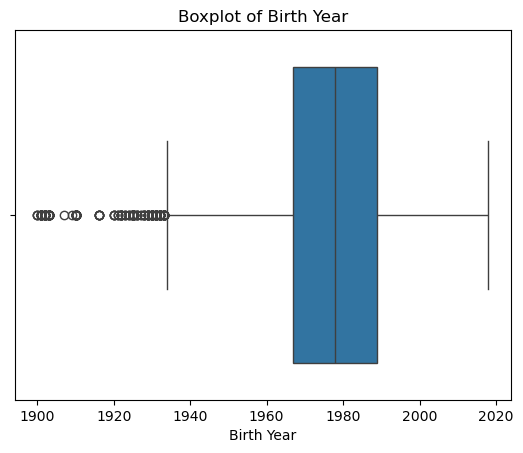

In [106]:
sns.boxplot(x=X_train["Birth Year"])
plt.title("Boxplot of Birth Year")
plt.show()

In correlation with the previous plot, Birth year has outliers in the right side of the plot.

In [107]:
#Function to identify outliers based on IQR
def remove_outliers(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return X[(X >= lower_bound) & (X <= upper_bound)].dropna()

#Remove outliers for the 'Age at Injury' and 'Birth Year' variables using the outlier removal function for each column
X_train['Age at Injury'] = remove_outliers(X_train['Age at Injury'])
X_train['Birth Year'] = remove_outliers(X_train['Birth Year'])

#Check the first few rows after removing outliers
print(X_train[['Age at Injury', 'Birth Year']].head())

        Age at Injury  Birth Year
549647           42.0      1980.0
416922           42.0      1979.0
511292           19.0      2002.0
320321           24.0      1997.0
330477           50.0      1971.0


We decided to remove the outliers from Age at Injury and Birth Year, because the values ​​were absurd and it made no sense to impute these outliers.

In [108]:
#Calculate the necessary statistics using the training data
Q1_train = X_train['Average Weekly Wage'].quantile(0.25)
Q3_train = X_train['Average Weekly Wage'].quantile(0.75)
IQR_train = Q3_train - Q1_train
lower_bound_train = Q1_train - 1.5 * IQR_train
upper_bound_train = Q3_train + 1.5 * IQR_train
median_train = X_train['Average Weekly Wage'].median()  # Median from training data

#Function to replace outliers with a given median
def replace_outliers_with_median_fixed(X, lower_bound, upper_bound, median_value):
    return X.apply(lambda x: median_value if (x < lower_bound) or (x > upper_bound) else x)

#Replace outliers in the training data
X_train['Average Weekly Wage'] = replace_outliers_with_median_fixed(
    X_train['Average Weekly Wage'],
    lower_bound_train,
    upper_bound_train,
    median_train
)

#Replace outliers in the validation data using training data bounds
X_val['Average Weekly Wage'] = replace_outliers_with_median_fixed(
    X_val['Average Weekly Wage'],
    lower_bound_train,
    upper_bound_train,
    median_train
)

#Check the first few rows
print(X_train[['Average Weekly Wage']].head())
print(X_val[['Average Weekly Wage']].head())

        Average Weekly Wage
549647              1289.22
416922                 0.00
511292               380.00
320321                 0.00
330477                 0.00
        Average Weekly Wage
183430                 0.00
48345                  0.00
74286                820.66
78564                  0.00
189231                 0.00


Regarding the Average Weekly Age, we chose to impute with the median because, despite being high, they are possible values.

In [109]:
#Check for numerical missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())  #Count missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum())  #Count missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum())  #Count missing values per column in the test set

Missing values in X_train:
Accident Date                          0
Age at Injury                        272
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
Birth Year                           313
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
Claim Identifier                       0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                     0
Gender                                 0
Industry Code                          0
Industry Code Description              0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Cause of Injury Description       0
WCIO Nature of Injury Code             0
WCIO Nature of Injury Descript

In [110]:
#Imputting missing values in "Age at Injury" and "Birth Year" with our function created above
dynamic_impute_age_birthyear(X_train)

Accident Date  Age at Injury Alternative Dispute Resolution  \
549647    2022-10-02           42.0                              N   
416922    2021-11-17           42.0                              N   
511292    2022-08-02           19.0                              N   
320321    2021-09-07           24.0                              N   
330477    2021-09-27           50.0                              N   
...              ...            ...                            ...   
110268    2020-08-11           51.0                              N   
259178    2021-05-11           45.0                              N   
365838    2021-11-08           66.0                              N   
131932    2018-09-29           55.0                              N   
121958    2020-08-24           34.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
549647    2022-10-13                       Y              1289.22      1980.0   
416922    2022-03-02                       N                 0.00      1979.0   
511292    2022-08-09                       Y               380.00      2002.0   
320321    2021-09-10                       N                 0.00      1997.0   
330477    2021-09-28                       N                 0.00      1971.0   
...              ...                     ...                  ...         ...   
110268    2020-08-13                       N                 0.00      1969.0   
259178    2021-05-24                       N               358.08      1976.0   
365838    2021-11-30                       Y                 0.00      1955.0   
131932    2020-09-23                       Y                 0.00      1963.0   
121958    2020-09-03                       N              1578.59      1986.0   

                                     C-2 Date                        C-3 Date  \
549647                             2022-10-13  Compensation form not received   
416922  Accident/illness report not submitted  Compensation form not received   
511292                             2022-08-08                      2022-08-31   
320321                             2021-09-10  Compensation form not received   
330477                             2021-09-28  Compensation form not received   
...                                       ...                             ...   
110268                             2020-08-13  Compensation form not received   
259178                             2021-05-22  Compensation form not received   
365838                             2021-11-30                      2022-06-22   
131932                             2020-09-25                      2020-09-16   
121958                             2020-09-02  Compensation form not received   

                          Carrier Name Carrier Type Claim Identifier  \
549647  UTICA SPECIALTY RISK INSURANCE  1A. PRIVATE          6107456   
416922            STATE INSURANCE FUND  1A. PRIVATE        207443276   
511292    AMERICAN ZURICH INSURANCE CO  1A. PRIVATE          6057247   
320321      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE          5808258   
330477            STATE INSURANCE FUND      2A. SIF          5821968   
...                                ...          ...              ...   
110268    TRAVELERS CASUALTY INS CO OF  1A. PRIVATE          5536601   
259178       REDWOOD FIRE AND CASUALTY  1A. PRIVATE          5729342   
365838     INDEMNITY INS. OF N AMERICA  1A. PRIVATE          5867607   
131932         EMPLOYERS ASSURANCE CO.  1A. PRIVATE          5563633   
121958      OLD REPUBLIC INSURANCE CO.  1A. PRIVATE          5552082   

       County of Injury COVID-19 Indicator District Name  \
549647           MONROE                  N     ROCHESTER   
416922          SUFFOLK                  N           NYC   
511292         NEW YORK                  N           NYC   
320321      WESTCHESTER                  N           NYC   
330477            BRONX                  N           NY

In [111]:
#Check for numerical missing values in X_train, X_val and X_test
print("Missing values in X_train:")
print(X_train.isnull().sum())  #Count missing values per column in the training set

print("\nMissing values in X_val:")
print(X_val.isnull().sum())  #Count missing values per column in the validation set

print("\nMissing values in X_test:")
print(X_test.isnull().sum())  #Count missing values per column in the test set

Missing values in X_train:
Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               

## 2.5 Feature Engineering

In [112]:
#Convert date columns to datetime and extract meaningful features
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
X_test['Accident Date'] = pd.to_datetime(X_test['Accident Date'], errors='coerce')
X_test['Assembly Date'] = pd.to_datetime(X_test['Assembly Date'], errors='coerce')

#Create new features based on the dates
#df['Accident Year'] = df['Accident Date'].dt.year
#df['Accident Month'] = df['Accident Date'].dt.month
#df['Accident Day'] = df['Accident Date'].dt.day
#df['Days Since Accident'] = (pd.Timestamp('now') - df['Accident Date']).dt.days
X_train['Days Between Accident and Assembly Date'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
X_val['Days Between Accident and Assembly Date'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
X_test['Days Between Accident and Assembly Date'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days

In [113]:
#Function to calculate claim complexity, based on the variables "Attorney/Representative", "Filling_delay" and "Agreement Reached"
def assign_claim_complexity(df):
    complexity = "Low"

    if df['Attorney/Representative'] == "Y":
        complexity = "Medium"

    delay = (df['Assembly Date'] - df['Accident Date']).days
    if delay >= 30:
        if complexity == "Medium":
            complexity = "High"
        else:
            complexity = "Medium"

    elif delay < 30 and delay > 7:
        if complexity == "Low":
            complexity = "Medium"
        else:
            complexity = "Medium"
            
    else:
        if complexity== "Medium":
            complexity = "Medium"
        else:
            complexity = "Low"
    
    return complexity

#Apply the function to the DataFrame
X_train['Claim Complexity'] = X_train.apply(assign_claim_complexity, axis=1)
X_val['Claim Complexity'] = X_val.apply(assign_claim_complexity, axis=1)
X_test['Claim Complexity'] = X_test.apply(assign_claim_complexity, axis=1)

#View the resulting DataFrame
display(X_train[['Attorney/Representative', 'Days Between Accident and Assembly Date', 'Claim Complexity']])
display(X_val[['Attorney/Representative', 'Days Between Accident and Assembly Date', 'Claim Complexity']])
display(X_test[['Attorney/Representative', 'Accident Date', 'C-2 Date', 'Claim Complexity']])

Attorney/Representative  Days Between Accident and Assembly Date  \
549647                       Y                                       11   
416922                       N                                      105   
511292                       Y                                        7   
320321                       N                                        3   
330477                       N                                        1   
...                        ...                                      ...   
110268                       N                                        2   
259178                       N                                       13   
365838                       Y                                       22   
131932                       Y                                      725   
121958                       N                                       10   

       Claim Complexity  
549647           Medium  
416922           Medium  
511292           Medium  
320321              Low  
330477              Low  
...                 ...  
110268              Low  
259178           Medium  
365838           Medium  
131932             High  
121958           Medium  

[474776 rows x 3 columns]

Attorney/Representative  Days Between Accident and Assembly Date  \
183430                       N                                       29   
48345                        N                                       46   
74286                        N                                       13   
78564                        N                                       95   
189231                       Y                                      126   
...                        ...                                      ...   
358157                       N                                       17   
112493                       N                                      132   
514775                       N                                        5   
266379                       N                                       19   
441888                       Y                                       49   

       Claim Complexity  
183430           Medium  
48345            Medium  
74286            Medium  
78564            Medium  
189231             High  
...                 ...  
358157           Medium  
112493           Medium  
514775              Low  
266379           Medium  
441888             High  

[118694 rows x 3 columns]

Attorney/Representative Accident Date  \
0                            N    2022-12-24   
1                            N    2022-11-20   
2                            N    2022-12-26   
3                            N    2022-12-28   
4                            N    2022-12-20   
...                        ...           ...   
387970                       N    2012-09-12   
387971                       Y    2024-05-22   
387972                       Y    2024-05-06   
387973                       Y    2024-02-24   
387974                       Y    2023-10-02   

                                     C-2 Date Claim Complexity  
0                                  2023-01-02           Medium  
1                                  2023-01-02           Medium  
2                                  2022-12-31              Low  
3                                  2023-01-02              Low  
4                                  2022-12-31           Medium  
...                                       ...              ...  
387970                             2012-10-23           Medium  
387971  Accident/illness report not submitted           Medium  
387972  Accident/illness report not submitted             High  
387973  Accident/illness report not submitted             High  
387974  Accident/illness report not submitted             High  

[387975 rows x 4 columns]

In [114]:
#Function to assess if both C-2 and C-3 forms were received
def forms(df):
    if df["C-2 Date"] != "Accident/illness report not submitted" and df["C-3 Date"] !="Compensation form not received":
        return 2
    elif df["C-2 Date"] != "Accident/illness report not submitted" or df["C-3 Date"] !="Compensation form not received":
        return 1
    else:
        return 0

X_train['Forms Filed Indicator'] = X_train.apply(forms, axis=1)
X_val['Forms Filed Indicator'] = X_val.apply(forms, axis=1)
X_test['Forms Filed Indicator'] = X_test.apply(forms, axis=1)

#Check the distribution of the new variable
display(X_train[["C-2 Date","C-3 Date",'Forms Filed Indicator']])
display(X_val[["C-2 Date","C-3 Date",'Forms Filed Indicator']])
display(X_test[["C-2 Date","C-3 Date",'Forms Filed Indicator']])

C-2 Date                        C-3 Date  \
549647                             2022-10-13  Compensation form not received   
416922  Accident/illness report not submitted  Compensation form not received   
511292                             2022-08-08                      2022-08-31   
320321                             2021-09-10  Compensation form not received   
330477                             2021-09-28  Compensation form not received   
...                                       ...                             ...   
110268                             2020-08-13  Compensation form not received   
259178                             2021-05-22  Compensation form not received   
365838                             2021-11-30                      2022-06-22   
131932                             2020-09-25                      2020-09-16   
121958                             2020-09-02  Compensation form not received   

        Forms Filed Indicator  
549647                      1  
416922                      0  
511292                      2  
320321                      1  
330477                      1  
...                       ...  
110268                      1  
259178                      1  
365838                      2  
131932                      2  
121958                      1  

[474776 rows x 3 columns]

C-2 Date                        C-3 Date  Forms Filed Indicator
183430  2021-01-07  Compensation form not received                      1
48345   2020-03-22  Compensation form not received                      1
74286   2020-06-01  Compensation form not received                      1
78564   2020-06-09  Compensation form not received                      1
189231  2021-01-22                      2021-01-07                      2
...            ...                             ...                    ...
358157  2021-11-15  Compensation form not received                      1
112493  2020-08-17  Compensation form not received                      1
514775  2022-08-15  Compensation form not received                      1
266379  2021-06-05  Compensation form not received                      1
441888  2022-04-13                      2022-05-10                      2

[118694 rows x 3 columns]

C-2 Date                        C-3 Date  \
0                                  2023-01-02  Compensation form not received   
1                                  2023-01-02  Compensation form not received   
2                                  2022-12-31  Compensation form not received   
3                                  2023-01-02  Compensation form not received   
4                                  2022-12-31  Compensation form not received   
...                                       ...                             ...   
387970                             2012-10-23  Compensation form not received   
387971  Accident/illness report not submitted                      2024-05-28   
387972  Accident/illness report not submitted  Compensation form not received   
387973  Accident/illness report not submitted                      2024-05-21   
387974  Accident/illness report not submitted                      2024-05-28   

        Forms Filed Indicator  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
387970                      1  
387971                      1  
387972                      0  
387973                      1  
387974                      1  

[387975 rows x 3 columns]

In [115]:
#Normalizing WCIO Nature of Injury Description column
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].str.strip().str.upper()
X_val['WCIO Nature of Injury Description'] = X_val['WCIO Nature of Injury Description'].str.strip().str.upper()
X_test['WCIO Nature of Injury Description'] = X_test['WCIO Nature of Injury Description'].str.strip().str.upper()

#Creating a severity map to be able to categorize the Nature of the Injury in different severity levels "Low", "Medium" or "High"
severity_map = {
    #High severity
    "AMPUTATION": "High",
    "CONCUSSION": "High",
    "FRACTURE": "High",
    "SEVERANCE": "High",
    "CRUSHING": "High",
    "MULTIPLE PHYSICAL INJURIES ONLY": "High",
    "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL": "High",
    "MYOCARDIAL INFARCTION": "High",
    "CANCER": "High",
    "RADIATION": "High",
    "ASPHYXIATION": "High",
    "BLACK LUNG": "High",
    "ASBESTOSIS": "High",
    "SILICOSIS": "High",
    "HEPATITIS C": "High",
    "AIDS": "High",
    "ENUCLEATION": "High",
    "BYSSINOSIS": "High",

    #Medium severity
    "ELECTRIC SHOCK": "Medium",
    "POISONING - METAL": "Medium",
    "BURN": "Medium",
    "DISLOCATION": "Medium",
    "MENTAL STRESS": "Medium",
    "MENTAL DISORDER": "Medium",
    "CARPAL TUNNEL SYNDROME": "Medium",
    "DERMATITIS": "Medium",
    "INFECTION": "Medium",
    "POISONING - CHEMICAL, (OTHER THAN METALS)": "Medium",
    "POISONING - GENERAL (NOT OD OR CUMULATIVE": "Medium",
    "LOSS OF HEARING": "Medium",
    "VISION LOSS": "Medium",
    "HEARING LOSS OR IMPAIRMENT": "Medium",
    "RESPIRATORY DISORDERS": "Medium",
    "ADVERSE REACTION TO A VACCINATION OR INOCULATION": "Medium",
    "ANGINA PECTORIS": "Medium",
    "DUST DISEASE, NOC": "Medium",
    "HEAT PROSTRATION": "Medium",
    "FREEZING": "Medium",
    "INFLAMMATION": "Medium",
    "COVID-19": "Medium",
    "ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC": "Medium",
    "ALL OTHER CUMULATIVE INJURY, NOC": "Medium",

    #Low severity
    "CONTUSION": "Low",
    "SPRAIN OR TEAR": "Low",
    "STRAIN OR TEAR": "Low",
    "LACERATION": "Low",
    "PUNCTURE": "Low",
    "HERNIA": "Low",
    "SYNCOPE": "Low",
    "VASCULAR": "Low",
    "CONTAGIOUS DISEASE": "Low",
    "NO PHYSICAL INJURY": "Low",
    "FOREIGN BODY": "Low",
    "RUPTURE": "Low",
    "ALL OTHER SPECIFIC INJURIES, NOC": "Low",
    "VDT - RELATED DISEASES": "Low"}

#Creating the new variable "Injury Severity" based on the variable "WCIO Nature of Injury Description"
X_train["Injury Severity"] = X_train["WCIO Nature of Injury Description"].map(severity_map)
X_val['Injury Severity'] = X_val['WCIO Nature of Injury Description'].map(severity_map)
X_test['Injury Severity'] = X_test['WCIO Nature of Injury Description'].map(severity_map)

display(X_train[["Injury Severity","WCIO Nature of Injury Description"]])
display(X_val[["Injury Severity","WCIO Nature of Injury Description"]])
display(X_test[["Injury Severity","WCIO Nature of Injury Description"]])

Injury Severity WCIO Nature of Injury Description
549647             Low                    SPRAIN OR TEAR
416922             Low                    STRAIN OR TEAR
511292             Low                    STRAIN OR TEAR
320321             Low                    STRAIN OR TEAR
330477             Low                         CONTUSION
...                ...                               ...
110268             Low                        LACERATION
259178             Low                    STRAIN OR TEAR
365838             Low                    SPRAIN OR TEAR
131932          Medium                   LOSS OF HEARING
121958            High                          FRACTURE

[474776 rows x 2 columns]

Injury Severity WCIO Nature of Injury Description
183430          Medium                          COVID-19
48345              Low                    STRAIN OR TEAR
74286              Low                         CONTUSION
78564              Low                        LACERATION
189231          Medium        HEARING LOSS OR IMPAIRMENT
...                ...                               ...
358157             Low                    STRAIN OR TEAR
112493          Medium                          COVID-19
514775             Low                        LACERATION
266379            High                          FRACTURE
441888          Medium            CARPAL TUNNEL SYNDROME

[118694 rows x 2 columns]

Injury Severity WCIO Nature of Injury Description
0                  Low                         CONTUSION
1                  Low                         CONTUSION
2                  Low                    SPRAIN OR TEAR
3                  Low                         CONTUSION
4                  Low                        LACERATION
...                ...                               ...
387970             Low                    STRAIN OR TEAR
387971             Low                    STRAIN OR TEAR
387972             Low                    STRAIN OR TEAR
387973             Low                    STRAIN OR TEAR
387974             Low                    STRAIN OR TEAR

[387975 rows x 2 columns]

In [116]:
industry_claim_counts_train = X_train.groupby("Industry Code")["Claim Identifier"].count().sort_values(ascending=False)
industry_claim_counts_val = X_val.groupby("Industry Code")["Claim Identifier"].count().sort_values(ascending=False)
industry_claim_counts_test = X_test.groupby("Industry Code")["Claim Identifier"].count().sort_values(ascending=False)
#print(industry_claim_counts, "\n")

#Create a new column for likelihood based on the industry claim count
def likelihood_by_industry_train(industry_code):
    if industry_code in industry_claim_counts_train.head().index:
        return "Very likely to have an injury"
    elif industry_code in industry_claim_counts_train.tail().index:
        return "Few likely to have an injury"
    else:
        return "Likely to have an injury"

X_train["Likelihood by Industry"] = X_train["Industry Code"].apply(likelihood_by_industry_train)

def likelihood_by_industry_val(industry_code):
    if industry_code in industry_claim_counts_val.head().index:
        return "Very likely to have an injury"
    elif industry_code in industry_claim_counts_val.tail().index:
        return "Few likely to have an injury"
    else:
        return "Likely to have an injury"
        
X_val["Likelihood by Industry"] = X_val["Industry Code"].apply(likelihood_by_industry_val)

def likelihood_by_industry_test(industry_code):
    if industry_code in industry_claim_counts_test.head().index:
        return "Very likely to have an injury"
    elif industry_code in industry_claim_counts_test.tail().index:
        return "Few likely to have an injury"
    else:
        return "Likely to have an injury"
        
X_test["Likelihood by Industry"] = X_test["Industry Code"].apply(likelihood_by_industry_test)


display(X_train[["Industry Code", "Likelihood by Industry"]])
display(X_val[["Industry Code", "Likelihood by Industry"]])
display(X_test[["Industry Code", "Likelihood by Industry"]])

Industry Code         Likelihood by Industry
549647          44.0  Very likely to have an injury
416922          62.0  Very likely to have an injury
511292          44.0  Very likely to have an injury
320321          31.0       Likely to have an injury
330477          62.0  Very likely to have an injury
...              ...                            ...
110268          33.0       Likely to have an injury
259178          62.0  Very likely to have an injury
365838          81.0       Likely to have an injury
131932          11.0   Few likely to have an injury
121958          23.0       Likely to have an injury

[474776 rows x 2 columns]

Industry Code         Likelihood by Industry
183430          62.0  Very likely to have an injury
48345           48.0  Very likely to have an injury
74286           62.0  Very likely to have an injury
78564           44.0  Very likely to have an injury
189231          51.0       Likely to have an injury
...              ...                            ...
358157          92.0  Very likely to have an injury
112493          62.0  Very likely to have an injury
514775          72.0       Likely to have an injury
266379          23.0       Likely to have an injury
441888          61.0  Very likely to have an injury

[118694 rows x 2 columns]

Industry Code         Likelihood by Industry
0               48.0  Very likely to have an injury
1               45.0       Likely to have an injury
2               56.0       Likely to have an injury
3               48.0  Very likely to have an injury
4               55.0   Few likely to have an injury
...              ...                            ...
387970          62.0  Very likely to have an injury
387971          62.0  Very likely to have an injury
387972          62.0  Very likely to have an injury
387973          62.0  Very likely to have an injury
387974          62.0  Very likely to have an injury

[387975 rows x 2 columns]

In [117]:
#Checking missing values of new variables in X_train
print(X_train['Days Between Accident and Assembly Date'].isna().sum())
print(X_train['Claim Complexity'].isna().sum())
print(X_train['Forms Filed Indicator'].isna().sum())
print(X_train['Injury Severity'].isna().sum())
print(X_train['Likelihood by Industry'].isna().sum())

#Checking missing values of new variables in X_val
print(X_val['Days Between Accident and Assembly Date'].isna().sum())
print(X_val['Claim Complexity'].isna().sum())
print(X_val['Forms Filed Indicator'].isna().sum())
print(X_val['Injury Severity'].isna().sum())
print(X_val['Likelihood by Industry'].isna().sum())

#Checking missing values of new variables in X_test
print(X_test['Days Between Accident and Assembly Date'].isna().sum())
print(X_test['Claim Complexity'].isna().sum())
print(X_test['Forms Filed Indicator'].isna().sum())
print(X_test['Injury Severity'].isna().sum())
print(X_test['Likelihood by Industry'].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## 2.6 Scalling and Encoding variables

In [118]:
#These variables where changed to datatime in feature engineering and now they are going to be changed to object type 
#in order to be treated as categorical features
X_train['Accident Date'] = X_train['Accident Date'].dt.strftime('%Y-%m-%d')
X_val['Accident Date'] = X_val['Accident Date'].dt.strftime('%Y-%m-%d')
X_test['Accident Date'] = X_test['Accident Date'].dt.strftime('%Y-%m-%d')

X_train['Assembly Date'] = X_train['Assembly Date'].dt.strftime('%Y-%m-%d')
X_val['Assembly Date'] = X_val['Assembly Date'].dt.strftime('%Y-%m-%d')
X_test['Assembly Date'] = X_test['Assembly Date'].dt.strftime('%Y-%m-%d')

In [119]:
#Initialize scaler
scaler = MinMaxScaler()

#We decided to use MinMaxScaler(), because since we already handled outliers we don't see a need to be using RobustScaler(),
#and StandardScaler() is supposed to be used when features are normally distributed. Given that this is not the case in our
#features we are going to use MinMaxScaler()

X_train_num_scaled= scaler.fit_transform(X_train.select_dtypes(include=np.number))

print(X_train_num_scaled)

[[0.47126437 0.67623409 0.6779661  0.66666667 0.05028723 0.5       ]
 [0.47126437 0.         0.66949153 0.5        0.05444101 0.        ]
 [0.20689655 0.19932126 0.86440678 0.33333333 0.05011047 1.        ]
 ...
 [0.74712644 0.         0.46610169 0.66666667 0.05077331 1.        ]
 [0.62068966 0.         0.53389831 0.         0.08183827 1.        ]
 [0.37931034 0.82801723 0.72881356 0.66666667 0.05024304 0.5       ]]


In [120]:
#Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train.select_dtypes(include=np.number).columns).set_index(X_train.index)
X_train_num_scaled

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
549647       0.471264             0.676234    0.677966              0.666667   
416922       0.471264             0.000000    0.669492              0.500000   
511292       0.206897             0.199321    0.864407              0.333333   
320321       0.264368             0.000000    0.822034              0.500000   
330477       0.563218             0.000000    0.601695              0.166667   
...               ...                  ...         ...                   ...   
110268       0.574713             0.000000    0.584746              0.500000   
259178       0.505747             0.187824    0.644068              0.000000   
365838       0.747126             0.000000    0.466102              0.666667   
131932       0.620690             0.000000    0.533898              0.000000   
121958       0.379310             0.828017    0.728814              0.666667   

        Days Between Accident and Assembly Date  Forms Filed Indicator  
549647                                 0.050287                    0.5  
416922                                 0.054441                    0.0  
511292                                 0.050110                    1.0  
320321                                 0.049934                    0.5  
330477                                 0.049845                    0.5  
...                                         ...                    ...  
110268                                 0.049890                    0.5  
259178                                 0.050376                    0.5  
365838                                 0.050773                    1.0  
131932                                 0.081838                    1.0  
121958                                 0.050243                    0.5  

[474776 rows x 6 columns]

In [121]:
#In the validation data we only transform the data to not inccur in data leakage
X_val_num_scaled = scaler.transform(X_val.select_dtypes(include=np.number))
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val.select_dtypes(include=np.number).columns).set_index(X_val.index)
X_val_num_scaled

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
183430       0.620690             0.000000    0.550847              0.333333   
48345        0.287356             0.000000    0.788136              0.500000   
74286        0.620690             0.430460    0.542373              0.333333   
78564        0.482759             0.000000    0.644068              0.166667   
189231       0.632184             0.000000    0.542373              0.500000   
...               ...                  ...         ...                   ...   
358157       0.574713             0.790865    0.593220              0.500000   
112493       0.632184             0.000000    0.533898              0.333333   
514775       0.206897             0.174233    0.864407              0.333333   
266379       0.264368             0.000000    0.822034              0.333333   
441888       0.666667             0.317052    0.525424              0.500000   

        Days Between Accident and Assembly Date  Forms Filed Indicator  
183430                                 0.051083                    0.5  
48345                                  0.051834                    0.5  
74286                                  0.050376                    0.5  
78564                                  0.053999                    0.5  
189231                                 0.055369                    1.0  
...                                         ...                    ...  
358157                                 0.050552                    0.5  
112493                                 0.055634                    0.5  
514775                                 0.050022                    0.5  
266379                                 0.050641                    0.5  
441888                                 0.051966                    1.0  

[118694 rows x 6 columns]

In [122]:
#In the test data we only transform the data to not inccur in data leakage just like in the validation data
X_test_num_scaled = scaler.transform(X_test.select_dtypes(include=np.number))
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test.select_dtypes(include=np.number).columns).set_index(X_test.index)
X_test_num_scaled

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
0            0.206897                  0.0    0.872881              0.166667   
1            0.206897                  0.0    0.872881              0.166667   
2            0.666667                  0.0    0.533898              0.000000   
3            0.620690                  0.0    0.567797              1.000000   
4            0.275862                  0.0    0.822034              0.833333   
...               ...                  ...         ...                   ...   
387970       0.586207                  0.0    0.508475              0.833333   
387971       0.666667                  0.0    0.550847              0.166667   
387972       0.505747                  0.0    0.669492              0.833333   
387973       0.471264                  0.0    0.686441              0.833333   
387974       0.471264                  0.0    0.686441              0.833333   

        Days Between Accident and Assembly Date  Forms Filed Indicator  
0                                      0.050199                    0.5  
1                                      0.051701                    0.5  
2                                      0.050110                    0.5  
3                                      0.050022                    0.5  
4                                      0.050376                    0.5  
...                                         ...                    ...  
387970                                 0.239107                    0.5  
387971                                 0.050420                    0.5  
387972                                 0.051127                    0.0  
387973                                 0.054308                    0.5  
387974                                 0.060716                    0.5  

[387975 rows x 6 columns]

In [123]:
#Lets encode the target variable
target_encoder=LabelEncoder()

#Fitting the model to the training target
y_train_encoded=target_encoder.fit_transform(y_train)

#Transforming the validation target
y_val_encoded=target_encoder.transform(y_val)

In [124]:
target_encoder.classes_

array(['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
       '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH', nan],
      dtype=object)

In [125]:
print(y_train,"\n")
print(y_val, "\n")

display(y_train_encoded,y_val_encoded)

549647         6. PPD NSL
416922                NaN
511292       4. TEMPORARY
320321        2. NON-COMP
330477        2. NON-COMP
               ...       
110268        2. NON-COMP
259178       4. TEMPORARY
365838        3. MED ONLY
131932    5. PPD SCH LOSS
121958       4. TEMPORARY
Name: Claim Injury Type, Length: 474776, dtype: object 

183430     2. NON-COMP
48345      2. NON-COMP
74286      3. MED ONLY
78564      2. NON-COMP
189231     2. NON-COMP
              ...     
358157    4. TEMPORARY
112493     2. NON-COMP
514775    4. TEMPORARY
266379     2. NON-COMP
441888     3. MED ONLY
Name: Claim Injury Type, Length: 118694, dtype: object 



array([5, 8, 3, ..., 2, 4, 3])

array([1, 1, 2, ..., 3, 1, 2])

In [126]:
features_encoder = ce.CountEncoder(normalize=True)

X_train_cat_encoded = features_encoder.fit_transform(X_train.select_dtypes(exclude=np.number))

display(X_train_cat_encoded)

Accident Date  Alternative Dispute Resolution  Assembly Date  \
549647       0.000398                          0.9956       0.001531   
416922       0.001125                          0.9956       0.001514   
511292       0.001186                          0.9956       0.001363   
320321       0.001154                          0.9956       0.001194   
330477       0.001253                          0.9956       0.001525   
...               ...                             ...            ...   
110268       0.001131                          0.9956       0.001036   
259178       0.001062                          0.9956       0.001422   
365838       0.001175                          0.9956       0.001415   
131932       0.000006                          0.9956       0.001165   
121958       0.000975                          0.9956       0.001205   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
549647                 0.306458  0.001396  0.684074      0.001268   
416922                 0.693542  0.057347  0.684074      0.219299   
511292                 0.306458  0.001331  0.000423      0.029658   
320321                 0.693542  0.001158  0.684074      0.012084   
330477                 0.693542  0.001487  0.684074      0.219299   
...                         ...       ...       ...           ...   
110268                 0.693542  0.001460  0.684074      0.001729   
259178                 0.693542  0.000166  0.684074      0.001622   
365838                 0.306458  0.001278  0.000524      0.024115   
131932                 0.306458  0.001253  0.000421      0.001856   
121958                 0.693542  0.001186  0.684074      0.012084   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
549647      0.513865          0.000002          0.040554            0.953504   
416922      0.513865          0.000002          0.134552            0.953504   
511292      0.513865          0.000002          0.050580            0.953504   
320321      0.513865          0.000002          0.043448            0.953504   
330477      0.186608          0.000002          0.066688            0.953504   
...              ...               ...               ...                 ...   
110268      0.513865          0.000002          0.004592            0.953504   
259178      0.513865          0.000002          0.134552            0.953504   
365838      0.513865          0.000002          0.005971            0.953504   
131932      0.513865          0.000002          0.073829            0.953504   
121958      0.513865          0.000002          0.134552            0.953504   

        District Name  First Hearing Date    Gender  Industry Code  \
549647       0.068091            0.000183  0.597808       0.073803   
416922       0.489182            0.745642  0.597808       0.241893   
511292       0.489182            0.000373  0.394150       0.073803   
320321       0.489182            0.745642  0.394150       0.016964   
330477       0.489182            0.745642  0.597808       0.241893   
...               ...                 ...       ...            ...   
110268       0.068091            0.745642  0.597808       0.028879   
259178       0.102057            0.745642  0.394150       0.241893   
365838       0.144689            0.000291  0.597808       0.022124   
131932       0.489182            0.000293  0.597808       0.004040   
121958       0.102057            0.745642  0.597808       0.052041   

        Industry Code Description  Medical Fee Region  \
549647                   0.104005            0.143013   
416922                   0.241893            0.481358   
511292                   0.104005            0.481358   
320321                   0.063973            0.481358   
330477                   0.241893            0.056467   
...                           ...                 ...   
110268                   0.063973            0.228984   
259178                   0.241893            0.090179   

In [127]:
X_val_cat_encoded = features_encoder.transform(X_val.select_dtypes(exclude=np.number))

display(X_val_cat_encoded)

Accident Date  Alternative Dispute Resolution  Assembly Date  \
183430       0.000994                          0.9956       0.001386   
48345        0.001462                          0.9956       0.001116   
74286        0.000636                          0.9956       0.000731   
78564        0.001072                          0.9956       0.000954   
189231       0.000986                          0.9956       0.001125   
...               ...                             ...            ...   
358157       0.001087                          0.9956       0.001373   
112493       0.000781                          0.9956       0.001346   
514775       0.001249                          0.9956       0.002035   
266379       0.001137                          0.9956       0.001340   
441888       0.000984                          0.9956       0.001447   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
183430                 0.693542  0.001228  0.684074      0.020254   
48345                  0.693542  0.000097  0.684074      0.021688   
74286                  0.693542  0.000773  0.684074      0.219299   
78564                  0.693542  0.000838  0.684074      0.000265   
189231                 0.306458  0.001525  0.000400      0.219299   
...                         ...       ...       ...           ...   
358157                 0.693542  0.001123  0.684074      0.219299   
112493                 0.693542  0.000977  0.684074      0.001915   
514775                 0.693542  0.001986  0.684074      0.023443   
266379                 0.693542  0.000198  0.684074      0.012084   
441888                 0.306458  0.001413  0.000455      0.001047   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
183430      0.513865               0.0          0.023697            0.046496   
48345       0.513865               0.0          0.026073            0.953504   
74286       0.186608               0.0          0.098080            0.953504   
78564       0.513865               0.0          0.043448            0.953504   
189231      0.186608               0.0          0.134552            0.953504   
...              ...               ...               ...                 ...   
358157      0.186608               0.0          0.052279            0.953504   
112493      0.088886               0.0          0.015251            0.046496   
514775      0.513865               0.0          0.043448            0.953504   
266379      0.513865               0.0          0.007319            0.953504   
441888      0.088886               0.0          0.019291            0.953504   

        District Name  First Hearing Date    Gender  Industry Code  \
183430       0.489182            0.745642  0.394150       0.241893   
48345        0.075172            0.745642  0.597808       0.062891   
74286        0.489182            0.745642  0.394150       0.241893   
78564        0.489182            0.745642  0.394150       0.073803   
189231       0.102057            0.745642  0.597808       0.015515   
...               ...                 ...       ...            ...   
358157       0.077066            0.000343  0.597808       0.155711   
112493       0.489182            0.745642  0.597808       0.241893   
514775       0.489182            0.745642  0.597808       0.044623   
266379       0.075172            0.745642  0.597808       0.052041   
441888       0.144689            0.000267  0.394150       0.074871   

        Industry Code Description  Medical Fee Region  \
183430                   0.241893            0.481358   
48345                    0.090988            0.228984   
74286                    0.241893            0.481358   
78564                    0.104005            0.090179   
189231                   0.015515            0.481358   
...                           ...                 ...   
358157                   0.155711            0.143013   
112493                   0.241893            0.090179   

In [128]:
X_test_cat_encoded = features_encoder.transform(X_test.select_dtypes(exclude=np.number))

display(X_test_cat_encoded)

Accident Date  Alternative Dispute Resolution  Assembly Date  \
0            0.000107                          0.9956            0.0   
1            0.000377                          0.9956            0.0   
2            0.000143                          0.9956            0.0   
3            0.000110                          0.9956            0.0   
4            0.000571                          0.9956            0.0   
...               ...                             ...            ...   
387970       0.000004                          0.9956            0.0   
387971       0.000000                          0.9956            0.0   
387972       0.000000                          0.9956            0.0   
387973       0.000000                          0.9956            0.0   
387974       0.000000                          0.9956            0.0   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
0                      0.693542  0.000002  0.684074      0.015481   
1                      0.693542  0.000002  0.684074      0.021688   
2                      0.693542  0.000034  0.684074      0.000000   
3                      0.693542  0.000002  0.684074      0.024115   
4                      0.693542  0.000034  0.684074      0.021574   
...                         ...       ...       ...           ...   
387970                 0.693542  0.000004  0.684074      0.219299   
387971                 0.306458  0.057347  0.000015      0.013870   
387972                 0.306458  0.057347  0.684074      0.219299   
387973                 0.306458  0.057347  0.000008      0.012492   
387974                 0.306458  0.057347  0.000015      0.010851   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
0           0.513865               0.0          0.066688            0.953504   
1           0.513865               0.0          0.098080            0.953504   
2           0.513865               0.0          0.043448            0.953504   
3           0.513865               0.0          0.098080            0.953504   
4           0.513865               0.0          0.089918            0.953504   
...              ...               ...               ...                 ...   
387970      0.186608               0.0          0.005375            0.953504   
387971      0.205863               0.0          0.134552            0.953504   
387972      0.186608               0.0          0.098080            0.953504   
387973      0.088886               0.0          0.098080            0.953504   
387974      0.205863               0.0          0.023697            0.953504   

        District Name  First Hearing Date    Gender  Industry Code  \
0            0.489182            0.745642  0.597808       0.062891   
1            0.489182            0.745642  0.394150       0.030202   
2            0.489182            0.745642  0.394150       0.035453   
3            0.489182            0.745642  0.394150       0.062891   
4            0.489182            0.745642  0.597808       0.000632   
...               ...                 ...       ...            ...   
387970       0.075172            0.745642  0.597808       0.241893   
387971       0.102057            0.745642  0.394150       0.241893   
387972       0.489182            0.745642  0.597808       0.241893   
387973       0.489182            0.745642  0.597808       0.241893   
387974       0.489182            0.745642  0.597808       0.241893   

        Industry Code Description  Medical Fee Region  \
0                        0.090988            0.481358   
1                        0.104005            0.481358   
2                        0.035453            0.090179   
3                        0.090988            0.481358   
4                        0.000632            0.481358   
...                           ...                 ...   
387970                   0.241893            0.228984   
387971                   0.241893            0.481358   

In this section we did the following:

- Data was scaled usind `MinMaxScaler()`;
- We also performed Label Encoding on the target variable;
- Encoding of the features was also performed using Frequency Encoding with the use of `category_encoders` a python library.

As referred we performed encoding to the categorical features, using frequency encoding. We believe this method is better than label encoding, because it reflects the distribution of categories, helping models interpret categorical features without introducing misleading ordinal relationships.

# 3 Feature Selection

In [129]:
print(X_train.info(),"\n", X_val.info())

<class 'pandas.core.frame.DataFrame'>
Index: 474776 entries, 549647 to 121958
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Accident Date                            474776 non-null  object 
 1   Age at Injury                            474776 non-null  float64
 2   Alternative Dispute Resolution           474776 non-null  object 
 3   Assembly Date                            474776 non-null  object 
 4   Attorney/Representative                  474776 non-null  object 
 5   Average Weekly Wage                      474776 non-null  float64
 6   Birth Year                               474776 non-null  float64
 7   C-2 Date                                 474776 non-null  object 
 8   C-3 Date                                 474776 non-null  object 
 9   Carrier Name                             474776 non-null  object 
 10  Carrier Type                    

In [130]:
print(X_train.isna().sum())
print(X_val.isna().sum())

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                                 0
C-2 Date                                   0
C-3 Date                                   0
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                         0
Gender                                     0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
WCIO Cause of Injury Code                  0
WCIO Cause of Injury Description           0
WCIO Natur

## 3.1 Filter Methods

### 3.1.1 Univariate variables

In [131]:
#Checking if there are any variables with zero variance
X_train_num_scaled.var()

Age at Injury                              0.023786
Average Weekly Wage                        0.073207
Birth Year                                 0.013140
Number of Dependents                       0.107516
Days Between Accident and Assembly Date    0.000693
Forms Filed Indicator                      0.069658
dtype: float64

There is no univariate variables, meaning that we will keep all variables for now.

### 3.1.2 Correlation Matrix

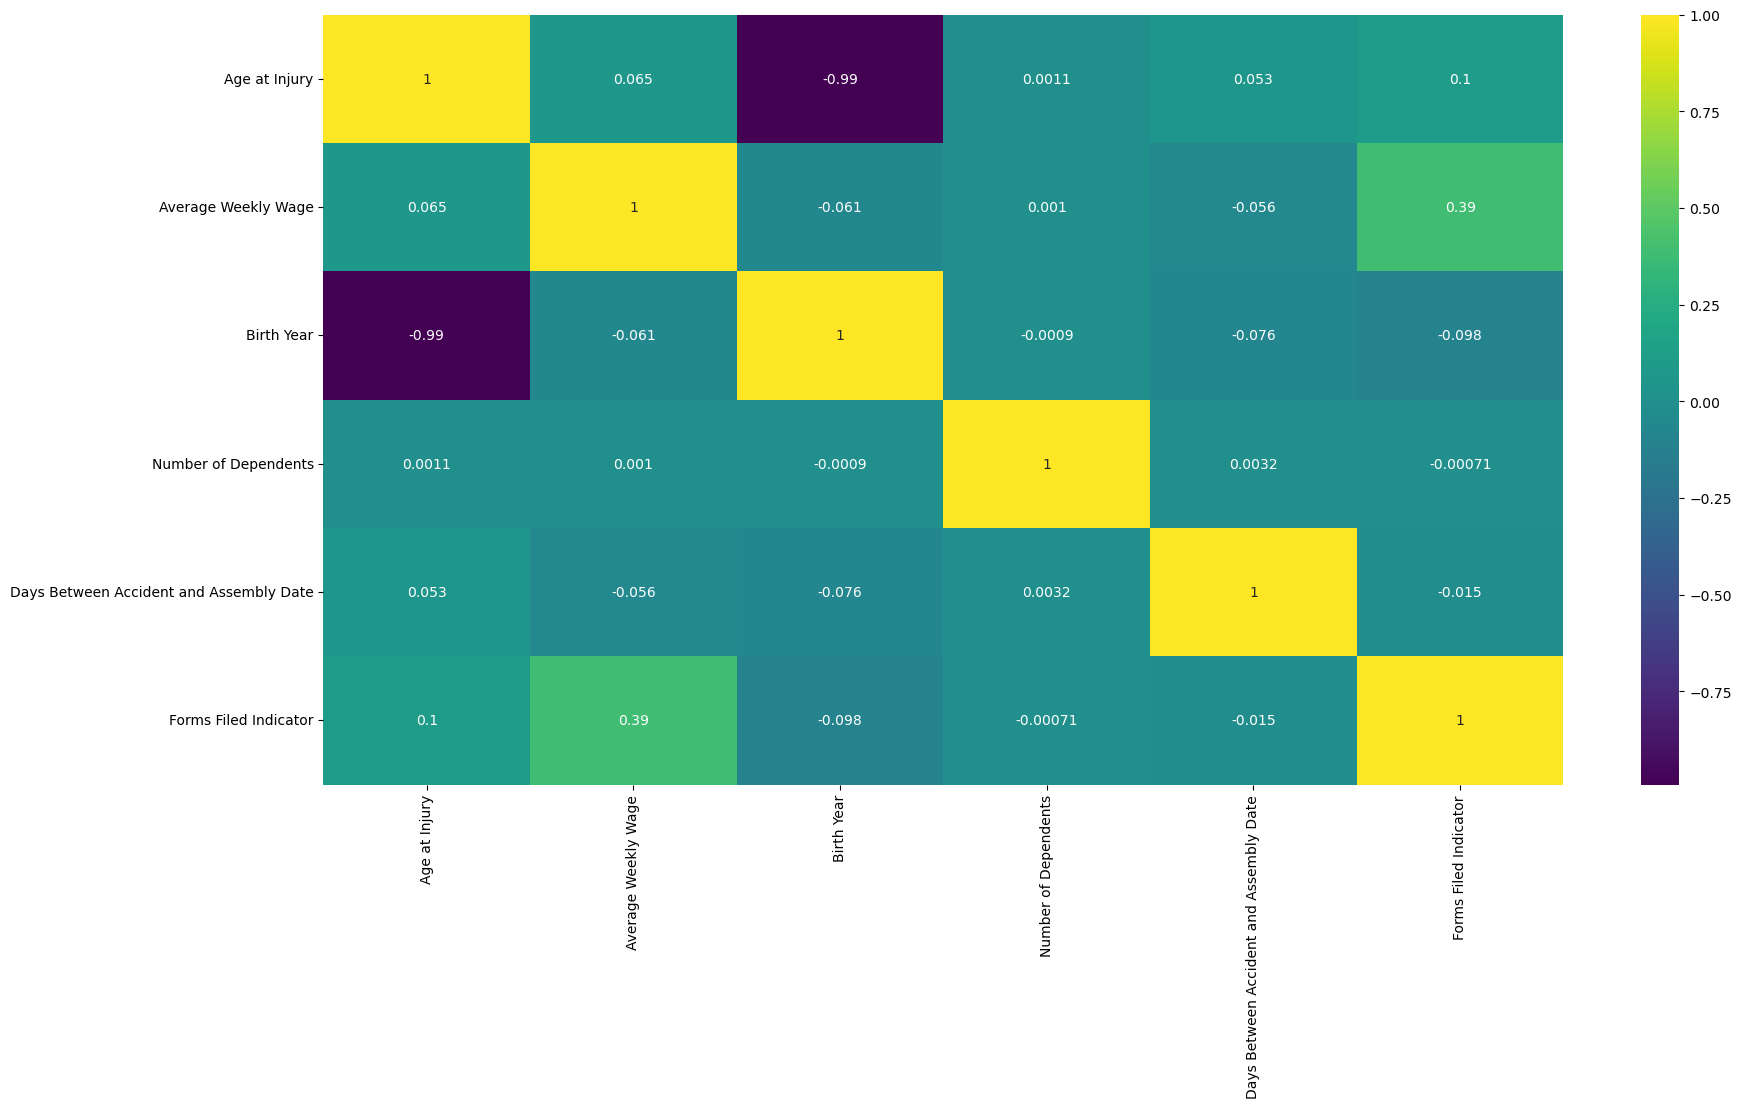

In [132]:
corr= X_train_num_scaled.corr(method="spearman")
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

- We conclude that the correlation matrix itself is not enough to perform feature selection, as expected.
- There are variables highly correlated:
  - `Age at Injury` vs `Birth Year`.

`Average Weekly Wage` and `Forms Filed Indicator` are two other variables that seem to have a mild correlation between them.

From both variables we see that they are almost not correlated with the remaining numerical features but for the future if we need to remove one it is an arbitrary choice in the sense that comparing their correlation indices in the remaining variables there is 3 where `Age at Injury` has a higher indice and `Birth Year` has a higher indice in the remaining 3

### 3.1.3 Chi-square for categorical variables

In [133]:
#Creating a function that using a statistical test will say if our variables are important predictors our not
def TestIndependence(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [134]:
#Checking Chi-square for our categorical variables using the function above
for col_name in X_train.select_dtypes(exclude=np.number):
    TestIndependence(X_train.select_dtypes(exclude=np.number)[col_name],y_train_encoded, col_name)

Accident Date is IMPORTANT for Prediction
Alternative Dispute Resolution is IMPORTANT for Prediction
Assembly Date is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
C-2 Date is IMPORTANT for Prediction
C-3 Date is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
Claim Identifier is NOT an important predictor. (Discard Claim Identifier from model)
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
First Hearing Date is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description 

According to chi-square, we should only discard `Claim Identifier`.

## 3.2. Wrapper Methods

### 3.2.1 RFE

#### 3.2.1.1 RFE using Logistic Regression

In [135]:
X_train_complete = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_train_complete

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
549647       0.471264             0.676234    0.677966              0.666667   
416922       0.471264             0.000000    0.669492              0.500000   
511292       0.206897             0.199321    0.864407              0.333333   
320321       0.264368             0.000000    0.822034              0.500000   
330477       0.563218             0.000000    0.601695              0.166667   
...               ...                  ...         ...                   ...   
110268       0.574713             0.000000    0.584746              0.500000   
259178       0.505747             0.187824    0.644068              0.000000   
365838       0.747126             0.000000    0.466102              0.666667   
131932       0.620690             0.000000    0.533898              0.000000   
121958       0.379310             0.828017    0.728814              0.666667   

        Days Between Accident and Assembly Date  Forms Filed Indicator  \
549647                                 0.050287                    0.5   
416922                                 0.054441                    0.0   
511292                                 0.050110                    1.0   
320321                                 0.049934                    0.5   
330477                                 0.049845                    0.5   
...                                         ...                    ...   
110268                                 0.049890                    0.5   
259178                                 0.050376                    0.5   
365838                                 0.050773                    1.0   
131932                                 0.081838                    1.0   
121958                                 0.050243                    0.5   

        Accident Date  Alternative Dispute Resolution  Assembly Date  \
549647       0.000398                          0.9956       0.001531   
416922       0.001125                          0.9956       0.001514   
511292       0.001186                          0.9956       0.001363   
320321       0.001154                          0.9956       0.001194   
330477       0.001253                          0.9956       0.001525   
...               ...                             ...            ...   
110268       0.001131                          0.9956       0.001036   
259178       0.001062                          0.9956       0.001422   
365838       0.001175                          0.9956       0.001415   
131932       0.000006                          0.9956       0.001165   
121958       0.000975                          0.9956       0.001205   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
549647                 0.306458  0.001396  0.684074      0.001268   
416922                 0.693542  0.057347  0.684074      0.219299   
511292                 0.306458  0.001331  0.000423      0.029658   
320321                 0.693542  0.001158  0.684074      0.012084   
330477                 0.693542  0.001487  0.684074      0.219299   
...                         ...       ...       ...           ...   
110268                 0.693542  0.001460  0.684074      0.001729   
259178                 0.693542  0.000166  0.684074      0.001622   
365838                 0.306458  0.001278  0.000524      0.024115   
131932                 0.306458  0.001253  0.000421      0.001856   
121958                 0.693542  0.001186  0.684074      0.012084   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
549647      0.513865          0.000002          0.040554            0.953504   
416922      0.513865          0.000002          0.134552            0.953504   
511292      0.513865          0.000002          0.050580            0.953504   
320321      0.513865          0.000002          0.043448            0.953504   
330477      0.186608          0.000002          0.066688        

In [136]:
X_val_complete = pd.concat([X_val_num_scaled,X_val_cat_encoded],axis=1)
X_val_complete

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
183430       0.620690             0.000000    0.550847              0.333333   
48345        0.287356             0.000000    0.788136              0.500000   
74286        0.620690             0.430460    0.542373              0.333333   
78564        0.482759             0.000000    0.644068              0.166667   
189231       0.632184             0.000000    0.542373              0.500000   
...               ...                  ...         ...                   ...   
358157       0.574713             0.790865    0.593220              0.500000   
112493       0.632184             0.000000    0.533898              0.333333   
514775       0.206897             0.174233    0.864407              0.333333   
266379       0.264368             0.000000    0.822034              0.333333   
441888       0.666667             0.317052    0.525424              0.500000   

        Days Between Accident and Assembly Date  Forms Filed Indicator  \
183430                                 0.051083                    0.5   
48345                                  0.051834                    0.5   
74286                                  0.050376                    0.5   
78564                                  0.053999                    0.5   
189231                                 0.055369                    1.0   
...                                         ...                    ...   
358157                                 0.050552                    0.5   
112493                                 0.055634                    0.5   
514775                                 0.050022                    0.5   
266379                                 0.050641                    0.5   
441888                                 0.051966                    1.0   

        Accident Date  Alternative Dispute Resolution  Assembly Date  \
183430       0.000994                          0.9956       0.001386   
48345        0.001462                          0.9956       0.001116   
74286        0.000636                          0.9956       0.000731   
78564        0.001072                          0.9956       0.000954   
189231       0.000986                          0.9956       0.001125   
...               ...                             ...            ...   
358157       0.001087                          0.9956       0.001373   
112493       0.000781                          0.9956       0.001346   
514775       0.001249                          0.9956       0.002035   
266379       0.001137                          0.9956       0.001340   
441888       0.000984                          0.9956       0.001447   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
183430                 0.693542  0.001228  0.684074      0.020254   
48345                  0.693542  0.000097  0.684074      0.021688   
74286                  0.693542  0.000773  0.684074      0.219299   
78564                  0.693542  0.000838  0.684074      0.000265   
189231                 0.306458  0.001525  0.000400      0.219299   
...                         ...       ...       ...           ...   
358157                 0.693542  0.001123  0.684074      0.219299   
112493                 0.693542  0.000977  0.684074      0.001915   
514775                 0.693542  0.001986  0.684074      0.023443   
266379                 0.693542  0.000198  0.684074      0.012084   
441888                 0.306458  0.001413  0.000455      0.001047   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
183430      0.513865               0.0          0.023697            0.046496   
48345       0.513865               0.0          0.026073            0.953504   
74286       0.186608               0.0          0.098080            0.953504   
78564       0.513865               0.0          0.043448            0.953504   
189231      0.186608               0.0          0.134552        

In [137]:
X_test_complete = pd.concat([X_test_num_scaled,X_test_cat_encoded],axis=1)
X_test_complete

Age at Injury  Average Weekly Wage  Birth Year  Number of Dependents  \
0            0.206897                  0.0    0.872881              0.166667   
1            0.206897                  0.0    0.872881              0.166667   
2            0.666667                  0.0    0.533898              0.000000   
3            0.620690                  0.0    0.567797              1.000000   
4            0.275862                  0.0    0.822034              0.833333   
...               ...                  ...         ...                   ...   
387970       0.586207                  0.0    0.508475              0.833333   
387971       0.666667                  0.0    0.550847              0.166667   
387972       0.505747                  0.0    0.669492              0.833333   
387973       0.471264                  0.0    0.686441              0.833333   
387974       0.471264                  0.0    0.686441              0.833333   

        Days Between Accident and Assembly Date  Forms Filed Indicator  \
0                                      0.050199                    0.5   
1                                      0.051701                    0.5   
2                                      0.050110                    0.5   
3                                      0.050022                    0.5   
4                                      0.050376                    0.5   
...                                         ...                    ...   
387970                                 0.239107                    0.5   
387971                                 0.050420                    0.5   
387972                                 0.051127                    0.0   
387973                                 0.054308                    0.5   
387974                                 0.060716                    0.5   

        Accident Date  Alternative Dispute Resolution  Assembly Date  \
0            0.000107                          0.9956            0.0   
1            0.000377                          0.9956            0.0   
2            0.000143                          0.9956            0.0   
3            0.000110                          0.9956            0.0   
4            0.000571                          0.9956            0.0   
...               ...                             ...            ...   
387970       0.000004                          0.9956            0.0   
387971       0.000000                          0.9956            0.0   
387972       0.000000                          0.9956            0.0   
387973       0.000000                          0.9956            0.0   
387974       0.000000                          0.9956            0.0   

        Attorney/Representative  C-2 Date  C-3 Date  Carrier Name  \
0                      0.693542  0.000002  0.684074      0.015481   
1                      0.693542  0.000002  0.684074      0.021688   
2                      0.693542  0.000034  0.684074      0.000000   
3                      0.693542  0.000002  0.684074      0.024115   
4                      0.693542  0.000034  0.684074      0.021574   
...                         ...       ...       ...           ...   
387970                 0.693542  0.000004  0.684074      0.219299   
387971                 0.306458  0.057347  0.000015      0.013870   
387972                 0.306458  0.057347  0.684074      0.219299   
387973                 0.306458  0.057347  0.000008      0.012492   
387974                 0.306458  0.057347  0.000015      0.010851   

        Carrier Type  Claim Identifier  County of Injury  COVID-19 Indicator  \
0           0.513865               0.0          0.066688            0.953504   
1           0.513865               0.0          0.098080            0.953504   
2           0.513865               0.0          0.043448            0.953504   
3           0.513865               0.0          0.098080            0.953504   
4           0.513865               0.0          0.089918        

In [138]:
#Checking the shape to see how many columns we have
X_train_complete.shape

(474776, 33)

In [139]:
#Number of features
nof_list_1=np.arange(1,34)
high_score_1=0
#Variable to store the optimum features
nof_1=0
train_score_list_1 =[]
val_score_list_1 = []

for n in range(len(nof_list_1)):
    model = LogisticRegression()

    rfe_1 = RFE(estimator = model,n_features_to_select = nof_list_1[n])

    X_train_rfe_1 = rfe_1.fit_transform(X_train_complete,y_train_encoded)
    X_val_rfe_1 = rfe_1.transform(X_val_complete)

    model.fit(X_train_rfe_1,y_train_encoded)

    #Predict on training and validation sets
    y_train_pred_1 = model.predict(X_train_rfe_1)
    y_val_pred_1 = model.predict(X_val_rfe_1)

    #Storing results on training data
    train_score_1 = f1_score(y_train_encoded, y_train_pred_1, average='macro')
    train_score_list_1.append(train_score_1)

    #Storing results on training data
    val_score_1 = f1_score(y_val_encoded, y_val_pred_1, average='macro')
    val_score_list_1.append(val_score_1)

    #Check best score
    if(val_score_1 >= high_score_1):
        high_score_1 = val_score_1
        nof_1 = nof_list_1[n]
print("Optimum number of features: %d" %nof_1)
print("Score with %d features: %f" % (nof_1, high_score_1))

Optimum number of features: 27
Score with 27 features: 0.372003


In [140]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=nof_1)

X_rfe = rfe.fit_transform(X=X_train_complete, y=y_train_encoded)

In [141]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [142]:
selected_features = pd.Series(rfe.ranking_, index = X_train_complete.columns)
selected_features

Age at Injury                              1
Average Weekly Wage                        1
Birth Year                                 1
Number of Dependents                       4
Days Between Accident and Assembly Date    1
Forms Filed Indicator                      1
Accident Date                              6
Alternative Dispute Resolution             1
Assembly Date                              5
Attorney/Representative                    1
C-2 Date                                   3
C-3 Date                                   1
Carrier Name                               1
Carrier Type                               1
Claim Identifier                           7
County of Injury                           1
COVID-19 Indicator                         1
District Name                              1
First Hearing Date                         1
Gender                                     1
Industry Code                              1
Industry Code Description                  1
Medical Fe

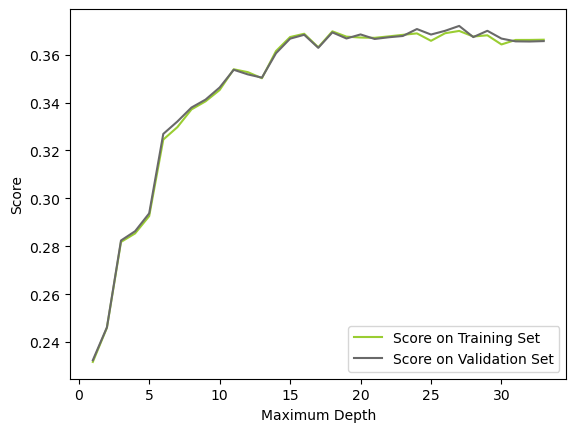

In [143]:
plt.plot(nof_list_1, train_score_list_1, label="Score on Training Set", color='yellowgreen')
plt.plot(nof_list_1, val_score_list_1, label="Score on Validation Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We decided to use Logistic Regression as the model for RFE, because:
 - comparing to other more complex models it is computanially more efficient;
 - it is suitable for binary columns and multiclassfication problems;
 - more importantly it is a model that ranks features. <br>

According to Logistic Regression, the optimal number of features to keep is 27/33, as seen in the ranking before, meaning that `Accident Date`, `Assembly Date`, `Number of Dependents`, `C-2 Date`, `Claim Identifier` and `Likelihood by Industry` should be eliminated according to RFE using Logistic regression as a model.

### 3.2.1.2 RFE using Ridge Classifier

In [144]:
from sklearn.linear_model import RidgeClassifier
#No of features
nof_list_2=np.arange(1,34)
high_score_2=0
#Variable to store the optimum features
nof_2=0
train_score_list_2 =[]
val_score_list_2 = []

for n in range(len(nof_list_2)):
    #Call support vector machines classifier
    model = RidgeClassifier()

    #Create RFE instance
    rfe_2 = RFE(estimator = model,n_features_to_select = nof_list_2[n])

    #Fit and transform for training data, transform for val data
    X_train_rfe_2 = rfe_2.fit_transform(X_train_complete,y_train_encoded)
    X_val_rfe_2 = rfe_2.transform(X_val_complete)

    model.fit(X_train_rfe_2,y_train_encoded)

    #Predict on training and validation sets
    y_train_pred_2 = model.predict(X_train_rfe_2)
    y_val_pred_2 = model.predict(X_val_rfe_2)

    #Storing results on training data
    train_score_2 = f1_score(y_train_encoded, y_train_pred_2, average='macro')
    train_score_list_2.append(train_score_2)

    #Storing results on training data
    val_score_2 = f1_score(y_train_encoded, y_train_pred_2, average='macro')
    val_score_list_2.append(val_score_2)

    #Check best score
    if(val_score_2 > high_score_2):
        high_score_2 = val_score_2
        nof_2 = nof_list_2[n]

print("Optimum number of features: %d" %nof_2)
print("Score with %d features: %f" % (nof_2, high_score_2))

Optimum number of features: 30
Score with 30 features: 0.257567


In [145]:
model = RidgeClassifier()
rfe = RFE(estimator=model, n_features_to_select=nof_2)

X_rfe = rfe.fit_transform(X=X_train_complete, y=y_train_encoded)

In [146]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [147]:
selected_features = pd.Series(rfe.ranking_, index = X_train_complete.columns)
selected_features

Age at Injury                              1
Average Weekly Wage                        1
Birth Year                                 1
Number of Dependents                       3
Days Between Accident and Assembly Date    1
Forms Filed Indicator                      1
Accident Date                              1
Alternative Dispute Resolution             1
Assembly Date                              1
Attorney/Representative                    1
C-2 Date                                   1
C-3 Date                                   1
Carrier Name                               1
Carrier Type                               1
Claim Identifier                           4
County of Injury                           1
COVID-19 Indicator                         1
District Name                              1
First Hearing Date                         1
Gender                                     1
Industry Code                              1
Industry Code Description                  1
Medical Fe

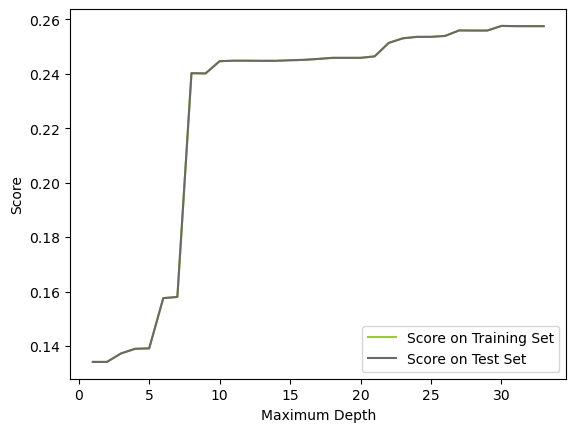

In [148]:
plt.plot(nof_list_2, train_score_list_2, label="Score on Training Set", color='yellowgreen')
plt.plot(nof_list_2, val_score_list_2, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We decided to use Ridge Classifier, because:
- it helps stabilize feature importance by reducing multicollinearity,making feature selection more robust and less sensitive to noise, given that it applies a L2 penalization;
- It is computanionally efficient as well, even with high-dimensional datasets. <br>

According to Rigde Classifier the optimal number of features is 30, meaning that `Number of Dependents`, `Claim Identifier` and `Medical Fee Region` are the only variables that should be eliminated according to this model. 

## 3.3 Embedded Methods

### 3.3.1 LASSO Regression

In [149]:
lasso = LassoCV(cv=10, random_state=1)

lasso.fit(X_train_complete,y_train_encoded)

LassoCV(cv=10, random_state=1)

In [150]:
coef = pd.Series(data=lasso.coef_,index=X_train_complete.columns)
display(coef.sort_values(ascending=True))

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Forms Filed Indicator                     -4.400184e+00
C-3 Date                                  -3.029745e+00
Attorney/Representative                   -1.380529e+00
First Hearing Date                        -5.598108e-01
Injury Severity                           -2.531811e-01
Medical Fee Region                        -2.185302e-01
Birth Year                                -1.424945e-01
District Name                             -3.494834e-02
WCIO Part Of Body Code                    -1.039906e-02
Claim Identifier                          -0.000000e+00
Assembly Date                             -0.000000e+00
C-2 Date                                   0.000000e+00
Accident Date                             -0.000000e+00
Days Between Accident and Assembly Date   -0.000000e+00
Number of Dependents                      -0.000000e+00
Age at Injury                              0.000000e+00
WCIO Cause of Injury Description           0.000000e+00
WCIO Part Of Body Description              0.000

Lasso picked 23 variables and eliminated the other 10 variables


In [151]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

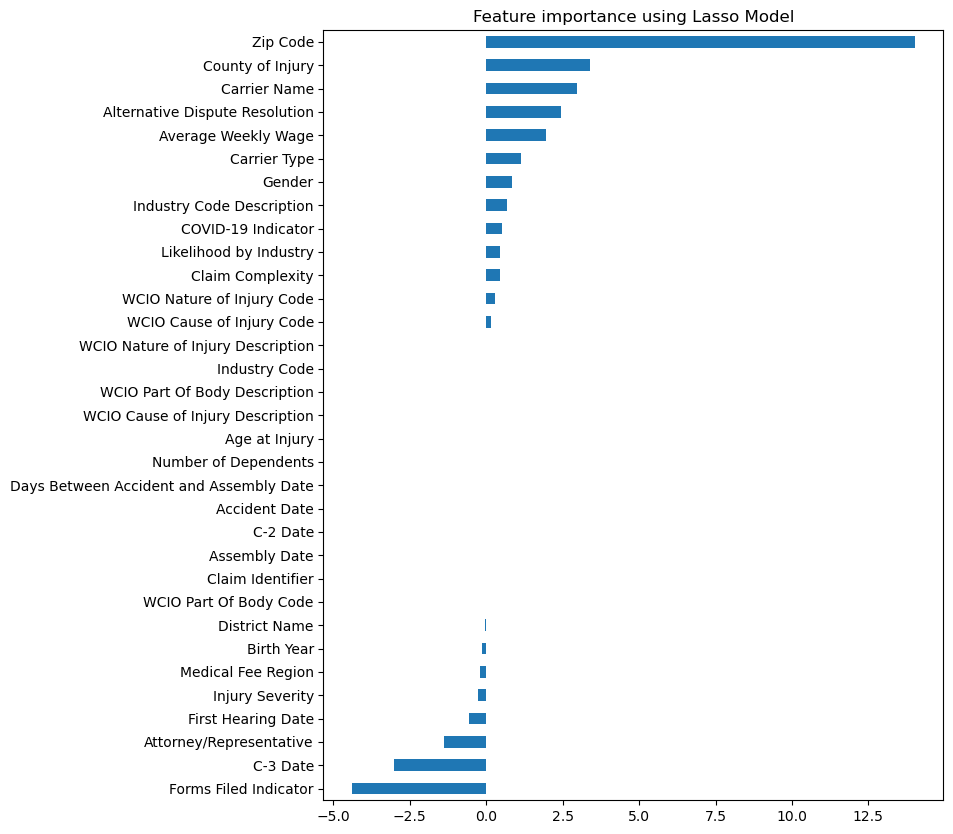

In [152]:
plot_importance(coef,"Lasso")

We decided to use Lasso, because:
- This model applies an L1 penalization, which unlike the Ridge Classifier can eliminate features by setting their coefficients to zero

According to Lasso, we should remove 10 variables, since these variables are considered insignificant variables by the model (coefficient = 0).

# 4. Final Conclusions

### Numerical Data


| Predictor                               | Spearman | RFE LR | RFE RC  | Lasso   | What to do?                                        |
|-----------------------------------------|----------|--------|---------|---------|----------------------------------------------------|
| Age at Injury                           | Keep?    | Keep   | Keep    | Discard | Discard (high correlation with "Birth Year")                               |
| Average Weekly Wage                     | Keep     | Keep   | Keep    | Keep    | Include in the model                               |
| Birth Year                              | Keep?    | Keep   | Keep    | Keep    | Include in the model                               |
| Number of Dependents                    | Keep     | Discard| Discard | Discard | Discard                                            |
| Days Between Accident and Assembly Date | Keep     | Keep   | Keep    | Discard | Include in the model                               |
| Forms Filled Indicator                  | Keep     | Keep   | Keep    | Keep    | Include in the model                               |

<hr>

### Categorical Data

| Predictor                          | Chi-square | RFE LR | RFE RC  | Lasso    | What to do?                           |
|------------------------------------|------------|--------|---------|----------|---------------------------------------|
| Accident Date                      | Keep       | Discard| Keep    | Discard  | Discard                               |
| Alternative Dispute Resolution     | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Attorney/Representative            | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Assembly Date                      | Keep       | Discard| Keep    | Discard  | Discard                               |
| C-2 Date                           | Keep       | Discard| Keep    | Discard  | Discard                               |
| C-3 Date                           | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Carrier Name                       | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Carrier Type                       | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Claim Identifier                   | Discard    | Discard| Discard | Discard  | Discard                               |
| County of Injury                   | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| COVID-19 Indicator                 | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| District Name                      | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| First Hearing Date                 | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Gender                             | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Industry Code                      | Keep       | Keep   | Keep    | Discard  | Include in the model                  |
| Industry Code Description          | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Medical Fee Region                 | Keep       | Keep   | Discard | Keep     | Include in the model                  |
| WCIO Cause of Injury Code          | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| WCIO Cause of Injury Description   | Keep       | Keep   | Keep    | Discard  | Include in the model                  |
| WCIO Nature of Injury Code         | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| WCIO Nature of Injury Description  | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| WCIO Part Of Body Code             | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| WCIO Part Of Body Description      | Keep       | Keep   | Keep    | Discard  | Include in the model                  |
| Zip Code                           | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Claim Complexity                   | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Injury Severity                    | Keep       | Keep   | Keep    | Keep     | Include in the model                  |
| Likelihood by Industry             | Keep       | Discard| Keep    | Keep     | Include in the model                  |

# 5. Modeling Selection

## 5.1 Testing the Model with all Features

In [167]:
#Selected Features
selected_features = [ 
    'Average Weekly Wage',
    'Birth Year',
    'Days Between Accident and Assembly Date',
    'Forms Filed Indicator',
    'Alternative Dispute Resolution', 
    'Attorney/Representative',
    'C-3 Date', 
    'Carrier Name', 
    'Carrier Type', 
    'County of Injury', 
    'COVID-19 Indicator', 
    'District Name', 
    'First Hearing Date', 
    'Gender', 
    'Industry Code', 
    'Industry Code Description',
    'Medical Fee Region',
    'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'Zip Code', 
    'Claim Complexity', 
    'Injury Severity', 
    'Likelihood by Industry'
]

#Filter datasets based on selected features
X_train_selected = X_train_complete[selected_features]
X_val_selected = X_val_complete[selected_features]

For our model to run optimally, we decided to only select the best features based on past performance.

In [168]:
#Mask to select only samples without NaN in y_train
train_mask = ~np.isnan(y_train_encoded)
X_train_cleaned = X_train_selected[train_mask]
y_train_cleaned = y_train_encoded[train_mask]

#Mask for validation
val_mask = ~np.isnan(y_val_encoded)
X_val_cleaned = X_val_selected[val_mask]
y_val_cleaned = y_val_encoded[val_mask]

As we know, it is normal for the target variable to have missing values, but since the models selected to train cannot handle missing values, we decided to "mask" them. This ensures that models can be trained without any problems!

In [169]:
#Confirm alignment
assert len(X_train_cleaned) == len(y_train_cleaned), "Misalignment after removing NaN!"
assert len(X_val_cleaned) == len(y_val_cleaned), "Misalignment after removing NaN!"

We are here doing a security check to ensure that the training and validation sets are correctly aligned after removing NaN. This prevents future errors during model training.

In [170]:
#Convert y_train_cleaned to pandas Series (if still a NumPy array)
if isinstance(y_train_cleaned, np.ndarray):
    y_train_cleaned = pd.Series(y_train_cleaned, index=X_train_cleaned.index)
    
if isinstance(y_val_cleaned, np.ndarray):
    y_val_cleaned = pd.Series(y_val_cleaned, index=X_val_cleaned.index)

We want to check whether the target variables y_train_cleaned and y_val_cleaned are NumPy arrays and, if so, convert them to pandas Series, ensuring that they have the same index as the corresponding feature sets (X_train_cleaned and X_val_cleaned).

In [171]:
#10000 row sample
sample_size = 10000

X_train_sampled = X_train_cleaned.sample(n=sample_size, random_state=42)
y_train_sampled = y_train_cleaned.sample(n=sample_size, random_state=42)

X_val_sampled = X_val_cleaned.sample(n=sample_size, random_state=42)
y_val_sampled = y_val_cleaned.sample(n=sample_size, random_state=42)

In [172]:
#Define models for evaluation
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=500),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "XGBoostClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

#Ensure all classes are represented in the training set
def ensure_classes_in_train(y_train, y_val, X_train):
    """
    Ensure all classes in validation exist in the training set by adding dummy samples.
    """
    all_classes = np.unique(np.concatenate([y_train, y_val]))
    missing_classes = np.setdiff1d(all_classes, np.unique(y_train))
    
    for cls in missing_classes:
        X_dummy = np.zeros((1, X_train.shape[1]))  # Create a dummy feature row
        X_train = np.vstack([X_train, X_dummy])   # Add it to the training set
        y_train = np.append(y_train, cls)         # Add the missing class to y_train
    
    return X_train, y_train

#Loop through models and evaluation
results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    #Special handling for XGBoostClassifier
    if model_name == "XGBoostClassifier":
        X_train_sampled, y_train_sampled = ensure_classes_in_train(
            y_train_sampled, y_val_sampled, X_train_sampled
        )
    
    #Training the model with the training sample
    model.fit(X_train_sampled, y_train_sampled)
    
    #Making predictions on the validation set
    y_pred = model.predict(X_val_sampled)
    y_prob = model.predict_proba(X_val_sampled)[:, 1] if hasattr(model, "predict_proba") else None  # Para AUC-ROC
    
    #F1-Score Weighted
    f1_weighted = f1_score(y_val_sampled, y_pred, average='weighted')
    print(f"F1-Score Weighted: {f1_weighted}")
    
    #F1-Score Macro
    f1_macro = f1_score(y_val_sampled, y_pred, average='macro')
    print(f"F1-Score Macro: {f1_macro}")
    
    #Classification Report
    print("Classification Report:")
    print(classification_report(y_val_sampled, y_pred))
    
    #Store results
    results[model_name] = {
        "f1_score_weighted": f1_weighted,
        "f1_score_macro": f1_macro,
        "classification_report": classification_report(y_val_sampled, y_pred, output_dict=True)
    }


Evaluating RandomForestClassifier...
F1-Score Weighted: 0.7116752911455929
F1-Score Macro: 0.39763108490912935
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.32      0.43       218
           1       0.82      0.96      0.88      4936
           2       0.32      0.04      0.07      1145
           3       0.68      0.87      0.76      2528
           4       0.65      0.32      0.43       781
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00       324

    accuracy                           0.76     10000
   macro avg       0.46      0.39      0.40     10000
weighted avg       0.71      0.76      0.71     10000


Evaluating LogisticRegression...
F1-Score Weighted: 0.6751324772239514
F1-Score Macro: 0.36407893148630655
Classification Report:
              precision    re

In [173]:
#Summary of results
print("\nModel Evaluation Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  F1-Score Weighted: {metrics['f1_score_weighted']}")
    print(f"  F1-Score Macro: {metrics['f1_score_macro']}")


Model Evaluation Summary:
RandomForestClassifier:
  F1-Score Weighted: 0.7116752911455929
  F1-Score Macro: 0.39763108490912935
LogisticRegression:
  F1-Score Weighted: 0.6751324772239514
  F1-Score Macro: 0.36407893148630655
SVC:
  F1-Score Weighted: 0.670367041323547
  F1-Score Macro: 0.36390469333786923
KNeighborsClassifier:
  F1-Score Weighted: 0.6837736916790894
  F1-Score Macro: 0.3961860230034596
GradientBoostingClassifier:
  F1-Score Weighted: 0.7170371447116946
  F1-Score Macro: 0.4117513274374914
DecisionTreeClassifier:
  F1-Score Weighted: 0.6461325633358304
  F1-Score Macro: 0.37967461990265183
XGBoostClassifier:
  F1-Score Weighted: 0.7189686507774089
  F1-Score Macro: 0.41752736272130203


In [174]:
def grid_search_holdout(model, param_grid, X_train_sampled, y_train_sampled, X_val_sampled, y_val_sampled, scoring="f1_weighted"):
    """
    Function to perform GridSearch manually with Hold-Out method.
    
    Args:
        model: Model instance (e.g. RandomForestClassifier()).
        param_grid: Dictionary of hyperparameters (e.g. {'n_estimators': [100, 200]}).
        X_train: Training set (resources).
        y_train: Training set (labels).
        X_val: Validation set (features).
        y_val: Validation set (labels).
        score: Metric to evaluate results (default: "f1_weighted").
    
    Returns:
        A dictionary with the best parameters, scores and the fitted model.
    """
    best_score = -np.inf
    best_params = None
    best_model = None
    scores = []

    #Iterate over all parameter combinations
    for params in ParameterGrid(param_grid):
        print(f"Testing parameters: {params}")
        
        #Update model parameters
        model.set_params(**params)
        
        #Training the model
        model.fit(X_train_sampled, y_train_sampled)
        
        #Making predictions on the validation set
        y_pred = model.predict(X_val_sampled)
        
        #Calculate the metric
        if scoring == "f1_weighted":
            score = f1_score(y_val_sampled, y_pred, average='weighted')
        elif scoring == "f1_macro":
            score = f1_score(y_val_sampled, y_pred, average='macro')
        else:
            raise ValueError(f"Scoring '{scoring}' not supported.")
        
        print(f"Score ({scoring}): {score}")
        scores.append((params, score))
        
        #Update the best model
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model

    print("\nBest Parameters:", best_params)
    print(f"Best {scoring} Score: {best_score}")
    
    return {
        "best_params": best_params,
        "best_score": best_score,
        "best_model": best_model,
        "all_scores": scores
    }

In [175]:
#Hyperparameters for optimization
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "gamma": [0, 0.1, 0.2]
}

#Run GridSearch for RandomForest with F1-Macro
rf_results = grid_search_holdout(
    model=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    X_train_sampled=X_train_sampled,
    y_train_sampled=y_train_sampled,
    X_val_sampled=X_val_sampled,
    y_val_sampled=y_val_sampled,
    scoring="f1_macro" 
)

#Running GridSearch for Gradient Boosting with F1-Macro
gb_results = grid_search_holdout(
    model=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    X_train_sampled=X_train_sampled,
    y_train_sampled=y_train_sampled,
    X_val_sampled=X_val_sampled,
    y_val_sampled=y_val_sampled,
    scoring="f1_macro" 
)

#Running GridSearch for XGBoost with F1-Macro
xgb_results = grid_search_holdout(
    model=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
    param_grid=param_grid_xgb,
    X_train_sampled=X_train_sampled,
    y_train_sampled=y_train_sampled,
    X_val_sampled=X_val_sampled,
    y_val_sampled=y_val_sampled,
    scoring="f1_macro"
)

#Compare the results
print("\nRandom Forest Results:", rf_results["best_score"], rf_results["best_params"])
print("Gradient Boosting Results:", gb_results["best_score"], gb_results["best_params"])
print("XGBoost Results:", xgb_results["best_score"], xgb_results["best_params"])

Testing parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Score (f1_macro): 0.3974844705250096
Testing parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Score (f1_macro): 0.3989233080053979
Testing parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Score (f1_macro): 0.3993943673184588
Testing parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Score (f1_macro): 0.39490046677297125
Testing parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Score (f1_macro): 0.3970663495974872
Testing parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Score (f1_macro): 0.39733010178548306
Testing parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Score (f1_macro): 0.38003496654975644
Testing parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Score (f1_macro): 0.3801245522362551
Testing parameters: {'max

We here at this stage selected a sample of 10000 lines to ensure that we obtain results faster and consequently conclusions because we need to find out which was our best model. So we start by training different models with accuracy scores, f1 and f1_macro for a small sample. The xgboost model had to take a few things into consideration first, because this requires the training set to include all existing classes in order to train them correctly. The problem arises when:

- When dividing the data between training and validation (hold-out), some classes present in the validation set (y_val_sampled) may not appear in the training set (y_train_sampled).
- This is more common in unbalanced datasets or when there are rare classes

To solve this problem, we implemented a technique for adding dummy samples to classes missing in training:

1. Identify Missing Classes:
 - We checked which classes were present in the validation set but absent in training.
2. Add Dummy Samples:
For each missing class:
 - We add a dummy row into the training set with all features set to zero (or neutral values).
 - The target variable for this row has been assigned to the missing class.
3. Justification:
 - These samples do not significantly affect the model's performance, as the feature values ​​are neutral and the number of samples added is very small compared to the total training size.
 - The goal is to ensure that XGBoost recognizes all classes during training.
4. Consistency with Validation:
 - The validation set is not changed, and the model is evaluated normally.
 
After seeing which models performed best, we selected the 3 best, RandomForest, GradientBoost and XGBoost, to be analyzed based on their performance and best parameters. To define the best parameters, we need GridSearch, but as we are using the hold-out method, we had to create a function to prevent data leakage. This way, we select the best model based on its best parameters and train that same model.

In [176]:
#Select the best model and its parameters
if rf_results["best_score"] > gb_results["best_score"] and rf_results["best_score"] > xgb_results["best_score"]:
    best_model = rf_results["best_model"]
    print("\nBest Model: RandomForest")
elif gb_results["best_score"] > xgb_results["best_score"]:
    best_model = gb_results["best_model"]
    print("\nBest Model: GradientBoosting")
else:
    best_model = xgb_results["best_model"]
    print("\nBest Model: XGBoost")

#Train the best model on the complete training set
best_model.fit(X_train_cleaned, y_train_cleaned)
print("Training completed on the full dataset.")


Best Model: XGBoost
Training completed on the full dataset.


In [177]:
#Final evaluation on the test set
y_test_pred = best_model.predict(X_test_complete[selected_features])

In [164]:
y_test_pred_original = target_encoder.inverse_transform(y_test_pred)
y_test_pred_original

array(['2. NON-COMP', '2. NON-COMP', '2. NON-COMP', ..., '1. CANCELLED',
       '2. NON-COMP', '2. NON-COMP'], dtype=object)

In [178]:
#Generate submission to Kaggle
submission = pd.DataFrame({
    "Claim Identifier": X_test["Claim Identifier"],
    "Claim Injury Type": y_test_pred_original
})

submission.to_csv("final_submission.csv", index=False)
print("Submission file generated!")

Submission file generated!


# 6. Open Ended Section

## 6.1 Analytics Interface

For this cell to work there is a need to run the the notebook until the cell in feature selection that creates X_train_complete, X_val_complete and X_test_complete and then the whole section "Modeling Selection".

Sections that make the notebook take much time to run and can be avoided for this cell to work:

- Section "Exploring data visually"
- Section "Analysing multivariate relationships"
- RFE with Logistic Regression
- RFE with Ridge Classifier

Once all the other cells are runned, this cell is supossed to work given that X_train already exists with preprocessing all done and the model is already trained to give the predictions. This cell once is runned after some seconds will open a new window in our computer (at least in windows) and its logo in the task bar is a blue feather.

In [180]:
#Fitting the encoder and scaling to the training data in this cell to not be refering to the scaler and encoding way above in the notebook
target_interface_encoder = LabelEncoder()
y_interface = y_train.copy()
y_interface_encoded = target_interface_encoder.fit_transform(y_interface)

encoder_interface = ce.CountEncoder(normalize=True)
X_interface_encoded = encoder_interface.fit_transform(X_train[selected_features].select_dtypes(exclude=np.number))

scaler_interface = MinMaxScaler()
scaled_X_interface = scaler_interface.fit_transform(X_train[selected_features].select_dtypes(include=np.number))

def preprocess_inputs(inputs, scaler_interface, encoder_interface, X_interface):
    numerical_columns = ["Average Weekly Wage", "Birth Year", "Days Between Accident and Assembly Date", "Forms Filed Indicator"]
    code_columns = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]
    categorical_columns = [col for col in X_interface.columns if col not in numerical_columns+code_columns]

    adjusted_inputs = {}
    for key, value in inputs.items():
        if key in numerical_columns+code_columns:
            adjusted_inputs[key] = pd.to_numeric(value, errors="coerce")
        else:
            adjusted_inputs[key] = value

    df = pd.DataFrame([adjusted_inputs])

    df = df.reindex(columns=X_interface.columns, fill_value=np.nan)
    
    df[categorical_columns+code_columns] = encoder_interface.transform(df[categorical_columns+code_columns])

    if numerical_columns:
        df[numerical_columns] = scaler_interface.transform(df[numerical_columns])

    return df


# Function to deal with the inputs once they are submitted
def submit_form():
    inputs = {
    "Birth Year" : birth_var.get(),
    "Days Between Accident and Assembly Date": days_var.get(),
    "C-3 Date": c_3_var.get(),
    "First Hearing Date": hearing_var.get(),
    "Alternative Dispute Resolution": var1.get(),
    "Attorney/Representative": var2.get(),
    "Average Weekly Wage": wage_var.get(),
    "Carrier Name": carrier_name_var.get(),
    "Carrier Type": carrier_type_var.get(),
    "County of Injury": county_var.get(),
    "COVID-19 Indicator": var3.get(),
    "District Name": district_var.get(),
    "Gender": gender_var.get(),
    "Industry Code": ind_code_var.get(),
    "Industry Code Description": ind_code_des_var.get(),
    "Medical Fee Region": var4.get(),
    "WCIO Cause of Injury Code": WCIO_cause_var.get(),
    "WCIO Cause of Injury Description": WCIO_cause_des_var.get(),
    "WCIO Nature of Injury Code": WCIO_nature_var.get(),
    "WCIO Nature of Injury Description": WCIO_nature_des_var.get(),
    "WCIO Part Of Body Code": WCIO_body_var.get(),
    "WCIO Part Of Body Description": WCIO_body_des_var.get(),
    "Zip Code": zip_code_var.get(),
    "Claim Complexity": var5.get(),
    "Forms Filed Indicator": var6.get(),
    "Injury Severity": var7.get(),
    "Likelihood by Industry": var8.get(),
}
    
    mandatory_fields = [
    "Alternative Dispute Resolution", "Attorney/Representative", "Average Weekly Wage", "Birth Year", 
    "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator", "District Name", 
    "First Hearing Date", "Gender", "Industry Code", "Industry Code Description", "Medical Fee Region", 
    "WCIO Cause of Injury Code", "WCIO Cause of Injury Description", "WCIO Nature of Injury Code", 
    "WCIO Nature of Injury Description", "WCIO Part Of Body Code", "WCIO Part Of Body Description", "Zip Code", 
    "Days Between Accident and Assembly Date", "Claim Complexity", "Forms Filed Indicator", "Injury Severity", 
    "Likelihood by Industry"]

    for field in mandatory_fields:
        if inputs[field] == "" or inputs[field] is None or inputs[field] == "X" or inputs[field] == 4:
            messagebox.showerror("Error", f"Please, fill in all mandatory fields! Missing: {field}")
            return

    birth_year_pattern = r"^\d{4}\.\d{1}$"
    if not re.match(birth_year_pattern, inputs["Birth Year"]):
        messagebox.showerror("Invalid Input", "Please enter a valid birth year in the format (e.g. 1990.0)")
        return

    wage_pattern = r"^\d+(\.\d{1,2})?$"
    if not re.match(wage_pattern, inputs["Average Weekly Wage"]):
        messagebox.showerror("Invalid Input", "Please enter a valid weekly wage in the format (e.g. 834.09)")
        return
        
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    for date_field in ["C-3 Date", "First Hearing Date"]:
        if date_field == "C-3 Date" and inputs[date_field] == "Compensation form not received":
            continue
        if date_field == "First Hearing Date" and inputs[date_field] == "No hearing has taken place yet":
            continue
        if not re.match(date_pattern, inputs[date_field]):
            messagebox.showerror("Error", f"Please enter a valid date in the format yyyy-mm-dd for {date_field}!")
            return

    zip_code_pattern = r"^\d{5}$"
    if not re.match(zip_code_pattern, inputs["Zip Code"]):
        messagebox.showerror("Invalid Zip Code", "Please enter a valid zip code with 5 digits!")
        return
        
    days_pattern = r"^\d+$"
    if not re.match(days_pattern, inputs["Days Between Accident and Assembly Date"]):
        messagebox.showerror("Invalid Input", "Please enter a valid number of days (e.g. 88)")
        return
    
    messagebox.showinfo("Submitted", "Inputs submitted with success!")



    try:
        processed_inputs = preprocess_inputs(inputs, scaler_interface, encoder_interface, X_train[selected_features])

        processed_inputs_2 = processed_inputs.reindex(columns=X_train[selected_features].columns, fill_value=np.nan)

        display(processed_inputs_2)
        
        # Make prediction using the best model from before that is already trained in our trainig data
        prediction_interface = best_model.predict(processed_inputs_2)

        prediction_interface_original = target_interface_encoder.inverse_transform(prediction_interface)

        # Display prediction result
        messagebox.showinfo("Prediction Result", f"The predicted target value is: {prediction_interface_original}")
    
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {e}")
    
def to_uppercase_combo(event):
    current_value = event.widget.get()
    upper_value = current_value.upper()


    event.widget.delete(0, tk.END)
    event.widget.insert(0, upper_value)

def center_window(window, width, height):
    screen_width = window.winfo_screenwidth()
    screen_height = window.winfo_screenheight()

    position_top = int(screen_height / 2 - height / 2)
    position_left = int(screen_width / 2 - width / 2)

    window.geometry(f'{width}x{height}+{position_left}+{position_top-30}')


def disable_combobox_scroll(event):
    return "break"  
    
# Configuration of the main window
root = tk.Tk()

root.title("Analytics Interface")
window_width = 560
window_height = 600

root.resizable(False, False)


center_window(root, window_width, window_height)

# Color pallet
palette = {
    "header_background": "#ffffff",  # Branco
    "form_background": "#125463",  # Azul escuro
    "label_background": "#125463",  # Mesma cor do fundo
    "label_foreground": "#ffffff",  # Branco
    "button_background": "#f26e3d",  # Laranja
    "button_foreground": "#ffffff",  # Branco
    "text_field_background": "#ffffff",  # Branco
    "text_field_foreground": "#000000",  # Preto
}

root.configure(bg=palette["form_background"])

style = ttk.Style(root)
style.theme_use("clam")

style.configure("TLabel", background=palette["label_background"], foreground=palette["label_foreground"], font=("Calibri", 14))
style.configure("TButton", background=palette["button_background"], foreground=palette["button_foreground"], font=("Calibri", 14, "bold"))
style.configure("TCombobox", font=("Calibri", 12))

canvas = tk.Canvas(root, bg="#125463")
scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
scrollable_frame = tk.Frame(canvas, bg="#125463")

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))

)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")


tk.Label(scrollable_frame,text="Analytics Interface", bg=palette["form_background"], fg="#ffffff", font=("Calibri", 20, "bold")).pack()
tk.Label(scrollable_frame,text="Introduce the correspondent data", bg=palette["form_background"], fg="#ffffff", font=("Calibri", 14)).pack(pady=15)


#Alternative Dispute Resolution
tk.Label(scrollable_frame, text="Alternative Dispute Resolution? *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)

var1 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="Yes (Y)", variable=var1, value="Y", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="No (N)", variable=var1, value="N", bg="#125463",fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Unknown (U)", variable=var1, value="U", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# Attorney / Representative
tk.Label(scrollable_frame, text="Attorney / Representative? *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=10)

var2 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="Yes (Y)", variable=var2, value="Y", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="No (N)", variable=var2, value="N", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

#Average Weekly wage
wage_var = tk.StringVar()
tk.Label(scrollable_frame, text="Average Weekly Wage (e.g 834.09) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=5)
date_entry = tk.Entry(scrollable_frame, textvariable=wage_var)
date_entry.pack(fill="x", padx=20,pady=10)

# Birth Year
birth_var = tk.StringVar()
tk.Label(scrollable_frame, text="Birth Year (e.g 1990.0) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=5)
date_entry = tk.Entry(scrollable_frame, textvariable=birth_var)
date_entry.pack(fill="x", padx=20,pady=10)

# C-3 Date input
c_3_var = tk.StringVar()
tk.Label(scrollable_frame, text="C-3 Date (yyyy-mm-dd) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=10)
date_entry = tk.Entry(scrollable_frame, textvariable=c_3_var)
date_entry.pack(fill="x", padx=20)

# Carrier Name input
carrier_name_var = tk.StringVar()

# Function to convert Carrier Name to uppercase
def to_uppercase_2(*args):
    value = carrier_name_var.get()
    carrier_name_var.set(value.upper())



carrier_name_var.trace_add("write", to_uppercase_2)

tk.Label(scrollable_frame, text="Carrier Name *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=10)
date_entry = tk.Entry(scrollable_frame, textvariable=carrier_name_var)
date_entry.pack(fill="x", padx=20)

# Carrier Type input
carrier_type_var = tk.StringVar()
tk.Label(scrollable_frame, text="Carrier Type *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo1 = ttk.Combobox(scrollable_frame, textvariable=carrier_type_var, values=["1A. PRIVATE","2A. SIF", "3A. SELF PUBLIC", "4A. SELF PRIVATE", "5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)", "5C. SPECIAL FUND - POI CARRIER WCB MENANDS", "5D. SPECIAL FUND - UNKNOWN", "UNKNOWN"])
combo1.pack(fill="x", padx=20)
combo1.bind("<KeyRelease>", to_uppercase_combo)
combo1.bind("<MouseWheel>", disable_combobox_scroll)

# County of Injury input
county_var = tk.StringVar()
tk.Label(scrollable_frame, text="County of Injury *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo2 = ttk.Combobox(scrollable_frame, textvariable=county_var, values=['ALBANY', 'ALLEGANY', 'BRONX', 'BROOME', 'CATTARAUGUS', 'CHEMUNG', 'CHENANGO', 'CLINTON', 'COLUMBIA', 'CORTLAND', 'DELAWARE', 'DUTCHESS', 'ESSEX', 'FRANKLIN', 'FULTON', 'GENESEE', 'GREENE', 'HAMILTON', 'HERKIMER', 'JEFFERSON', 'LEWIS', 'LIVINGSTON', 'MADISON', 'MONROE', 'MONTGOMERY', 'NASSAU', 'NEW YORK', 'NIAGARA', 'KINGS', 'ONONDAGA', 'ONTARIO', 'ORANGE', 'ORLEANS', 'OTSEGO', 'PUTNAM', 'QUEENS', 'RENSSELAER', 'RICHMOND', 'ROCKLAND', 'SARATOGA', 'SCHENECTADY', 'SCHOHARIE', 'SCHUYLER', 'ST. LAWRENCE', 'STEUBEN', 'SUFFOLK', 'SULLIVAN', 'TIOGA', 'TOMPKINS', 'WAYNE', 'WASHINGTON', 'WESTCHESTER', 'WYOMING', 'YATES', 'ULSTER', 'OSWEGO', 'FRANKLIN', 'CAYUGA', 'UNKNOWN'])
combo2.pack(fill="x", padx=20)
combo2.bind("<KeyRelease>", to_uppercase_combo)
combo2.bind("<MouseWheel>", disable_combobox_scroll)


# Covid-19 input
tk.Label(scrollable_frame, text="Covid-19? *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 14)).pack(anchor='w', padx=20, pady=5)

var3 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="Yes (Y)", variable=var3, value="Y", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="No (N)", variable=var3, value="N", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# District Name input
district_var = tk.StringVar()
tk.Label(scrollable_frame, text="District Name *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo3 = ttk.Combobox(scrollable_frame, textvariable=district_var, values=['ALBANY', 'BINGHAMTON', 'BUFFALO', 'HAUPPAUGE', 'NYC', 'ROCHESTER', 'STATEWIDE', 'SYRACUSE'])
combo3.pack(fill="x", padx=20)
combo3.bind("<KeyRelease>", to_uppercase_combo)
combo3.bind("<MouseWheel>", disable_combobox_scroll)

# First Hearing Date input
hearing_var = tk.StringVar()
tk.Label(scrollable_frame, text="First Hearing Date (yyyy-mm-dd or No hearing has taken place yet) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=5)
date_entry = tk.Entry(scrollable_frame, textvariable=hearing_var)
date_entry.pack(fill="x", padx=20,pady=10)


# Gender input
gender_var = tk.StringVar()
tk.Label(scrollable_frame, text="Gender *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo4 = ttk.Combobox(scrollable_frame, textvariable=gender_var, values=['M','F','U','X'])
combo4.pack(fill="x", padx=20)
combo4.bind("<KeyRelease>", to_uppercase_combo)
combo4.bind("<MouseWheel>", disable_combobox_scroll)

# Industry Code input
ind_code_var = tk.StringVar()
tk.Label(scrollable_frame, text="Industry Code *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo5 = ttk.Combobox(scrollable_frame, textvariable=ind_code_var, values=[11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 62.0, 71.0, 72.0, 81.0, 92.0])
combo5.pack(fill="x", padx=20)
combo5.bind("<KeyRelease>", to_uppercase_combo)
combo5.bind("<MouseWheel>", disable_combobox_scroll)

# Industry Code Description input
ind_code_des_var = tk.StringVar()
tk.Label(scrollable_frame, text="Industry Code Description *", bg=palette["label_background"]
, fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo6 = ttk.Combobox(scrollable_frame, textvariable=ind_code_des_var, values=['ACCOMMODATION AND FOOD SERVICES', 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT', 'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'ARTS, ENTERTAINMENT, AND RECREATION', 'CONSTRUCTION', 'EDUCATIONAL SERVICES', 'FINANCE AND INSURANCE', 'HEALTH CARE AND SOCIAL ASSISTANCE', 'INFORMATION', 'MANAGEMENT OF COMPANIES AND ENTERPRISES', 'MANUFACTURING', 'MINING', 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 'PUBLIC ADMINISTRATION', 'REAL ESTATE AND RENTAL AND LEASING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING', 'UTILITIES', 'WHOLESALE TRADE'])
combo6.pack(fill="x", padx=20)
combo6.bind("<KeyRelease>", to_uppercase_combo)
combo6.bind("<MouseWheel>", disable_combobox_scroll)

# Medical Fee Region input
tk.Label(scrollable_frame, text="Medical Fee Region *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)

var4 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="I", variable=var4, value="I", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="II", variable=var4, value="II", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="III", variable=var4, value="III", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="IV", variable=var4, value="IV", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Unknown", variable=var4, value="UK", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# WCIO Cause of Injury Code input
WCIO_cause_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Cause of Injury Code *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo7 = ttk.Combobox(scrollable_frame, textvariable=WCIO_cause_var, values=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0])
combo7.pack(fill="x", padx=20)

combo7.bind("<KeyRelease>", to_uppercase_combo)
combo7.bind("<MouseWheel>", disable_combobox_scroll)

# WCIO Cause of Injury Description input
WCIO_cause_des_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Cause of Injury Description *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo8 = ttk.Combobox(scrollable_frame, textvariable=WCIO_cause_des_var, values=["ABNORMAL AIR PRESSURE", "ABSORPTION, INGESTION OR INHALATION, NOC", "ANIMAL OR INSECT", "BROKEN GLASS", "CAUGHT IN, UNDER OR BETWEEN, NOC", "CHEMICALS", "COLD OBJECTS OR SUBSTANCES", "COLLAPSING MATERIALS (SLIDES OF EARTH)", "COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "COLLISION WITH A FIXED OBJECT", "CONTACT WITH, NOC", "CONTINUAL NOISE", "CRASH OF AIRPLANE", "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CUMULATIVE, NOC", "CUT, PUNCTURE, SCRAPE, NOC", "DUST, GASES, FUMES OR VAPORS", "ELECTRICAL CURRENT", "EXPLOSION OR FLARE BACK", "FALL, SLIP OR TRIP, NOC", "FALLING OR FLYING OBJECT", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FIRE OR FLAME", "FOREIGN MATTER (BODY) IN EYE(S)", "FROM DIFFERENT LEVEL (ELEVATION)", "FROM LADDER OR SCAFFOLDING", "FROM LIQUID OR GREASE SPILLS", "GUNSHOT", "HAND TOOL OR MACHINE IN USE", "HAND TOOL, UTENSIL; NOT POWERED", "HOLDING OR CARRYING", "HOT OBJECTS OR SUBSTANCES", "INTO OPENINGS", "JUMPING OR LEAPING", "LIFTING", "MACHINE OR MACHINERY", "MOLD", "MOTOR VEHICLE", "MOTOR VEHICLE, NOC", "MOVING PART OF MACHINE", "MOVING PARTS OF MACHINE", "NATURAL DISASTERS", "OBJECT BEING LIFTED OR HANDLED", "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS", "ON ICE OR SNOW", "ON SAME LEVEL", "ON STAIRS", "OTHER - MISCELLANEOUS, NOC", "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "PERSON IN ACT OF A CRIME", "POWERED HAND TOOL, APPLIANCE", "PUSHING OR PULLING", "RADIATION", "REACHING", "REPETITIVE MOTION", "RUBBED OR ABRADED, NOC", "SANDING, SCRAPING, CLEANING OPERATION", "SLIP, OR TRIP, DID NOT FALL", "STEAM OR HOT FLUIDS", "STEPPING ON SHARP OBJECT", "STATIONARY OBJECT", "STRAIN OR INJURY BY, NOC", "STRIKING AGAINST OR STEPPING ON, NOC", "STRUCK OR INJURED, NOC", "TEMPERATURE EXTREMES", "TERRORISM", "TWISTING"])
combo8.pack(fill="x", padx=20)
combo8.bind("<KeyRelease>", to_uppercase_combo)
combo8.bind("<MouseWheel>", disable_combobox_scroll)

# WCIO Nature of Injury Code input
WCIO_nature_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Nature of Injury Code *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo9 = ttk.Combobox(scrollable_frame, textvariable=WCIO_nature_var, values=[1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 83.0, 90.0, 91.0])
combo9.pack(fill="x", padx=20)
combo9.bind("<KeyRelease>", to_uppercase_combo)
combo9.bind("<MouseWheel>", disable_combobox_scroll)

# WCIO Nature of Injury Description input
WCIO_nature_des_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Nature of Injury Description *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo10 = ttk.Combobox(scrollable_frame, textvariable=WCIO_nature_des_var, values=['ADVERSE REACTION TO A VACCINATION OR INOCULATION', 'AIDS', 'ALL OTHER CUMULATIVE INJURY, NOC', 'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC', 'ALL OTHER SPECIFIC INJURIES, NOC', 'AMPUTATION', 'ANGINA PECTORIS', 'ASBESTOSIS', 'ASPHYXIATION', 'BLACK LUNG', 'BURN', 'BYSSINOSIS', 'CANCER', 'CARPAL TUNNEL SYNDROME', 'CONCUSSION', 'CONTAGIOUS DISEASE', 'CONTUSION', 'CRUSHING', 'DERMATITIS', 'DISLOCATION', 'DUST DISEASE, NOC', 'ELECTRIC SHOCK', 'ENUCLEATION', 'FRACTURE', 'FREEZING', 'HEARING LOSS OR IMPAIRMENT', 'HEAT PROSTRATION', 'HEPATITIS C', 'HERNIA', 'INFECTION', 'INFLAMMATION', 'LACERATION', 'LOSS OF HEARING', 'MENTAL DISORDER', 'MENTAL STRESS', 'MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL', 'MULTIPLE PHYSICAL INJURIES ONLY', 'MYOCARDIAL INFARCTION', 'NO PHYSICAL INJURY', 'POISONING - CHEMICAL, (OTHER THAN METALS)', 'POISONING - GENERAL (NOT OD OR CUMULATIVE', 'POISONING - METAL', 'PUNCTURE', 'RADIATION', 'RESPIRATORY DISORDERS', 'RUPTURE', 'SEVERANCE', 'SILICOSIS', 'SPRAIN OR TEAR', 'STRAIN OR TEAR', 'SYNCOPE', 'VDT - RELATED DISEASES', 'VASCULAR', 'VISION LOSS'])
combo10.pack(fill="x", padx=20)
combo10.bind("<KeyRelease>", to_uppercase_combo)
combo10.bind("<MouseWheel>", disable_combobox_scroll)

# WCIO Part Of Body Code input
WCIO_body_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Part Of Body Code *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo11 = ttk.Combobox(scrollable_frame, textvariable=WCIO_body_var, values=[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 90.0, 91.0, 99.0])
combo11.pack(fill="x", padx=20)
combo11.bind("<KeyRelease>", to_uppercase_combo)
combo11.bind("<MouseWheel>", disable_combobox_scroll)

# WCIO Part Of Body Description input
WCIO_body_des_var = tk.StringVar()
tk.Label(scrollable_frame, text="WCIO Part Of Body Description *", bg=palette["label_background"], fg=palette["label_foreground"],font=("Calibri",14)).pack(anchor="w", padx=20, pady=5)
combo12 = ttk.Combobox(scrollable_frame, textvariable=WCIO_body_des_var, values=["ABDOMEN INCLUDING GROIN", "ANKLE", "ARTIFICIAL APPLIANCE", "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "BRAIN", "BUTTOCKS", "CHEST", "DISC", "ELBOW", "EAR(S)", 'EYE(S)', "FACIAL BONES", "FINGER(S)", "FOOT", "GREAT TOE", "HAND", "HEART", "HIP", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED", "INTERNAL ORGANS", "KNEE", "LARYNX", "LOWER ARM", "LOWER BACK AREA", "LOWER LEG", "LUNGS", 'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', "MOUTH", "MULTIPLE", "MULTIPLE BODY PARTS (INCLUDING BODY", "MULTIPLE HEAD INJURY", "MULTIPLE LOWER EXTREMITIES", "MULTIPLE NECK INJURY", "MULTIPLE TRUNK", "MULTIPLE UPPER EXTREMITIES", "NO PHYSICAL INJURY", "NOSE", "PELVIS", "SACRUM AND COCCYX", "SHOULDER(S)", "SKULL", "SPINAL CORD", "SOFT TISSUE", "TEETH", "THUMB", "TOES", "TRACHEA", "UPPER ARM", "UPPER BACK AREA", "UPPER LEG", "VERTEBRAE", "WHOLE BODY", "WRIST", "WRIST (S) & HAND(S)"])
combo12.pack(fill="x", padx=20)
combo12.bind("<KeyRelease>", to_uppercase_combo)
combo12.bind("<MouseWheel>", disable_combobox_scroll)

# Zip Code input
zip_code_var = tk.StringVar()
tk.Label(scrollable_frame, text="Zip Code (e.g 01234) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=5)
date_entry = tk.Entry(scrollable_frame, textvariable=zip_code_var)

date_entry.pack(fill="x", padx=20,pady=10)

#Days Between Accident and Assembly Date input
days_var = tk.StringVar()
tk.Label(scrollable_frame, text="Days Between Accident and Assembly Date (e.g 88) *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor="w", padx=20, pady=5)
date_entry = tk.Entry(scrollable_frame, textvariable=days_var)
date_entry.pack(fill="x", padx=20)

# Claim Complexity input
tk.Label(scrollable_frame, text="Claim Complexity *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)

var5 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="Low", variable=var5, value="Low", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Medium", variable=var5, value="Medium", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="High", variable=var5, value="High", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# Forms Filed Indicator input

tk.Label(scrollable_frame, text="Forms Filed Indicator *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)


var6 = tk.IntVar(root, 4)
tk.Radiobutton(scrollable_frame, text=0, variable=var6, value=0, bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text=1, variable=var6, value=1, bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text=2, variable=var6, value=2, bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# Injurity Severity input
tk.Label(scrollable_frame, text="Injury Severity *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)

var7 = tk.StringVar(root, "X") 
tk.Radiobutton(scrollable_frame, text="Low", variable=var7, value="Low", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Medium", variable=var7, value="Medium", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="High", variable=var7, value="High", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

# Likelihood by Industry input
tk.Label(scrollable_frame, text="Likelihood by Industry *", bg=palette["label_background"], fg=palette["label_foreground"], font=("Calibri", 13)).pack(anchor='w', padx=20, pady=5)

var8 = tk.StringVar(root, "X")
tk.Radiobutton(scrollable_frame, text="Not likely to have an injury", variable=var8, value="Not likely to have an injury", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Likely to have an injury", variable=var8, value="Likely to have an injury", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)
tk.Radiobutton(scrollable_frame, text="Very likely to have an injury", variable=var8, value="Very likely to have an injury", bg="#125463", fg="white", selectcolor="#125463").pack(anchor='w', padx=20, pady=5)

#Submit Button
tk.Button(scrollable_frame, text="Submit", command=submit_form, bg=palette["button_background"], fg=palette["button_foreground"], width=30, font=("Calibri", 13)).pack(pady=50)

root.mainloop()